In [1]:
#!pip install arch

In [151]:
# !pip install pmdarima

     -------------------------------------- 572.7/572.7 kB 2.0 MB/s eta 0:00:00


In [351]:
import numpy as np
import pmdarima as pm
import pickle
import pylab 
import itertools
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
from pandas.plotting import autocorrelation_plot

import scipy.stats as stats
from scipy.stats import norm

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from arch.unitroot import ADF
from arch.unitroot import DFGLS
from arch.unitroot import PhillipsPerron
from arch.unitroot import KPSS

from statsmodels.graphics import tsaplots
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tools.sm_exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)
warnings.filterwarnings('ignore', category=ConvergenceWarning)
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

In [39]:
df = pd.read_csv('energy_data.csv')

<h1>1 EDA</h1>

In [50]:
df.shape

(318556, 25)

In [51]:
df.head()

timestamp  Active Power A average [kW]  \
0  2022-11-07 00:00:16                          0.0   
1  2022-11-07 00:00:17                          0.0   
2  2022-11-07 00:00:18                          0.0   
3  2022-11-07 00:00:19                          0.0   
4  2022-11-07 00:00:20                          0.0   

   Active Power B average [kW]  Active Power C average [kW]  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   Demand Total [kW]  THDI A average [%]  THDI B average [%]  \
0                0.0                 0.0                 0.0   
1                0.0                 0.0                 0.0   
2                0.0                 0.0                 0.0   
3                0.0                 0.0                 0.0   
4                0.0                 0.0                 0.0   

   THDI C average [%]  THDU A average [%]  THDU B average [%]  ...  \
0                 0.0                 1.1                 1.3  ...   
1                 0.0                 1.1                 1.3  ...   
2                 0.0                 1.1                 1.3  ...   
3                 0.0                 1.1                 1.3  ...   
4                 0.0                 1.1                 1.3  ...   

   Voltage A average [V]  Voltage B average [V]  Frequency average [Hz]  \
0                236.860                238.892                  49.997   
1                237.137                238.941                  49.994   
2                237.207                238.973                  49.988   
3                237.111                238.934                  49.989   
4                237.104                238.896                  49.981   

   Power Factor A average  Power Factor B average  Power Factor C average  \
0                     0.0                     0.0                     0.0   
1                     0.0                     0.0                     0.0   
2                     0.0                     0.0                     0.0   
3                     0.0                     0.0                     0.0   
4                     0.0                     0.0                     0.0   

   Reactive Power A average [kVAr]  Reactive Power B average [kVAr]  \
0                              0.0                              0.0   
1                              0.0                              0.0   
2                              0.0                              0.0   
3                              0.0                              0.0   
4                              0.0                              0.0   

   Reactive Power C average [kVAr]  Reactive Power Total average [kVAr]  
0                              0.0                                  0.0  
1                              0.0                                  0.0  
2                              0.0                                  0.0  
3                              0.0                                  0.0  
4                              0.0                                  0.0  

[5 rows x 25 columns]

In [52]:
df.columns

Index(['timestamp', 'Active Power A average [kW]',
       'Active Power B average [kW]', 'Active Power C average [kW]',
       'Demand Total [kW]', 'THDI A average [%]', 'THDI B average [%]',
       'THDI C average [%]', 'THDU A average [%]', 'THDU B average [%]',
       'THDU C average [%]', 'Current A average [A]', 'Current B average [A]',
       'Current C average [A]', 'Voltage C average [V]',
       'Voltage A average [V]', 'Voltage B average [V]',
       'Frequency average [Hz]', 'Power Factor A average',
       'Power Factor B average', 'Power Factor C average',
       'Reactive Power A average [kVAr]', 'Reactive Power B average [kVAr]',
       'Reactive Power C average [kVAr]',
       'Reactive Power Total average [kVAr]'],
      dtype='object')

Provera tipa podataka i da li ima null vrednosti.

In [53]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318556 entries, 0 to 318555
Data columns (total 25 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   timestamp                            318556 non-null  object 
 1   Active Power A average [kW]          318556 non-null  float64
 2   Active Power B average [kW]          318556 non-null  float64
 3   Active Power C average [kW]          318556 non-null  float64
 4   Demand Total [kW]                    318556 non-null  float64
 5   THDI A average [%]                   318556 non-null  float64
 6   THDI B average [%]                   318556 non-null  float64
 7   THDI C average [%]                   318556 non-null  float64
 8   THDU A average [%]                   318556 non-null  float64
 9   THDU B average [%]                   318556 non-null  float64
 10  THDU C average [%]                   318556 non-null  float64
 11  Current A ave

In [54]:
df.describe()

Active Power A average [kW]  Active Power B average [kW]  \
count                318556.000000                318556.000000   
mean                    243.458357                   214.293791   
std                     474.068653                   448.188928   
min                       0.000000                     0.000000   
25%                       0.000000                     0.000000   
50%                       0.000000                     0.000000   
75%                     154.955250                    48.122000   
max                    4944.089000                  4919.947000   

       Active Power C average [kW]  Demand Total [kW]  THDI A average [%]  \
count                318556.000000      318556.000000       318556.000000   
mean                    253.482915        5353.584574            2.042078   
std                     486.237927       12207.507760            6.204723   
min                       0.000000           0.000000            0.000000   
25%                       0.000000           0.000000            0.000000   
50%                       0.000000           0.000000            0.000000   
75%                     175.415000        2503.371750            0.000000   
max                    4910.007000       63182.188000         1138.900000   

       THDI B average [%]  THDI C average [%]  THDU A average [%]  \
count       318556.000000       318556.000000       318556.000000   
mean             1.944686            2.219345            1.309254   
std              6.931676            6.347599            0.260887   
min              0.000000            0.000000            0.900000   
25%              0.000000            0.000000            1.100000   
50%              0.000000            0.000000            1.300000   
75%              0.000000            0.000000            1.500000   
max           2106.100000          955.900000            3.100000   

       THDU B average [%]  THDU C average [%]  ...  Voltage A average [V]  \
count        318556.00000       318556.000000  ...          318556.000000   
mean              1.52045            1.299872  ...             233.539343   
std               0.28098            0.295816  ...               5.269019   
min               0.90000            0.900000  ...             211.892000   
25%               1.30000            1.100000  ...             229.977000   
50%               1.50000            1.300000  ...             234.647000   
75%               1.70000            1.500000  ...             237.826000   
max               4.30000            3.300000  ...             243.568000   

       Voltage B average [V]  Frequency average [Hz]  Power Factor A average  \
count          318556.000000           318556.000000           318556.000000   
mean              232.945096               49.997222                0.245304   
std                 5.413651                0.021226                0.355747   
min               211.667000               49.869000                0.000000   
25%               229.371000               49.983000                0.000000   
50%               233.541000               49.998000                0.000000   
75%               237.487000               50.012000                0.737000   
max               244.445000               50.303000                0.957000   

       Power Factor B average  Power Factor C average  \
count           318556.000000           318556.000000   
mean                 0.174568                0.257036   
std                  0.291564                0.372090   
min                  0.000000                0.000000   
25%                  0.000000                0.000000   
50%                  0.000000                0.000000   
75%                  0.304000                0.753000   
max                  0.953000                0.975000   

       Reactive Power A average [kVAr]  Reactive Power B average [kVAr]  \
count                    318556.000000                    318556.000000   
mean    

In [55]:
df.median(numeric_only=True)

Active Power A average [kW]              0.000
Active Power B average [kW]              0.000
Active Power C average [kW]              0.000
Demand Total [kW]                        0.000
THDI A average [%]                       0.000
THDI B average [%]                       0.000
THDI C average [%]                       0.000
THDU A average [%]                       1.300
THDU B average [%]                       1.500
THDU C average [%]                       1.300
Current A average [A]                    0.012
Current B average [A]                    0.069
Current C average [A]                    0.004
Voltage C average [V]                  236.071
Voltage A average [V]                  234.647
Voltage B average [V]                  233.541
Frequency average [Hz]                  49.998
Power Factor A average                   0.000
Power Factor B average                   0.000
Power Factor C average                   0.000
Reactive Power A average [kVAr]          0.000
Reactive Powe

In [56]:
df.std(numeric_only=True)

Active Power A average [kW]              474.068653
Active Power B average [kW]              448.188928
Active Power C average [kW]              486.237927
Demand Total [kW]                      12207.507760
THDI A average [%]                         6.204723
THDI B average [%]                         6.931676
THDI C average [%]                         6.347599
THDU A average [%]                         0.260887
THDU B average [%]                         0.280980
THDU C average [%]                         0.295816
Current A average [A]                      2.725927
Current B average [A]                      2.600416
Current C average [A]                      2.805056
Voltage C average [V]                      5.088041
Voltage A average [V]                      5.269019
Voltage B average [V]                      5.413651
Frequency average [Hz]                     0.021226
Power Factor A average                     0.355747
Power Factor B average                     0.291564
Power Factor

<h1>2 Data preprocessing</h1>

<h2> 2.1 Removing highly correlated attributes </h2>

In [59]:
# Calculate the correlation matrix
corr_matrix = df.corr()

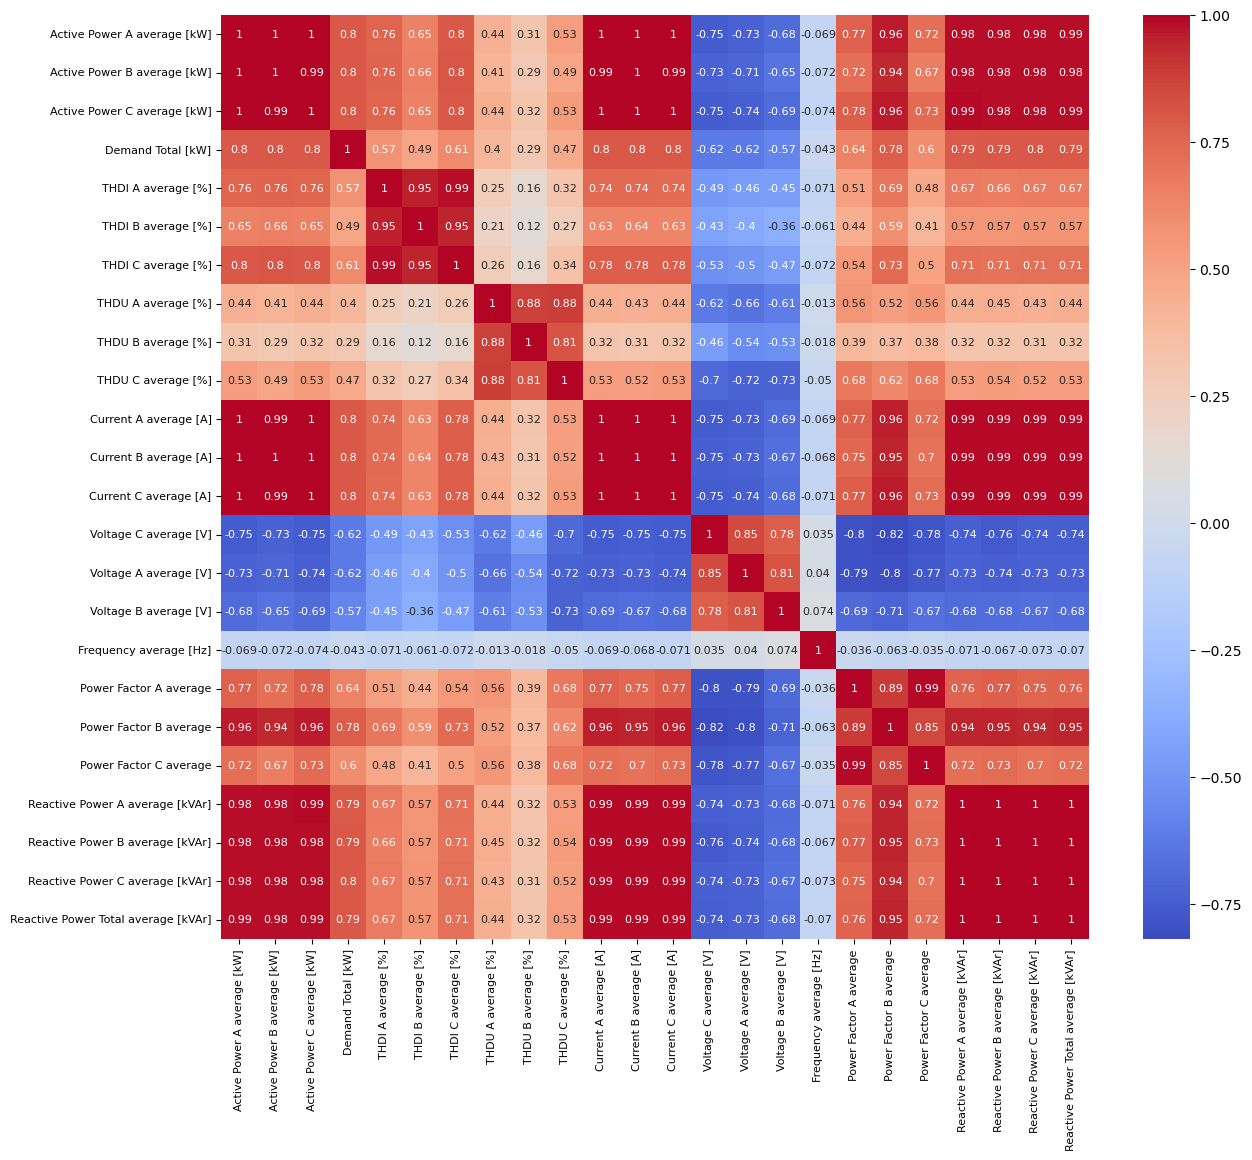

In [60]:
# Create a larger figure
fig, ax = plt.subplots(figsize=(14,12))

# Plot the correlation matrix as a heatmap
sns.heatmap(corr_matrix,
            cmap='coolwarm',
            annot=True,
            ax=ax,
            annot_kws={"fontsize":8},
            xticklabels=corr_matrix.columns,
            yticklabels=corr_matrix.columns)

# Set the font size of the x and y axis tick labels
ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=8)

plt.show()

In [40]:
columns_to_drop = ['Active Power B average [kW]', 'Active Power C average [kW]', 
                   'THDI B average [%]', 'THDI C average [%]',
                   'THDU B average [%]', 'THDU C average [%]',
                   'Current A average [A]','Current B average [A]', 'Current C average [A]',
                   'Power Factor B average', 'Power Factor C average',
                   'Reactive Power A average [kVAr]','Reactive Power B average [kVAr]', 
                   'Reactive Power C average [kVAr]', 'Reactive Power Total average [kVAr]',
                  ]
df_without_high_correlated = df.drop(columns_to_drop, axis = 1)

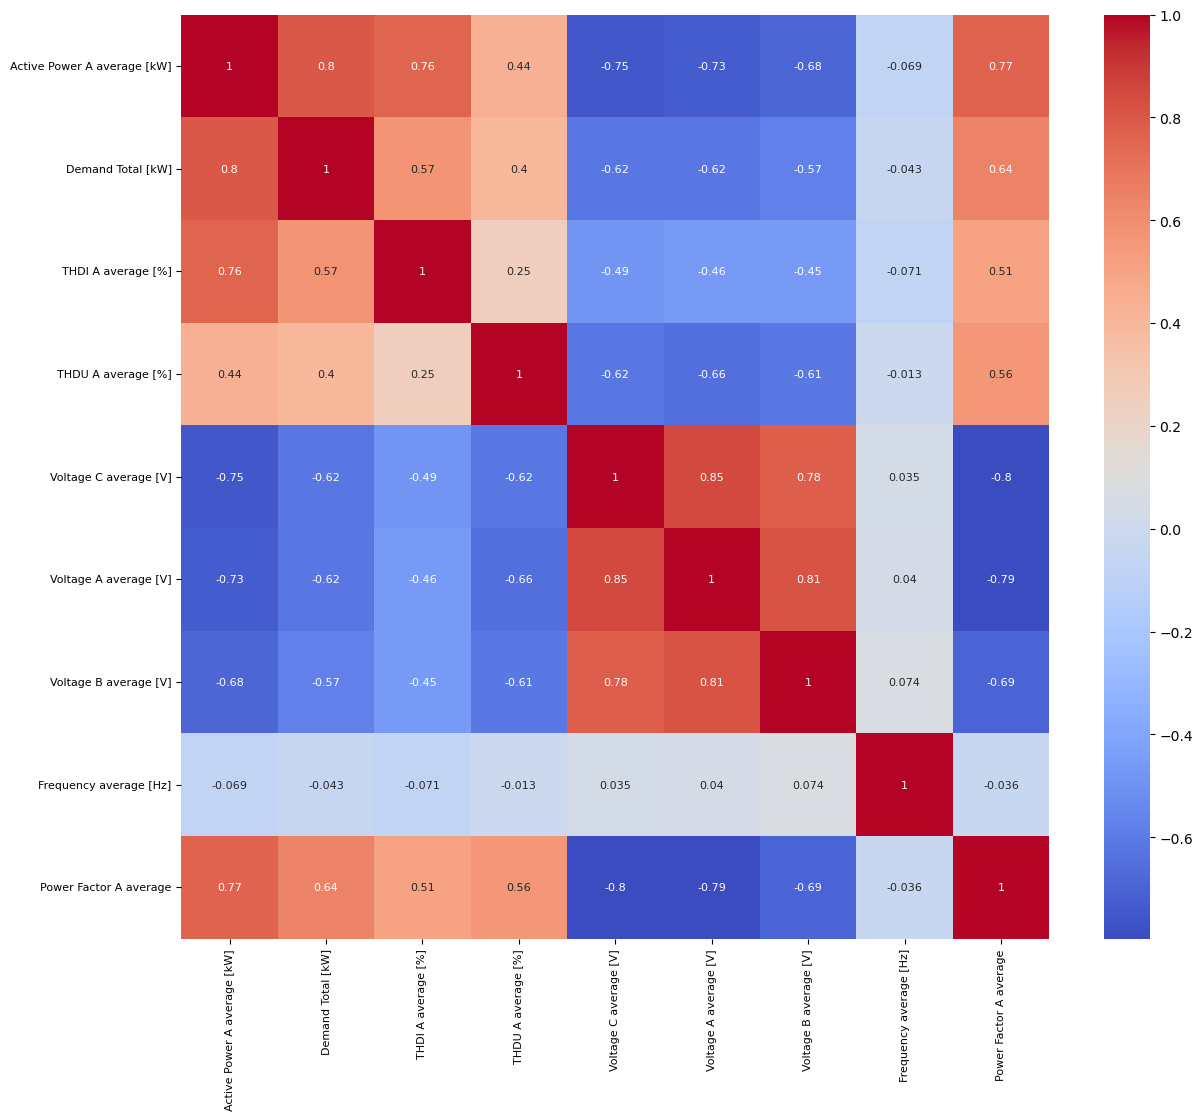

In [62]:
# Calculate the correlation matrix
corr_matrix = df_without_high_correlated.corr()

# Create a larger figure
fig, ax = plt.subplots(figsize=(14,12))

# Plot the correlation matrix as a heatmap
sns.heatmap(corr_matrix,
            cmap='coolwarm',
            annot=True,
            ax=ax,
            annot_kws={"fontsize":8},
            xticklabels=corr_matrix.columns,
            yticklabels=corr_matrix.columns)

# Set the font size of the x and y axis tick labels
ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=8)

plt.show()

<h2>2.2 Q-Q Plot</h2>

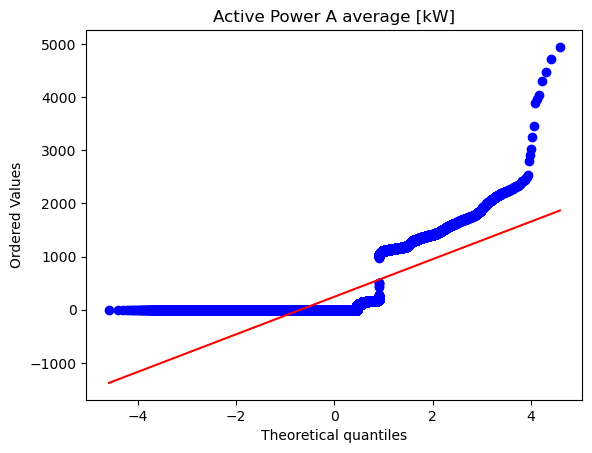

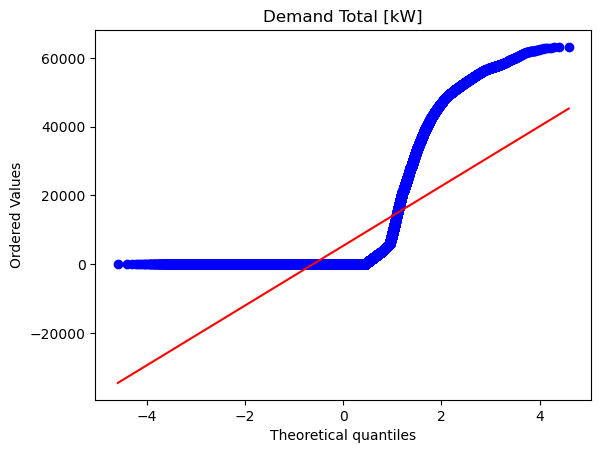

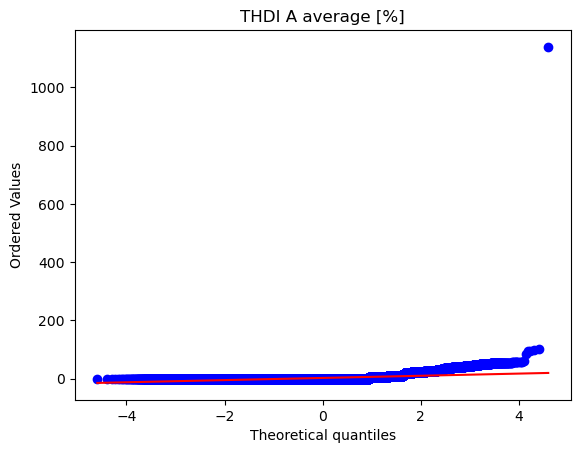

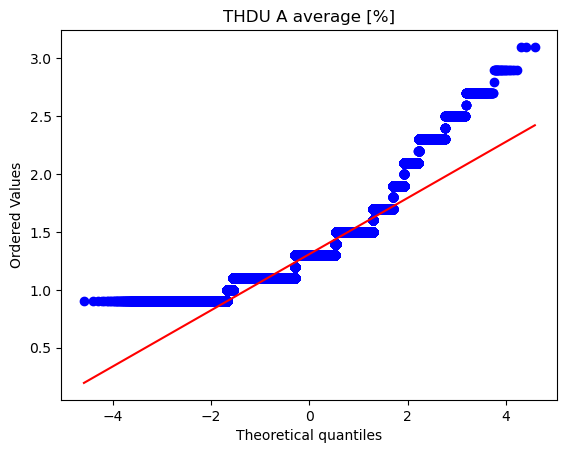

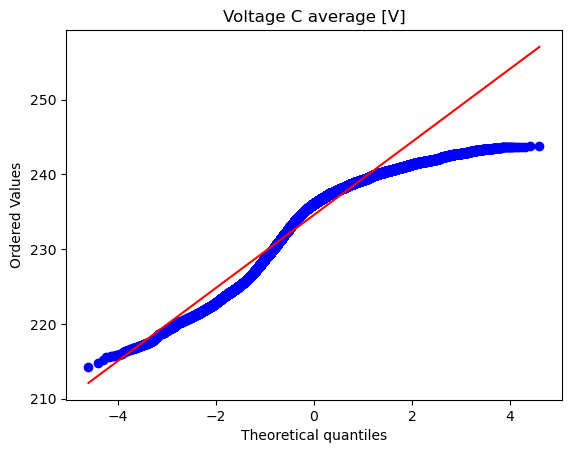

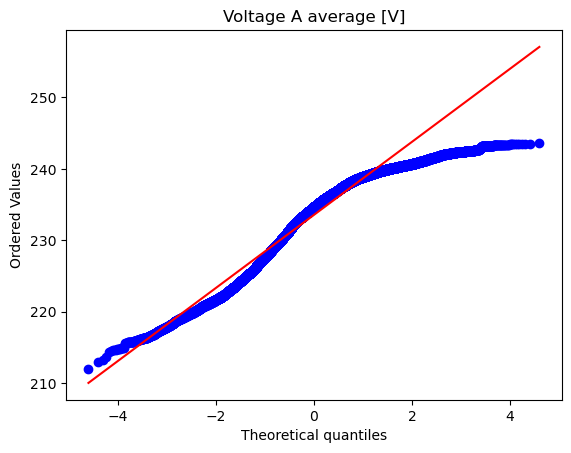

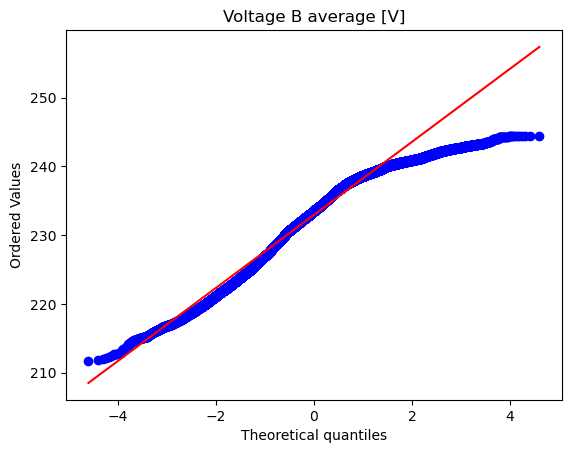

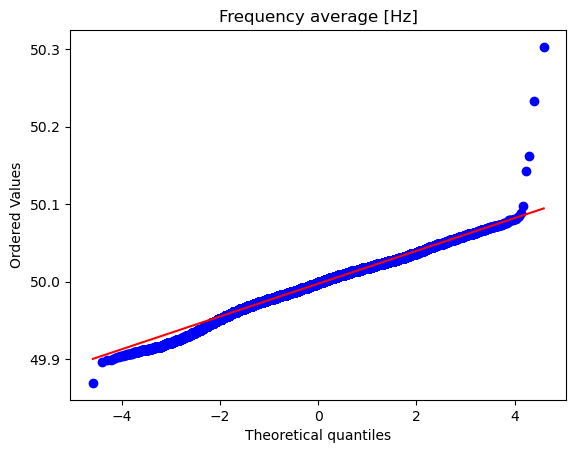

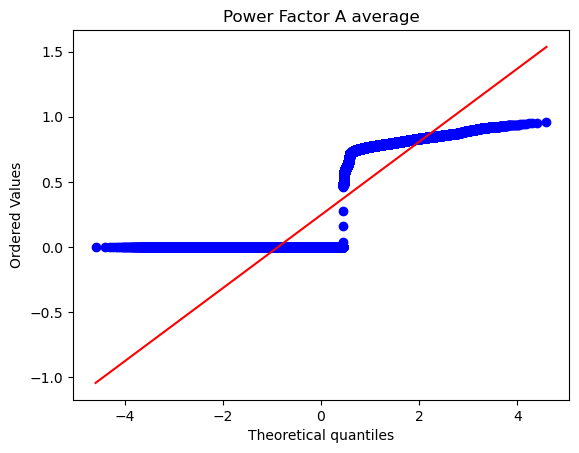

In [112]:
for column in df_without_high_correlated.columns:
    if column != 'timestamp':
        stats.probplot(df_without_high_correlated[column], dist="norm", plot=pylab)
        pylab.title(column)
        pylab.show()

<h2>2.3 Duplicate detection</h2>

In [5]:
# Identify duplicates based on all columns
duplicates = df_without_high_correlated.duplicated()

In [6]:
# Print the duplicate rows
print(df_without_high_correlated[duplicates])

Empty DataFrame
Columns: [timestamp, Active Power A average [kW], Demand Total [kW], THDI A average [%], THDU A average [%], Voltage C average [V], Voltage A average [V], Voltage B average [V], Frequency average [Hz], Power Factor A average]
Index: []


<h2>2.4 Visualization</h2>

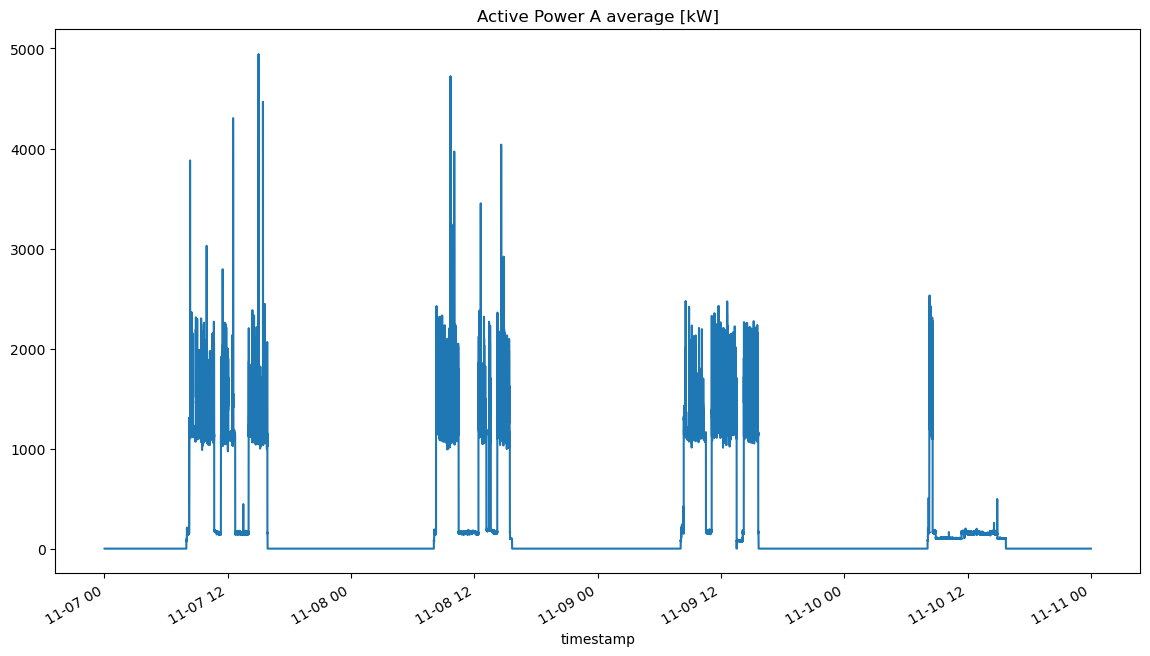

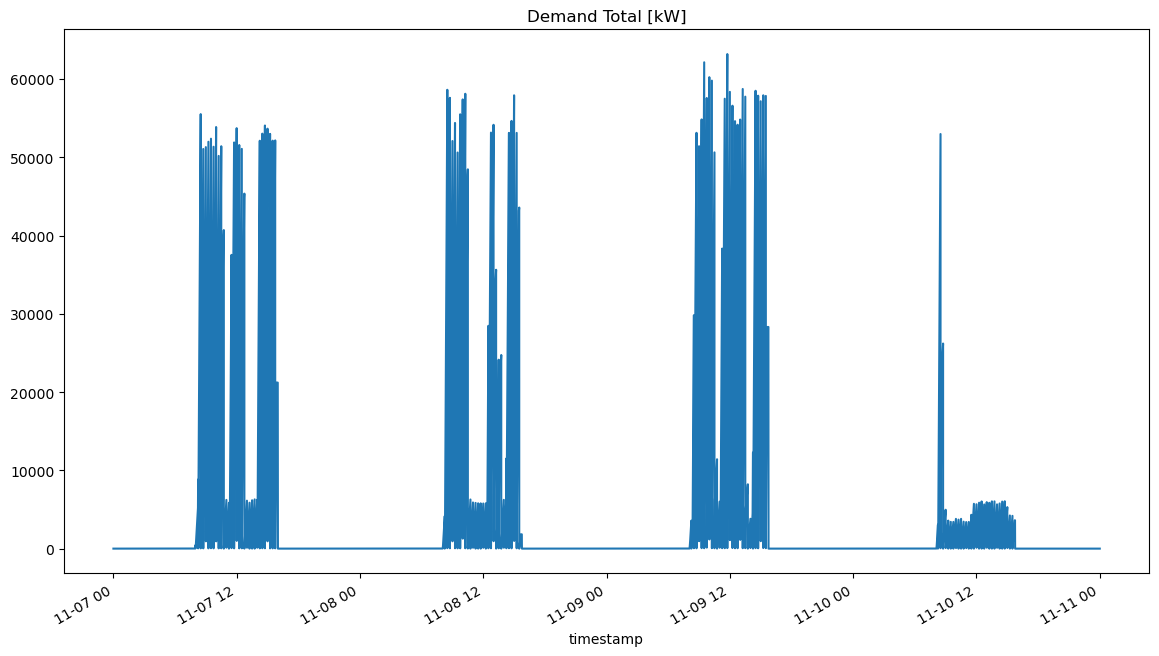

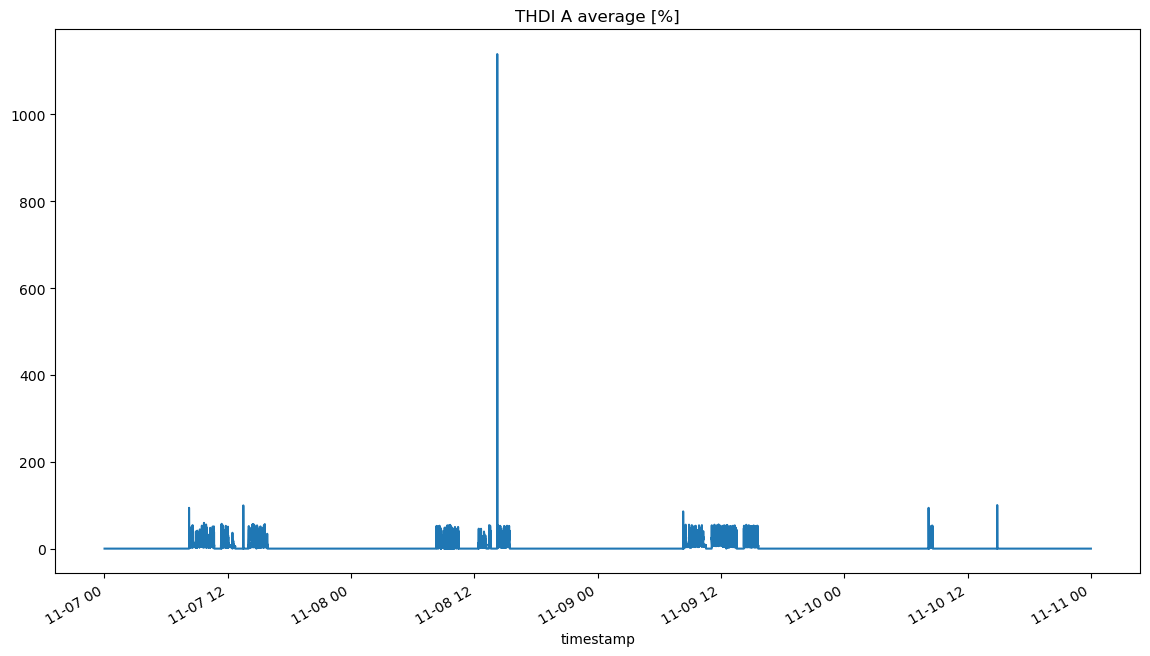

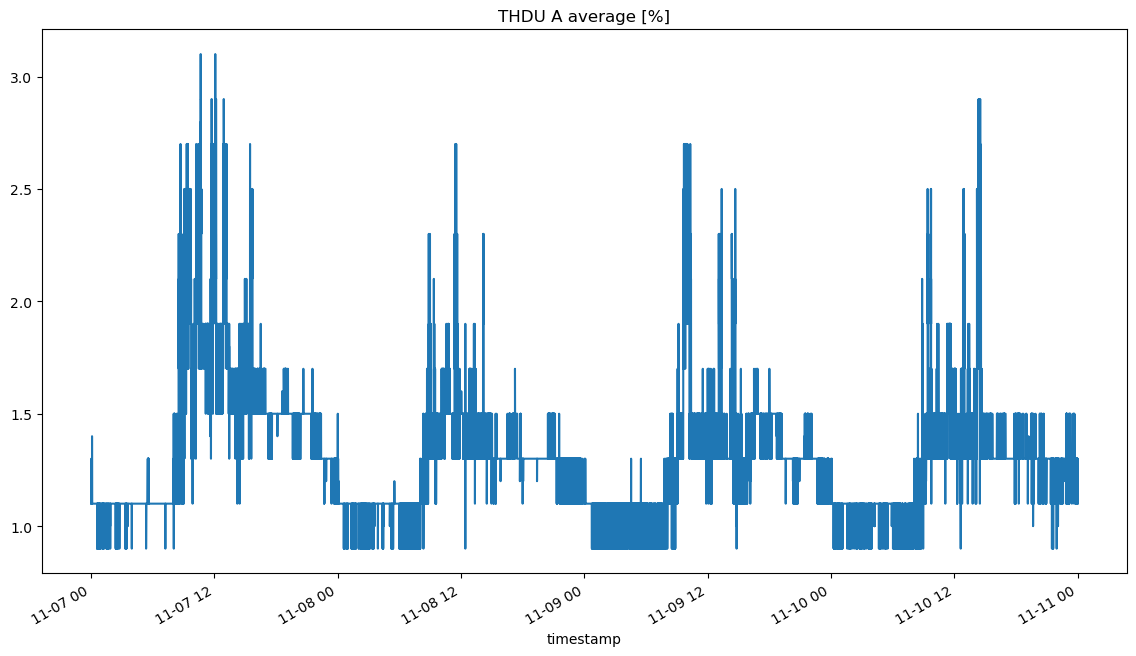

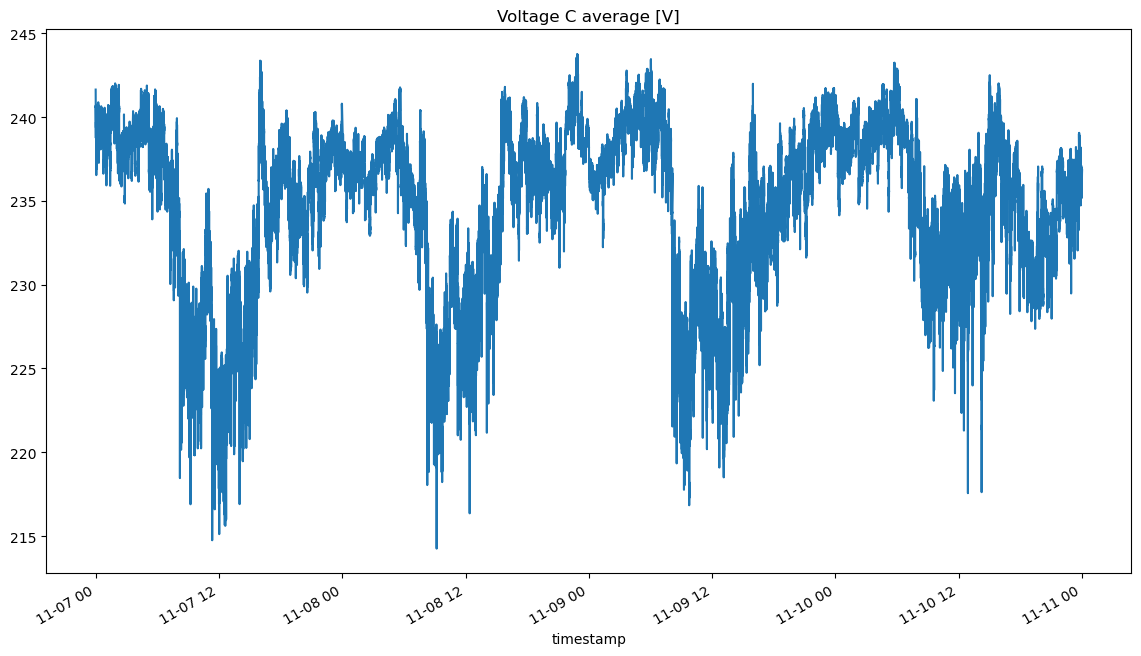

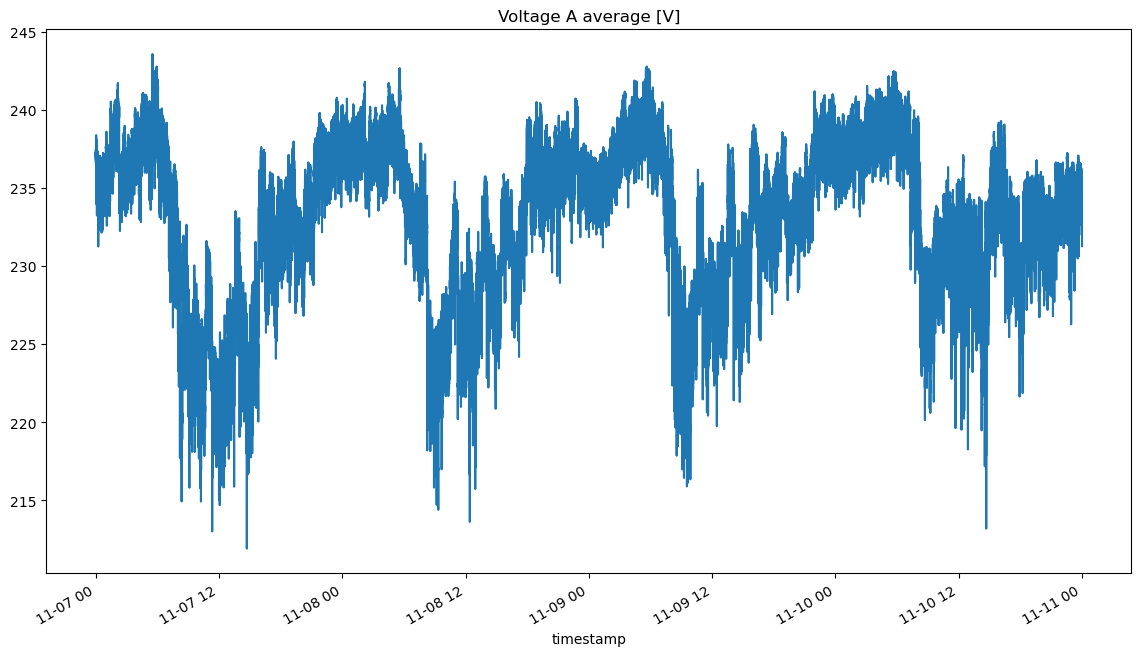

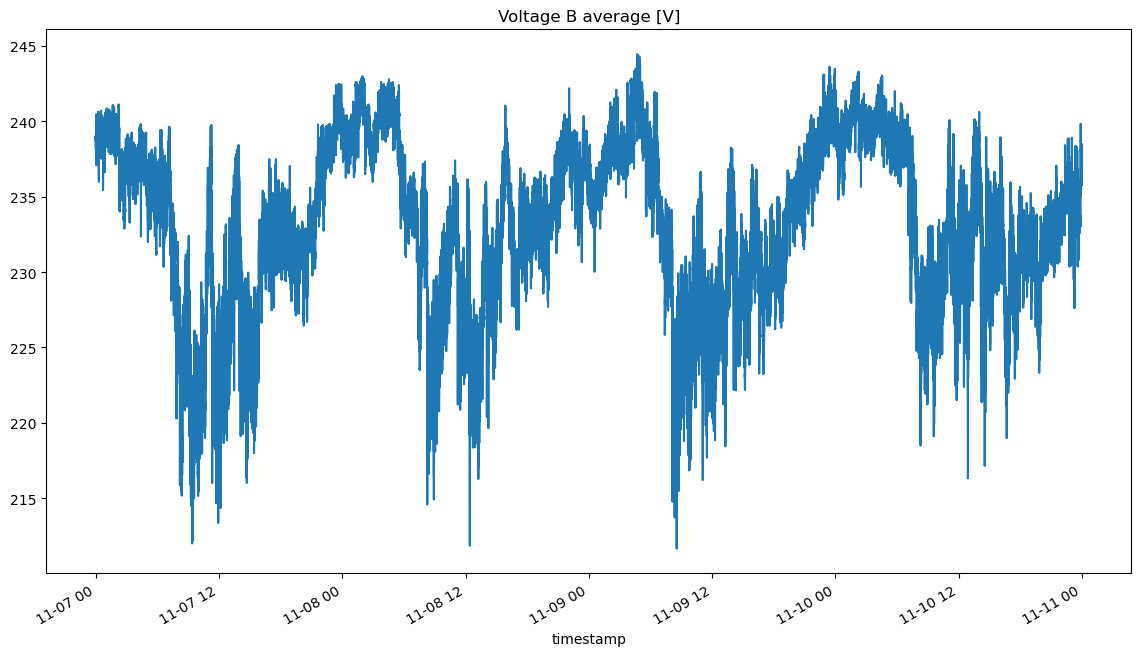

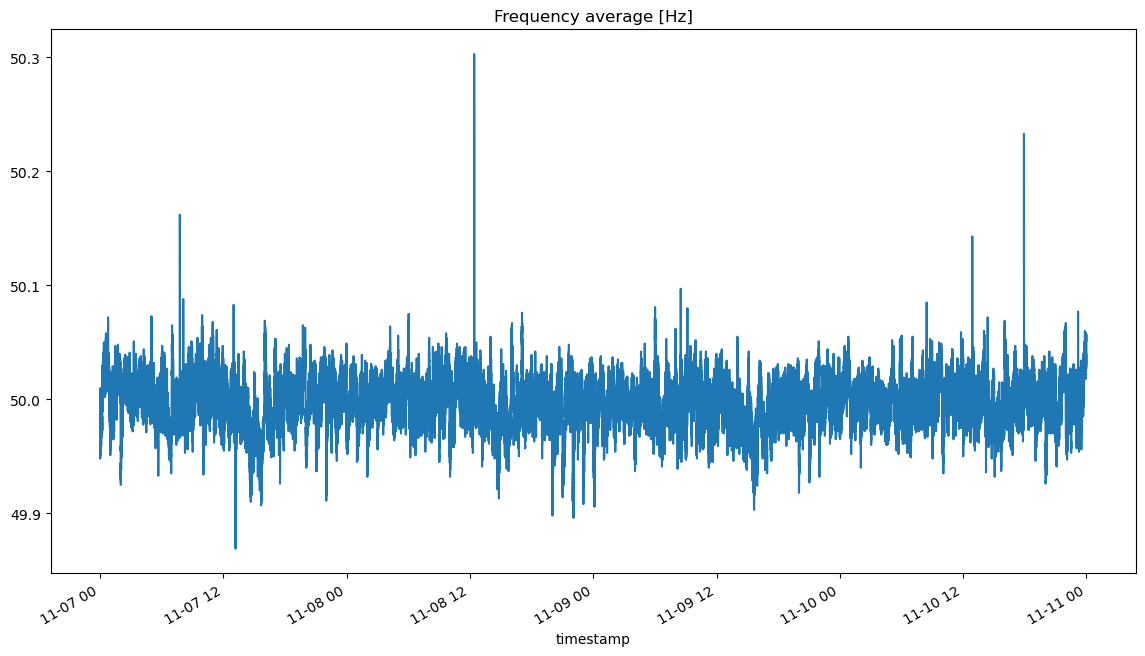

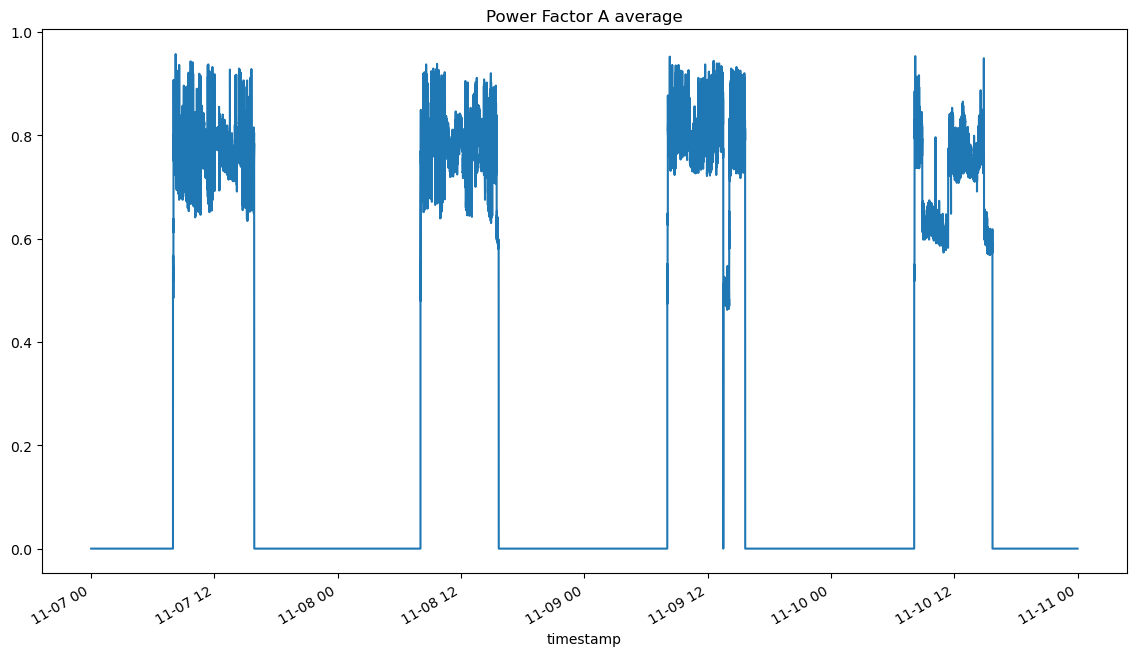

In [42]:
df_indexed = df_without_high_correlated.copy()
df_indexed['timestamp'] = pd.to_datetime(df_indexed['timestamp'])
df_indexed.index = df_indexed['timestamp']
del df_indexed['timestamp']

for column in df_indexed.columns:
    if column != 'timestamp':
        df_indexed[column].plot(figsize = (14, 8), title = column)
        plt.show()

<h2>2.5 Outlier removal</h2>

<h3>2.5.1 Removing outliers from the entire dataset at once</h3>

In [34]:
df_num = df_without_high_correlated.copy()
df_num = df_num.drop('timestamp', axis = 1)

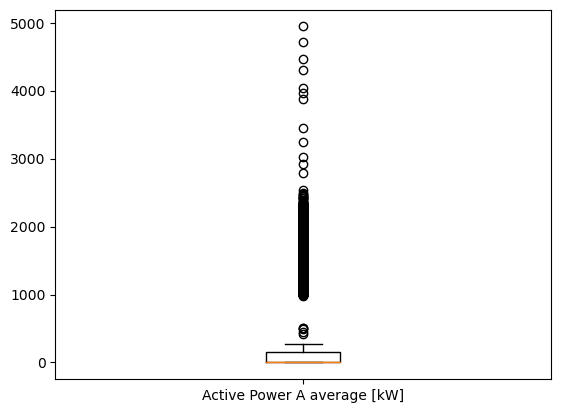

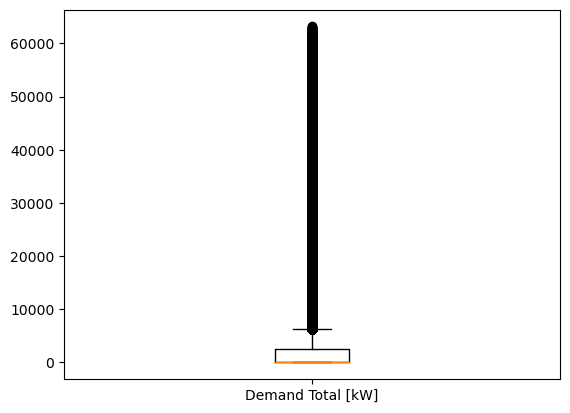

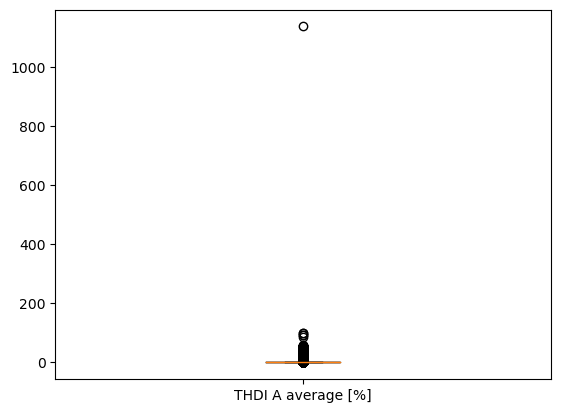

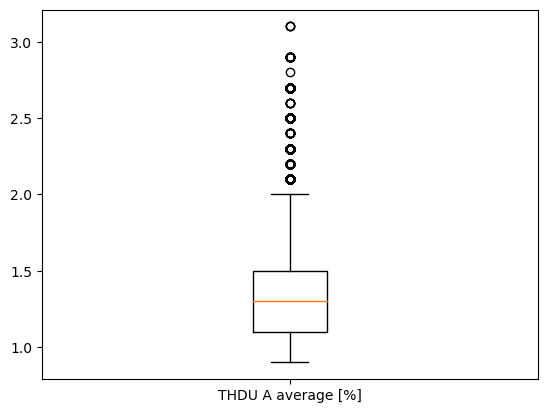

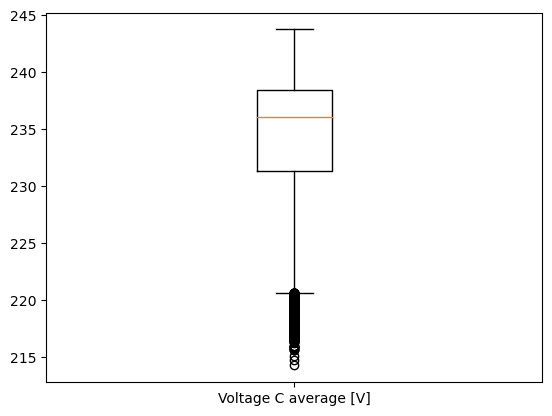

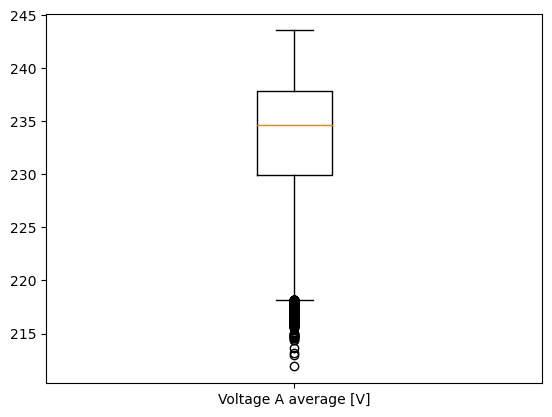

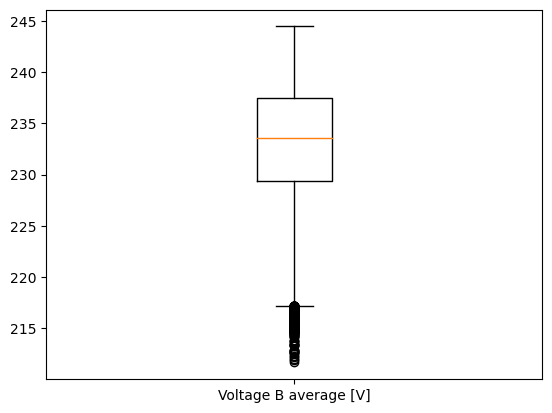

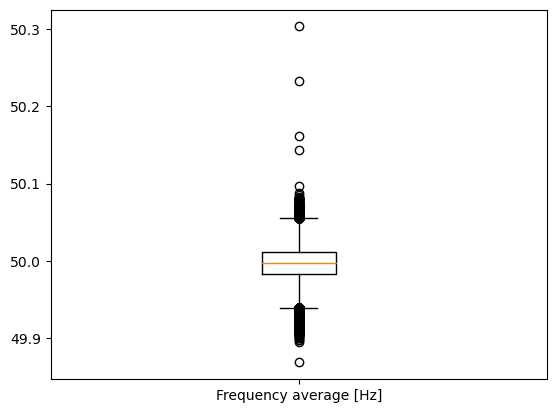

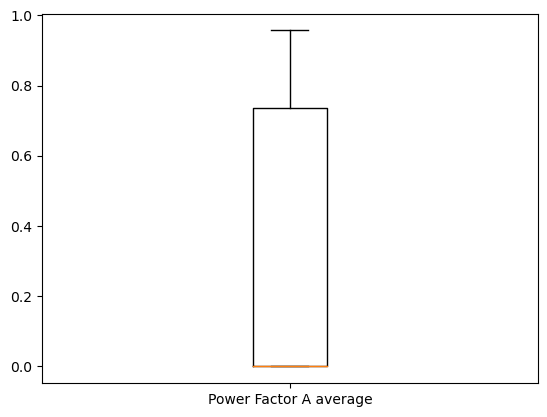

In [35]:
for column in df_num.columns:
    plt.boxplot(df_num[column], labels=[column])
    plt.show()

In [31]:
columns_with_outliers = ['Active Power A average [kW]', 'Demand Total [kW]',
       'THDI A average [%]', 'THDU A average [%]', 'Voltage C average [V]',
       'Voltage A average [V]', 'Voltage B average [V]',
       'Frequency average [Hz]', 'Power Factor A average']

Q1 = df_without_high_correlated[columns_with_outliers].quantile(0.25)
Q3 = df_without_high_correlated[columns_with_outliers].quantile(0.75)
IQR = Q3-Q1

df_without_outliers = df_without_high_correlated.copy()
for i, column in enumerate(columns_with_outliers):
    df_without_outliers = df_without_outliers[(df_without_outliers[column] >= Q1[i] - 1.5 * IQR[i]) & (df_without_outliers[column] <= Q3[i] + 1.5 * IQR[i])]

In [32]:
df_without_outliers.shape

(252679, 10)

In [33]:
initial_samples = df.shape[0]
remaining_samples = df_without_outliers.shape[0]

discarded_samples = initial_samples - remaining_samples
discarded_percentage = (discarded_samples / initial_samples) * 100

print(f'Percentage of discarded data: {discarded_percentage}%')

Percentage of discarded data: 20.67988046057836%


<p>Zaključak: Ovim načinom izbacivanja outlier-a izgubljeno je oko 20% podataka što nije prihvatljivo.</p>

<h3>2.5.2 Outlier removal each day separately</h3>

In [43]:
grouped = df_indexed.groupby(pd.Grouper(freq='D'))

In [44]:
dfs = []
for name, group in grouped:
    dfs.append(group)

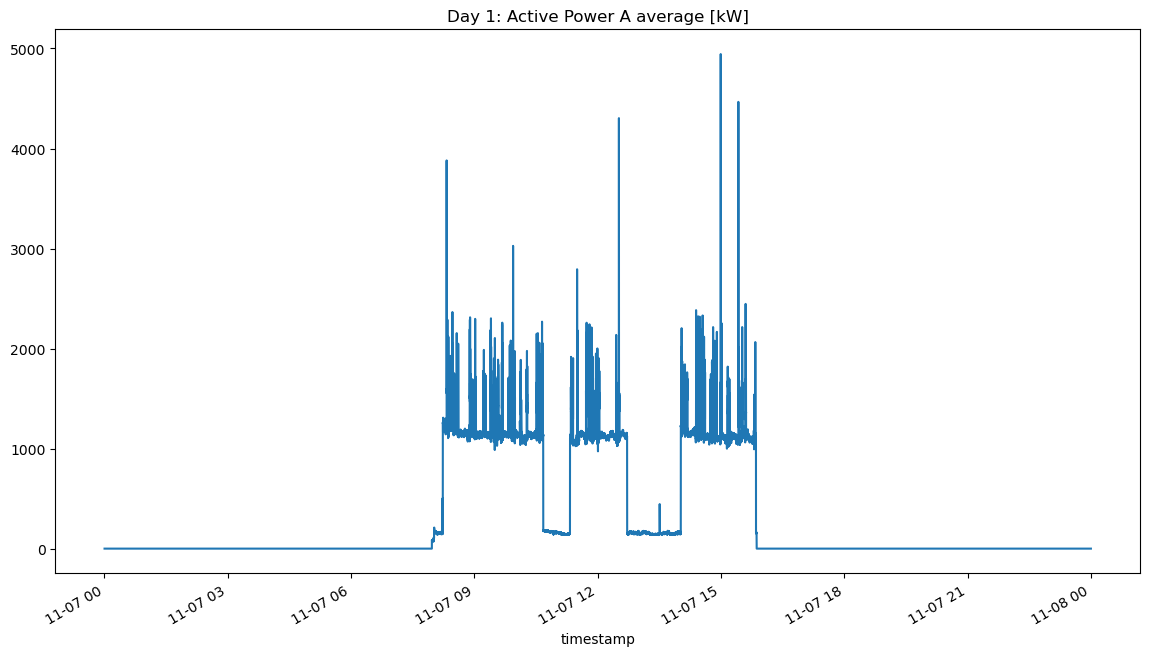

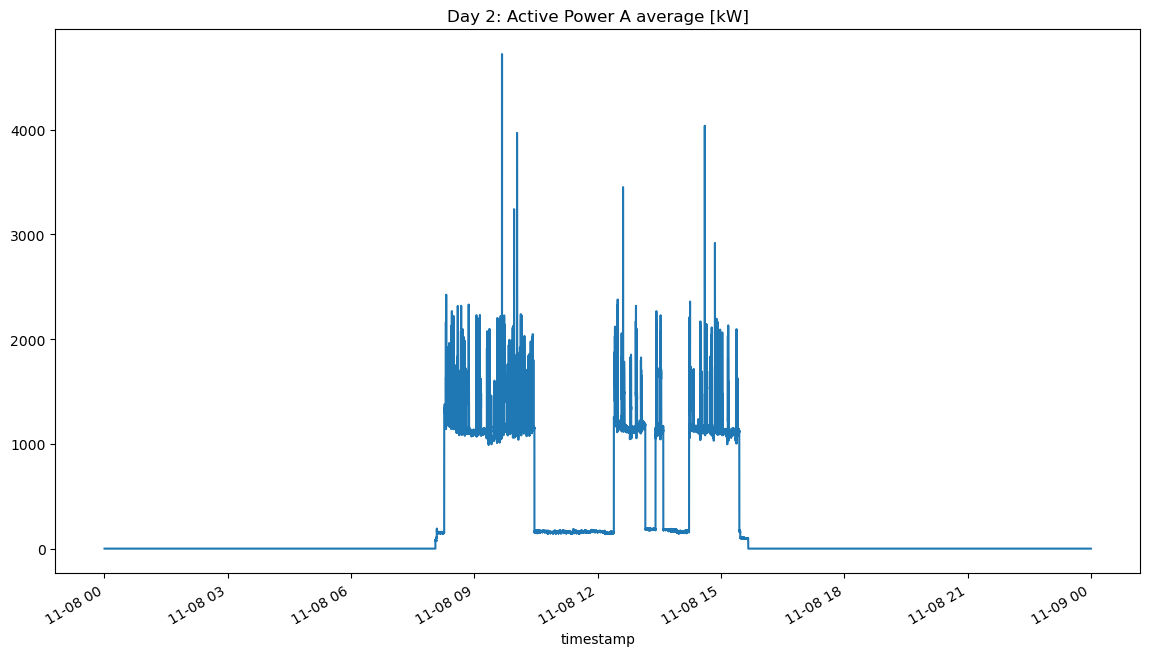

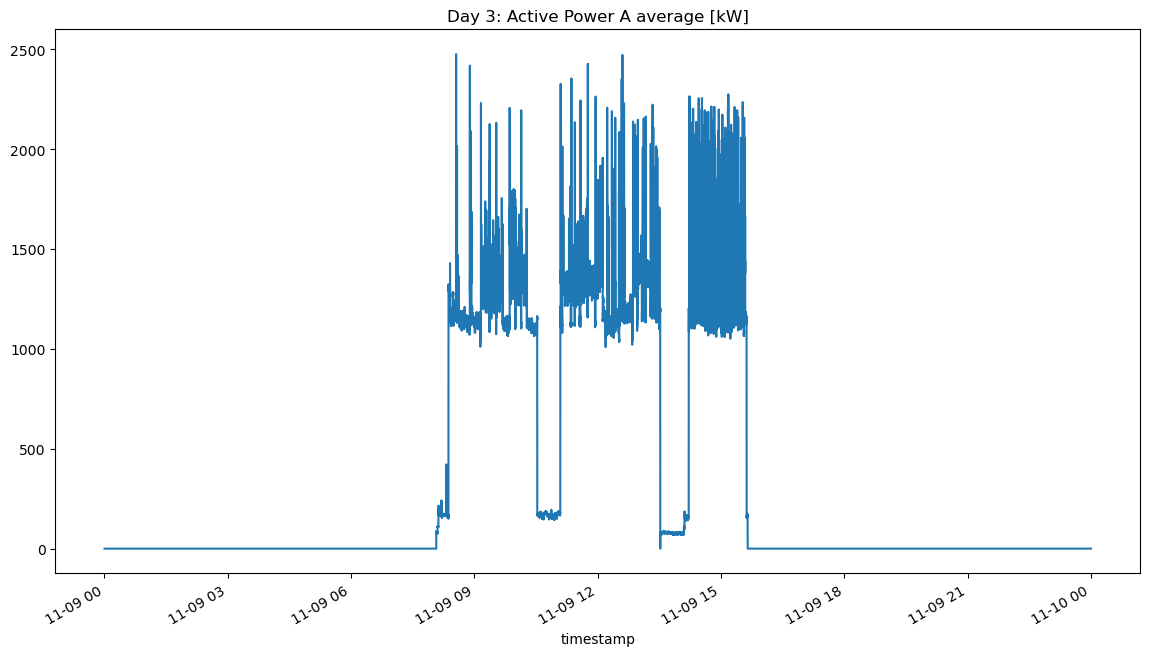

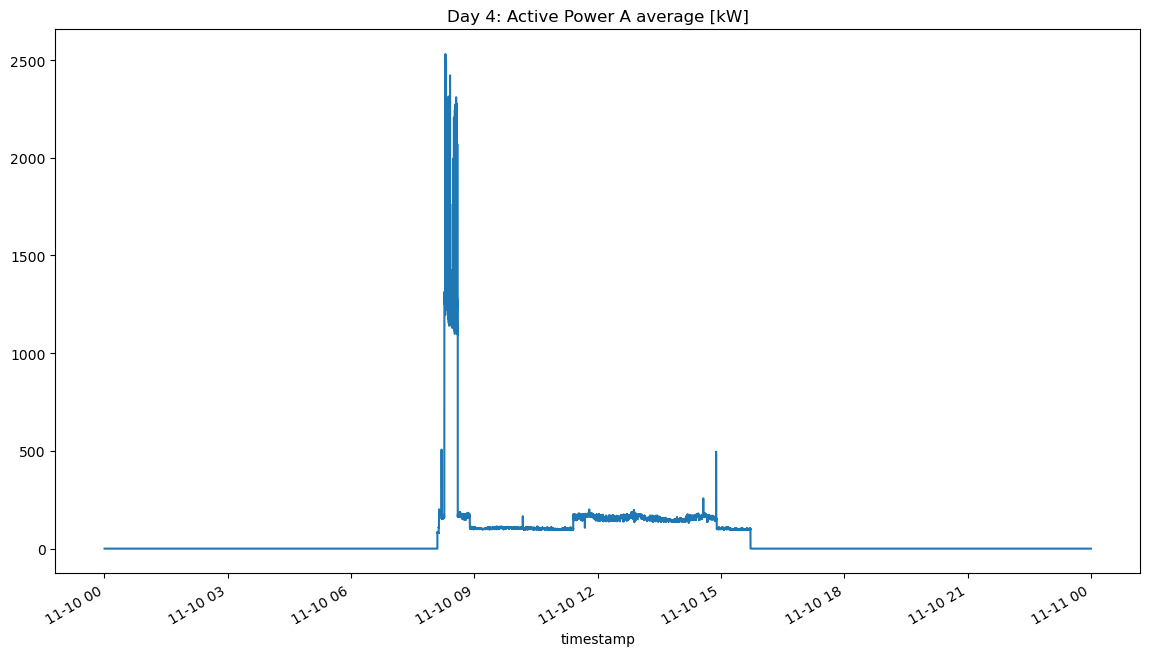

In [45]:
for i, df in enumerate(dfs):
    column = df.columns[0]
    df[column].plot(figsize=(14, 8), title=f"Day {i+1}: {column}")
    plt.show()

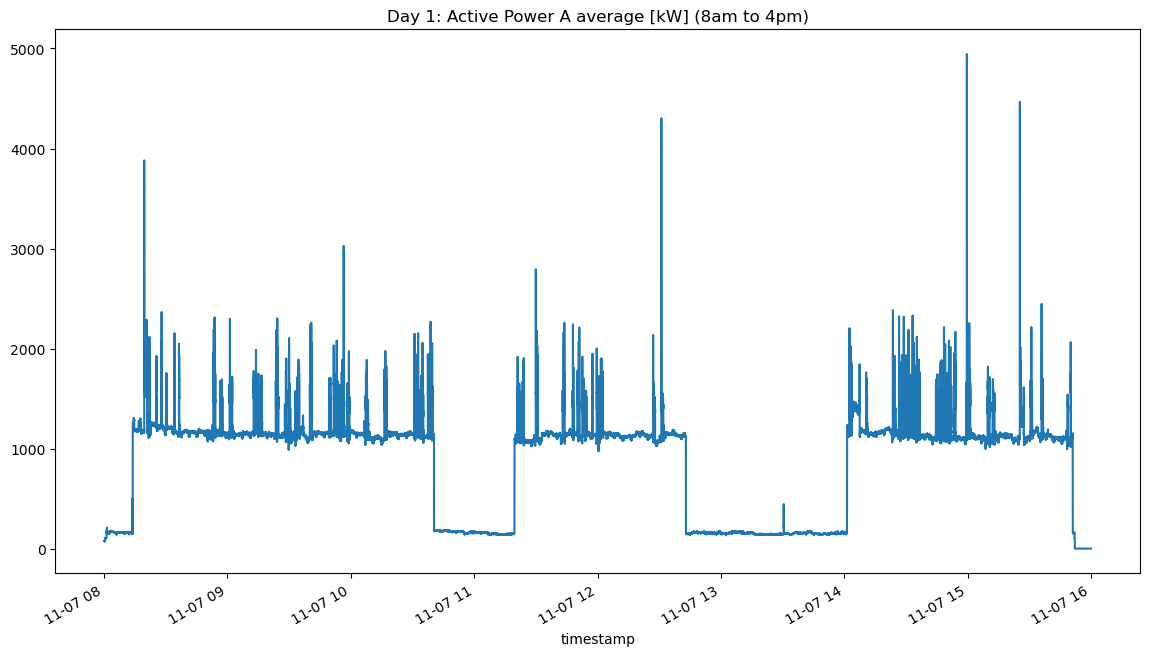

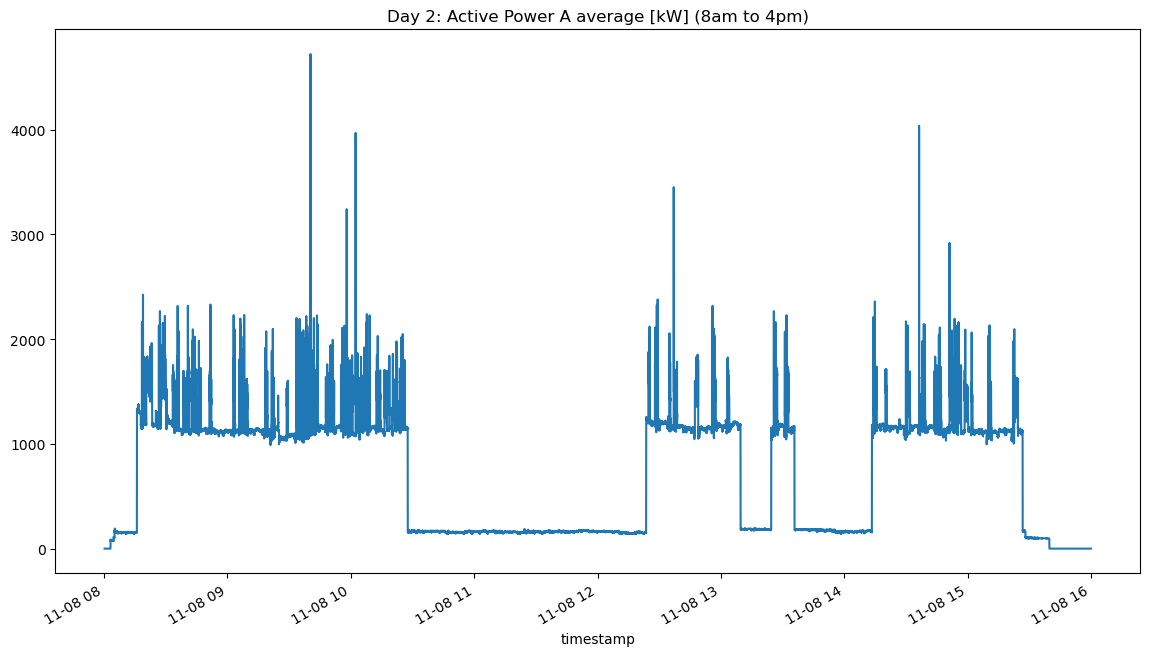

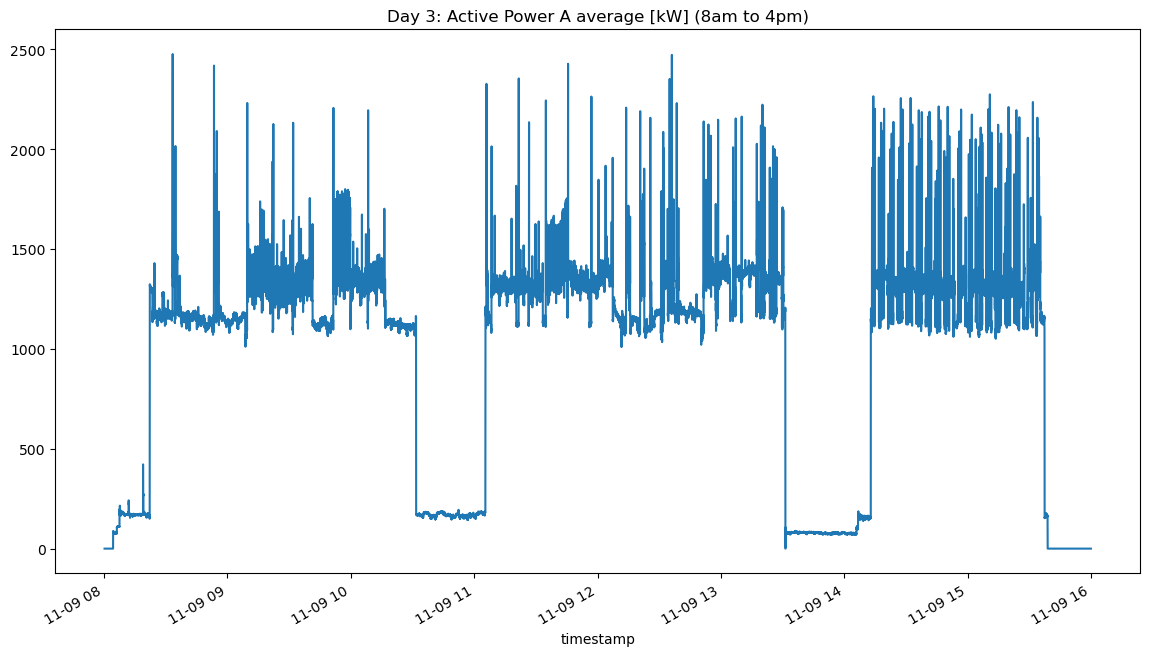

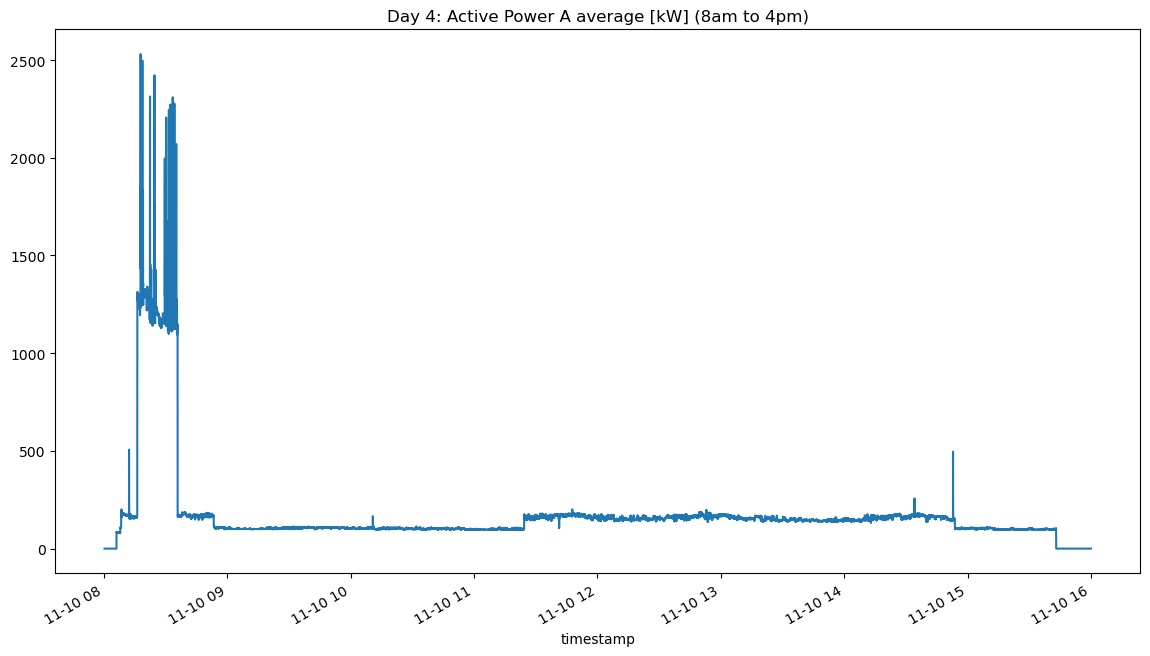

In [46]:
for i, df in enumerate(dfs):
    column = df.columns[0]  # get the first column name
    df_daytime = df.between_time('08:00', '16:00')  # select only the data between 8am and 4pm
    df_daytime[column].plot(figsize=(14, 8), title=f"Day {i+1}: {column} (8am to 4pm)")
    plt.show()

In [47]:
daytime_dfs = []

for df in dfs:
    df_daytime = df.between_time('08:00', '16:00')
    daytime_dfs.append(df_daytime)

In [48]:
total_samples = sum(len(df) for df in daytime_dfs)
print(f'Total number of samples across all datasets: {total_samples}')

Total number of samples across all datasets: 107799


In [49]:
def remove_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df_out = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df_out

In [50]:
cleaned_daytime_dfs = []

for df in daytime_dfs:
    df_cleaned = remove_outliers(df)
    cleaned_daytime_dfs.append(df_cleaned)

In [51]:
total_samples = sum(len(df) for df in cleaned_daytime_dfs)
print(f'Total number of samples across all datasets: {total_samples}')

Total number of samples across all datasets: 86783


In [52]:
initial_samples = 107799
remaining_samples = 86783

discarded_samples = initial_samples - remaining_samples
discarded_percentage = (discarded_samples / initial_samples) * 100

print(f'Percentage of discarded data: {discarded_percentage}%')

Percentage of discarded data: 19.495542630265586%


<p>Zaključak: Ovim načinom izbacivanja outlier-a izgubljeno je oko 20% podataka što nije prihvatljivo.</p>

<p>Zaključak je da će se dalja analiza vršiti nad dataset-om bez uklanjanja outlier-a</p>

<h2>2.6 Resampling (at a frequency of 1Hz)</h2>

In [62]:
resampled_dfs = []

for df in daytime_dfs:
    df_resampled = df.resample('1S').mean()
    df_interpolated = df_resampled.interpolate()
    resampled_dfs.append(df_interpolated)

combined_dataset = pd.concat(resampled_dfs)

In [63]:
combined_dataset.shape

(115120, 9)

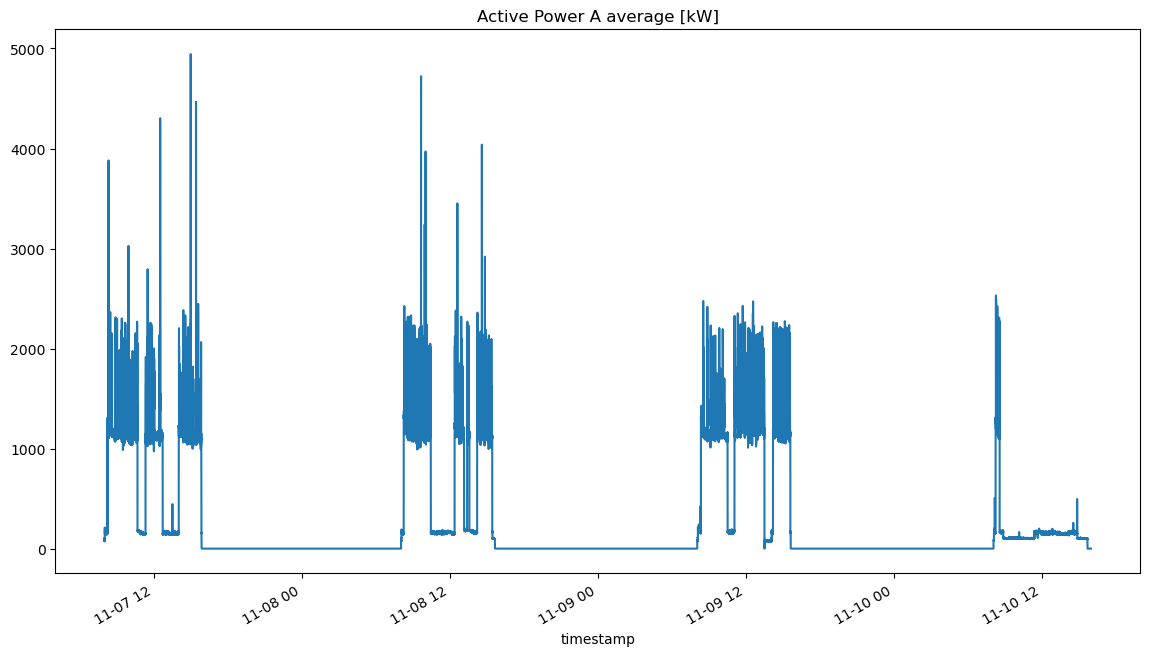

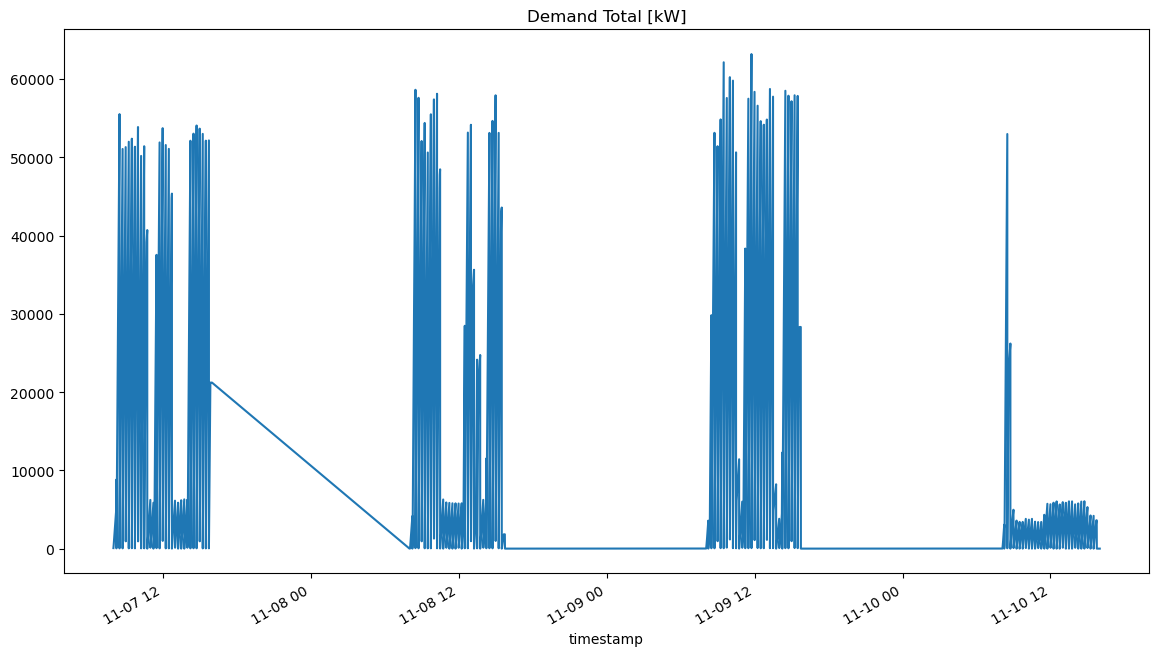

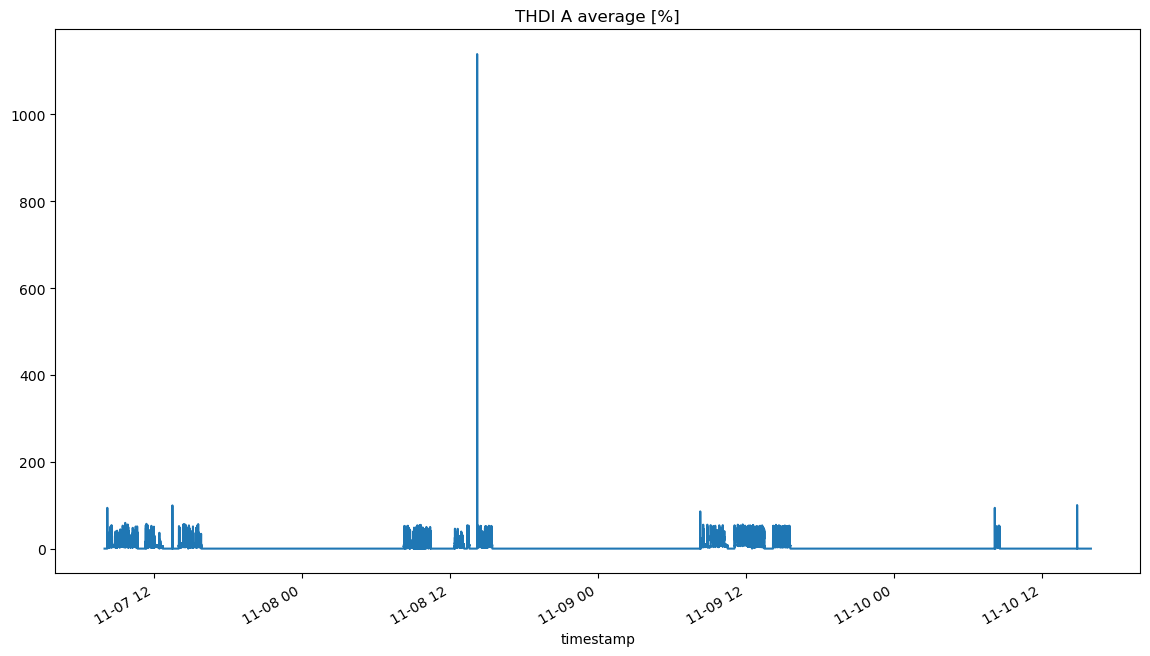

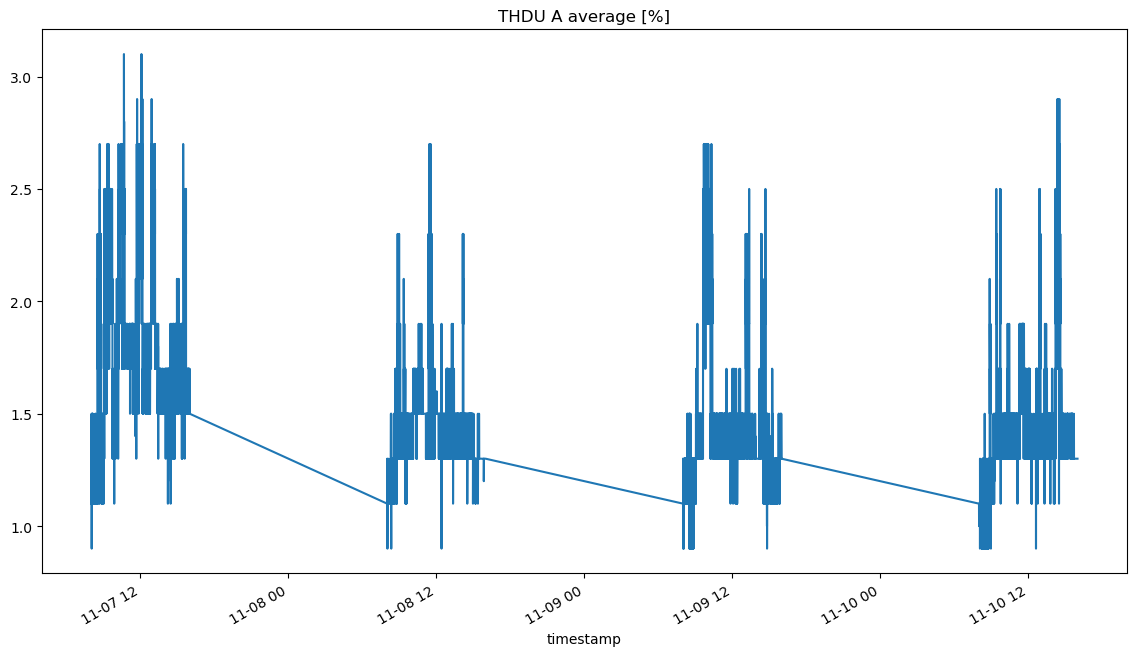

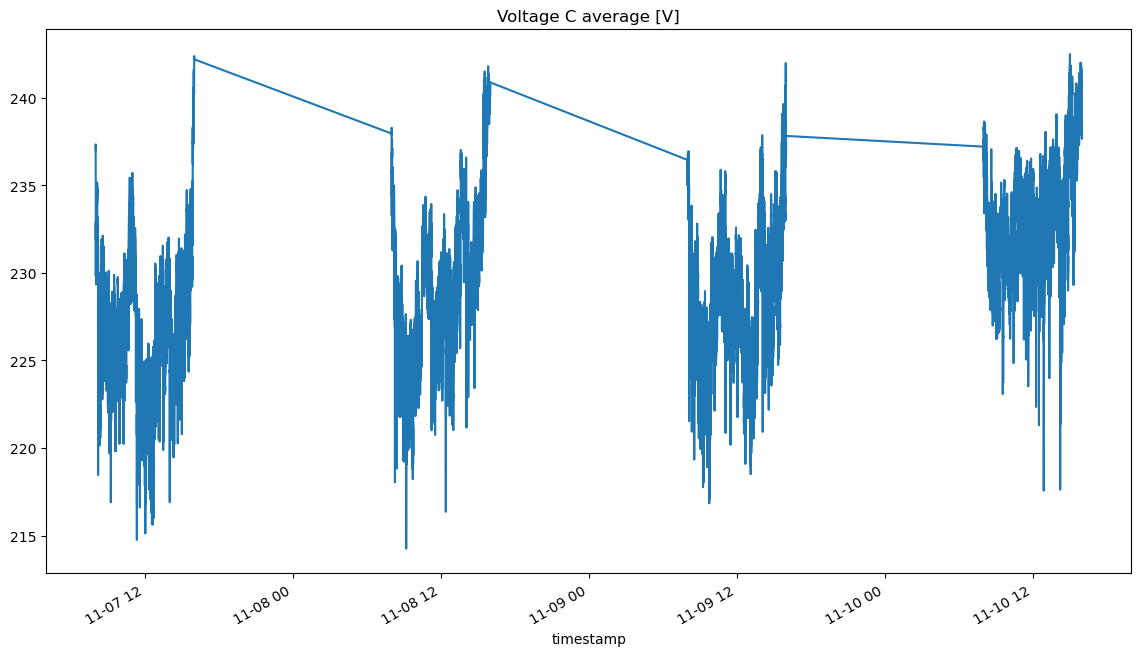

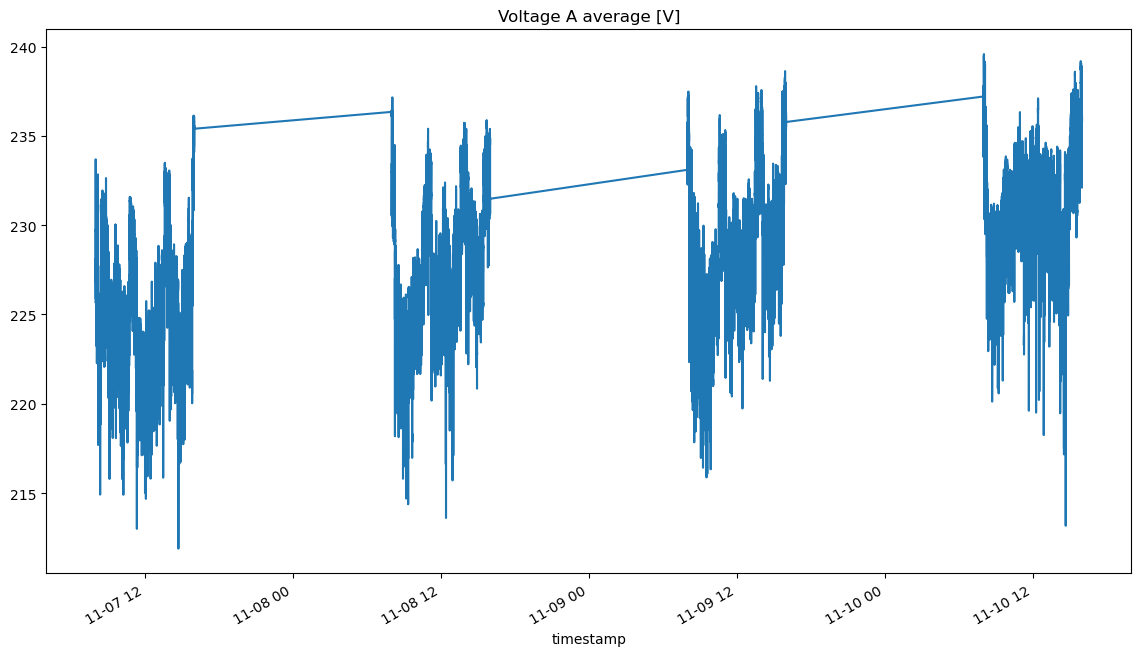

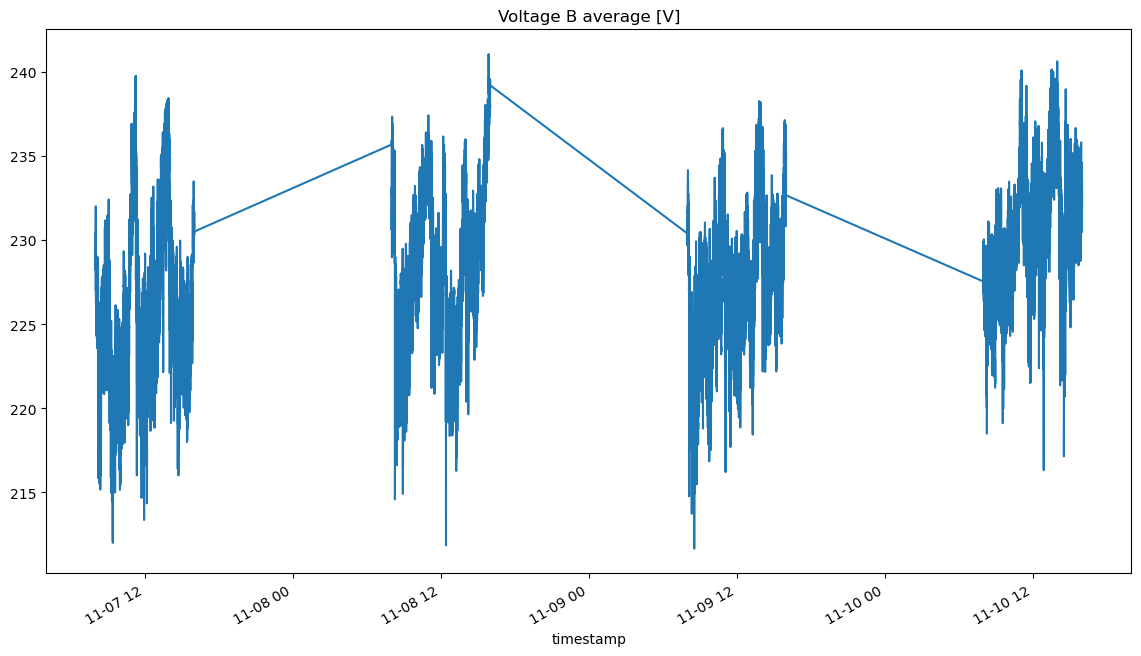

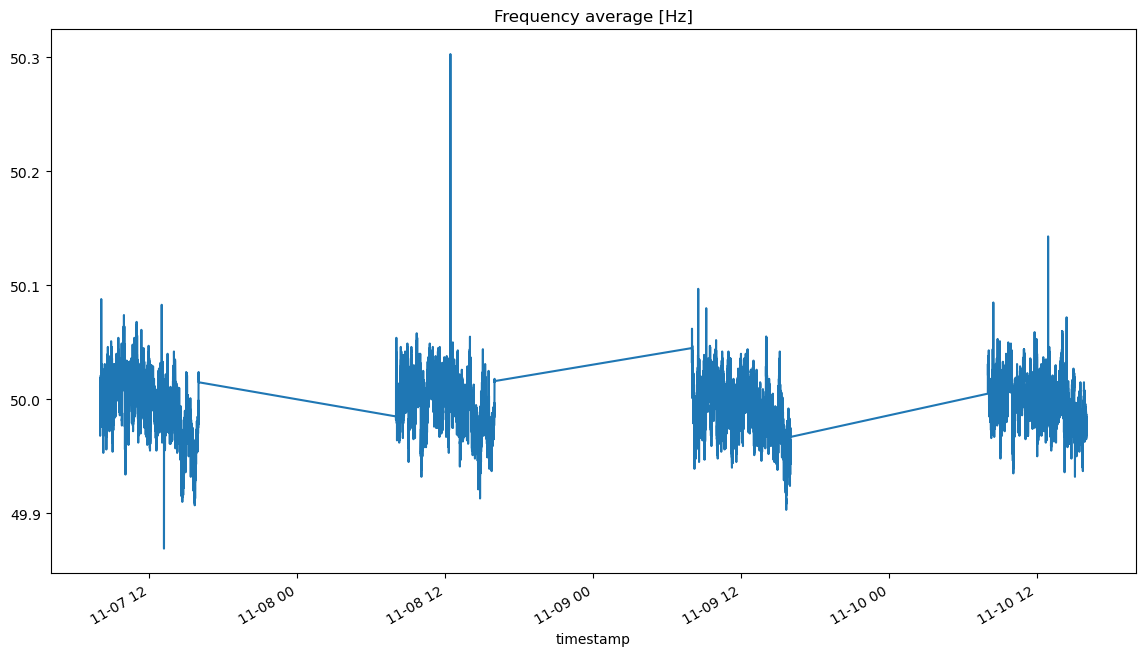

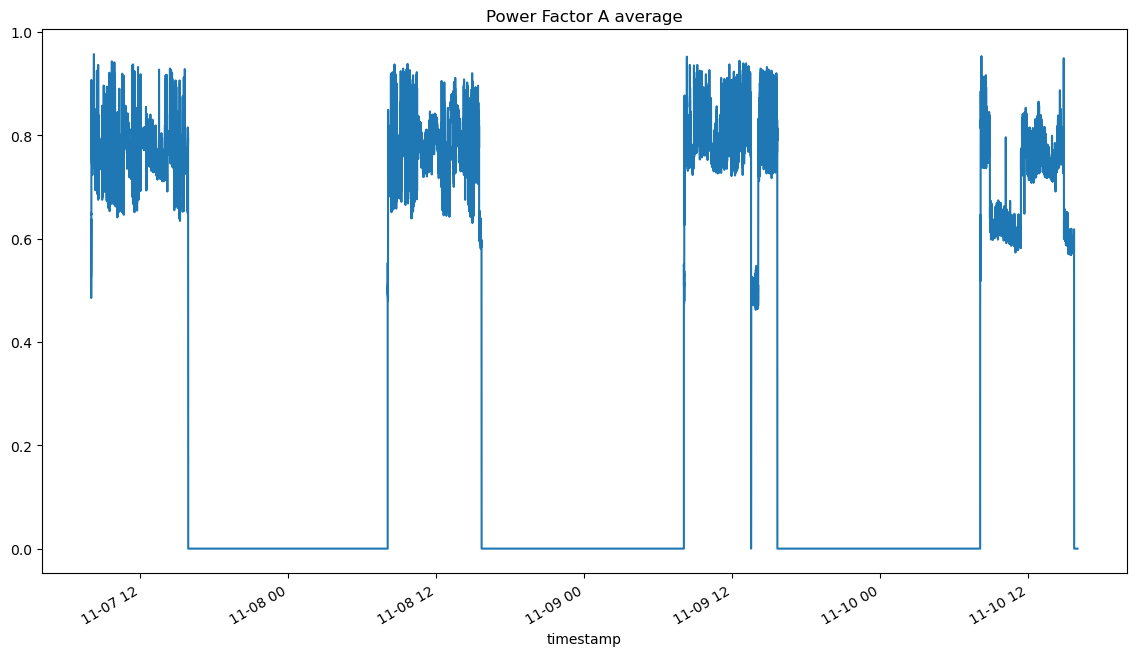

In [64]:
for column in combined_dataset.columns:
        combined_dataset[column].plot(figsize = (14, 8), title = column)
        plt.show()

<h1>3 Advanced time series analysis </h1>

<h2>3.1 Tests for stationarity</h2>

<h3>3.1.1 ADF test</h3>

In [65]:
for column in combined_dataset.columns:
    series = combined_dataset[column].values
    adf = ADF(series)
    print("\033[31;1m" + column + "\033[0m")
    print(adf.summary().as_text())

Active Power A average [kW]
   Augmented Dickey-Fuller Results   
Test Statistic                 -5.171
P-value                         0.000
Lags                               70
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
Demand Total [kW]
   Augmented Dickey-Fuller Results   
Test Statistic                -13.056
P-value                         0.000
Lags                               13
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
THDI A average [%]
   Augmented Dickey-Fuller Results   
Test Statistic                -11.554
P-value                         0.000
Lags                               67
-------------------------------------

Trend:

<h3>3.1.2 Dickey-Fuller GLS Testing</h3>

In [66]:
for column in combined_dataset.columns:
    series = combined_dataset[column].values
    dfgls = DFGLS(series)
    print("\033[31;1m" + column + "\033[0m")
    print(dfgls.summary().as_text())

Active Power A average [kW]
      Dickey-Fuller GLS Results      
Test Statistic                 -3.479
P-value                         0.001
Lags                               70
-------------------------------------

Trend: Constant
Critical Values: -2.57 (1%), -1.94 (5%), -1.62 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
Demand Total [kW]
      Dickey-Fuller GLS Results      
Test Statistic                 -9.534
P-value                         0.000
Lags                               13
-------------------------------------

Trend: Constant
Critical Values: -2.57 (1%), -1.94 (5%), -1.62 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
THDI A average [%]
      Dickey-Fuller GLS Results      
Test Statistic                 -9.220
P-value                         0.000
Lags                               67
-------------------------------------

Trend:

<h3>3.1.3 Phillips-Perron Test</h3>

In [68]:
for column in combined_dataset.columns:
    series = combined_dataset[column].values
    pp = PhillipsPerron(series)
    print("\033[31;1m" + column + "\033[0m")
    print(pp.summary().as_text())

Active Power A average [kW]
     Phillips-Perron Test (Z-tau)    
Test Statistic                -15.241
P-value                         0.000
Lags                               70
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
Demand Total [kW]
     Phillips-Perron Test (Z-tau)    
Test Statistic                -13.039
P-value                         0.000
Lags                               70
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
THDI A average [%]
     Phillips-Perron Test (Z-tau)    
Test Statistic               -229.989
P-value                         0.000
Lags                               70
-------------------------------------

Trend:

<h3>3.1.4 KPSS test</h3>

In [69]:
for column in combined_dataset.columns:
    series = combined_dataset[column].values
    kpss = KPSS(series)
    print("\033[31;1m" + column + "\033[0m")
    print(kpss.summary().as_text())

Active Power A average [kW]
    KPSS Stationarity Test Results   
Test Statistic                 10.009
P-value                         0.000
Lags                              198
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.
Demand Total [kW]
    KPSS Stationarity Test Results   
Test Statistic                  6.841
P-value                         0.000
Lags                              197
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.
THDI A average [%]
    KPSS Stationarity Test Results   
Test Statistic                  3.660
P-value                         0.000
Lags                              193
-------------------------------------

Trend: Const

<h2>3.2 Calculation of autocorrelation and partial autocorrelation</h2>

In [110]:
combined_dataset.columns

Index(['Active Power A average [kW]', 'Demand Total [kW]',
       'THDI A average [%]', 'THDU A average [%]', 'Voltage C average [V]',
       'Voltage A average [V]', 'Voltage B average [V]',
       'Frequency average [Hz]', 'Power Factor A average'],
      dtype='object')

In [171]:
def calculate_autocorrelation(column, name, number_of_lags):
    autocorr = column.autocorr()
    
    fig = tsaplots.plot_acf(column, lags=number_of_lags)
#     plt.ylim(-0.1, 0.1)
    plt.title(f"Autocorrelation of {name}")
    plt.show()

In [172]:
def calculate_partial_autocorrelation(column, name, number_of_lags):
    plot_pacf(column.dropna(), lags=number_of_lags, method='ywm')
#     plt.ylim(-0.1, 0.1)
    plt.title(f'Partial Autocorrelation for {name}')
    plt.show()

<h3>3.2.1 Calculation of autocorrelation</h3>

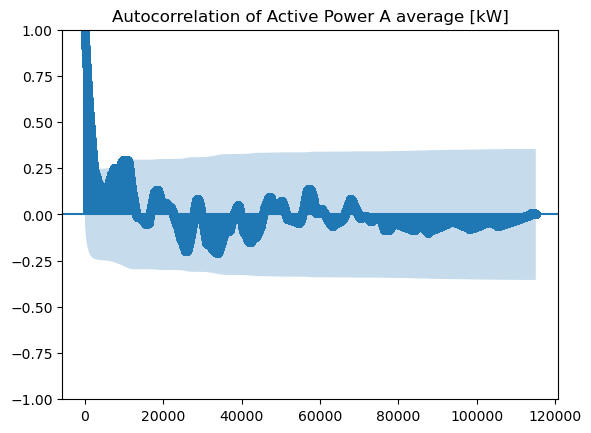

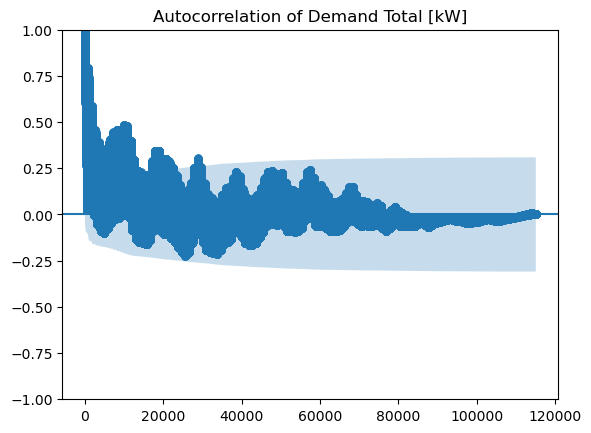

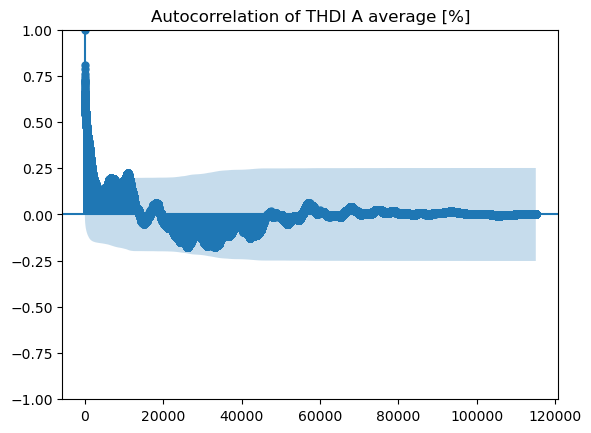

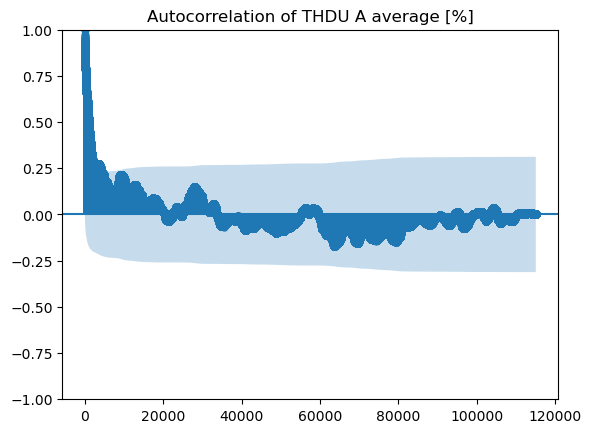

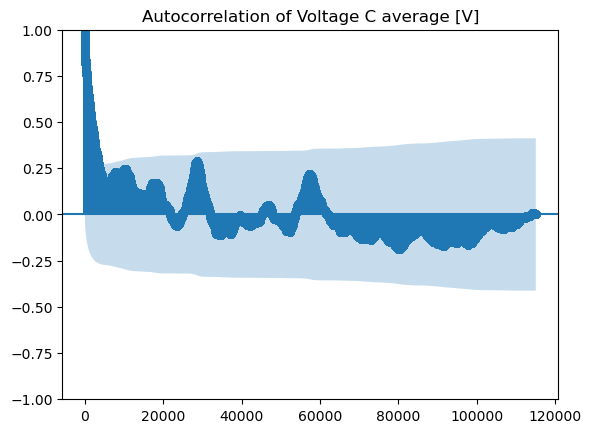

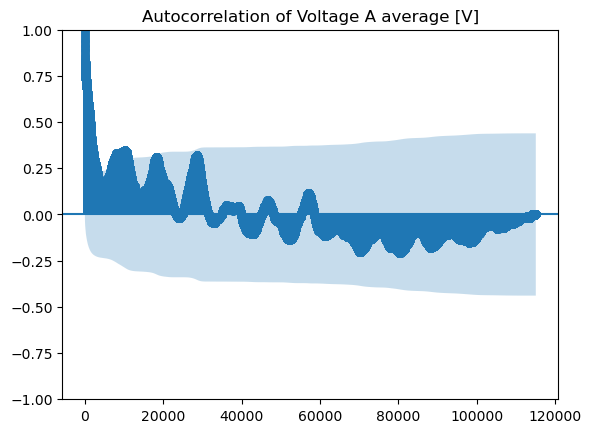

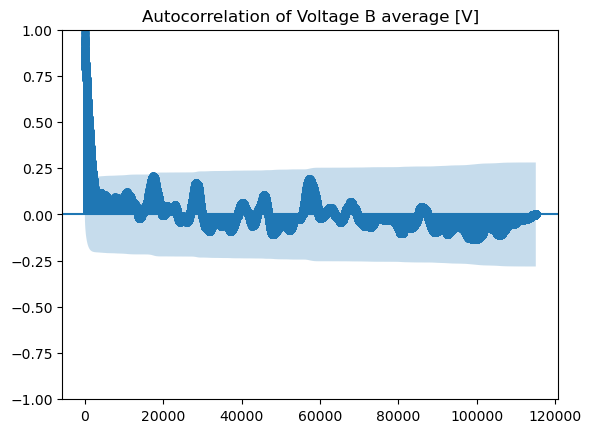

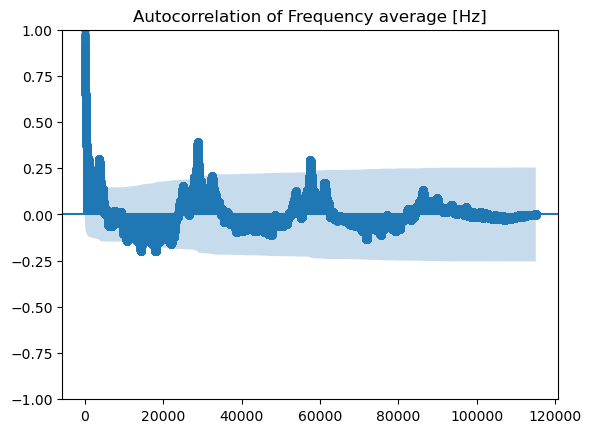

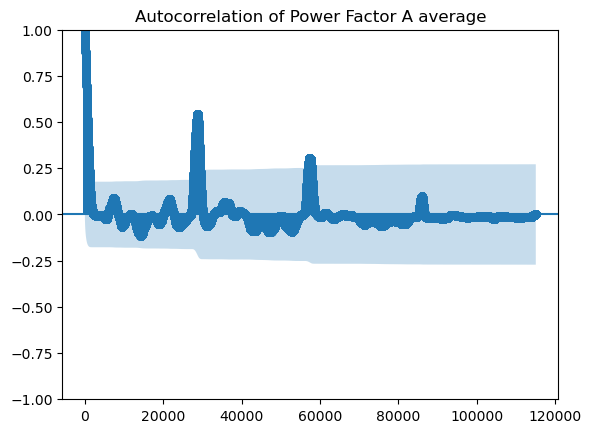

In [144]:
for column in combined_dataset.columns:
    
    # Calculate the autocorrelation of your time series
    autocorr = combined_dataset[column].autocorr()
    
    # Display the autocorrelation plot of your time series from the first element
    fig = tsaplots.plot_acf(combined_dataset[column], lags=range(len(combined_dataset[column])))
    plt.title(f"Autocorrelation of {column}")
    plt.show()

<h3>3.2.2 Calculation of partial autocorrelation</h3>

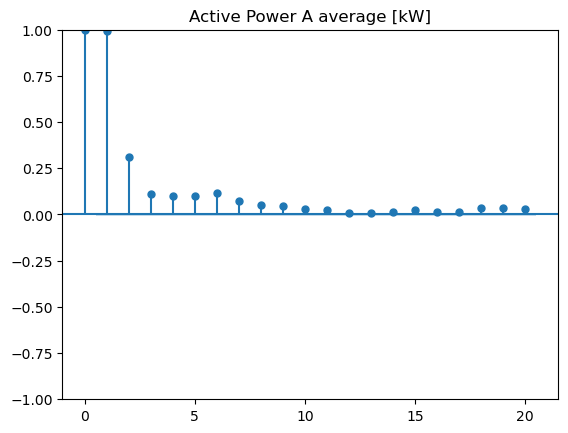

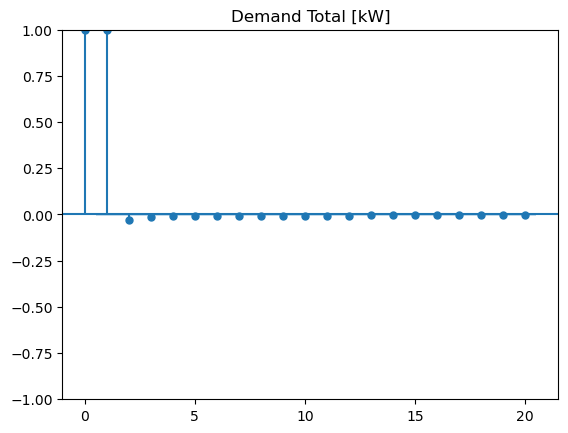

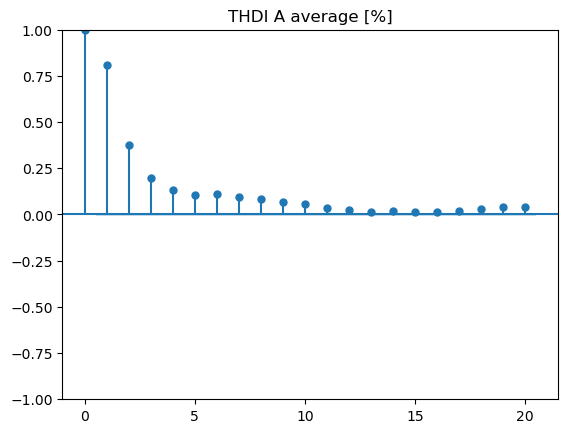

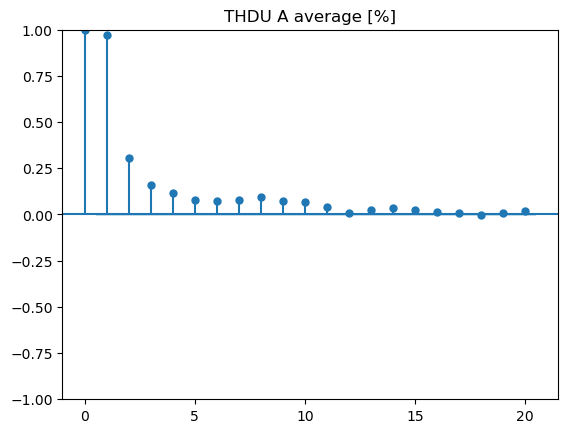

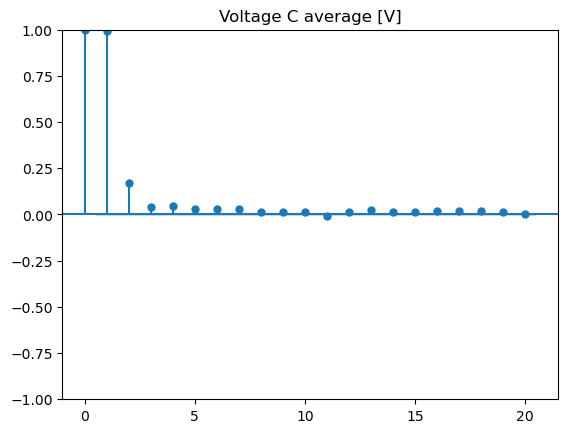

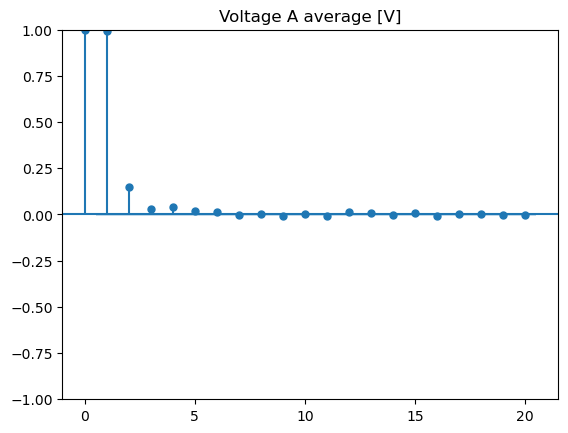

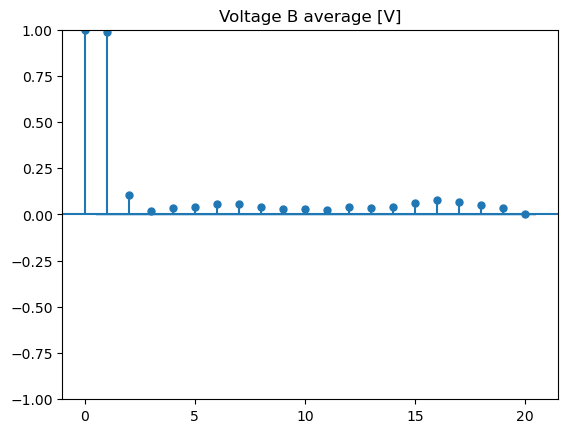

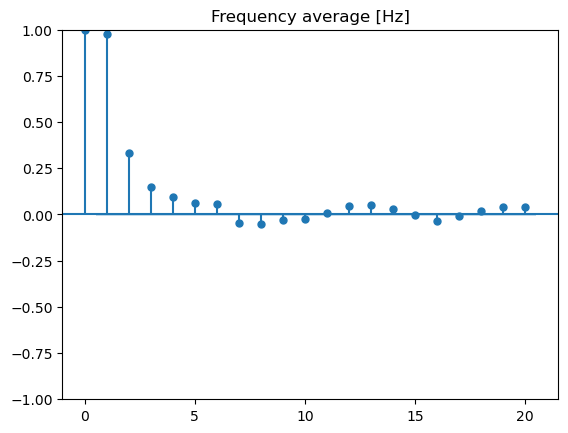

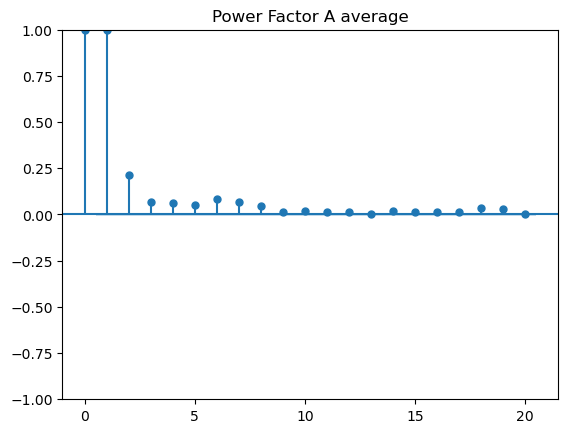

In [101]:
for column in combined_dataset.columns:
    series = combined_dataset[column].values
    tsaplots.plot_pacf(series, lags=20, method='ywm')
    pylab.title(column)
    plt.show()

<h2>3.3 Features</h2>

<h3>3.3.1 'Active Power A average [kW]'</h3>

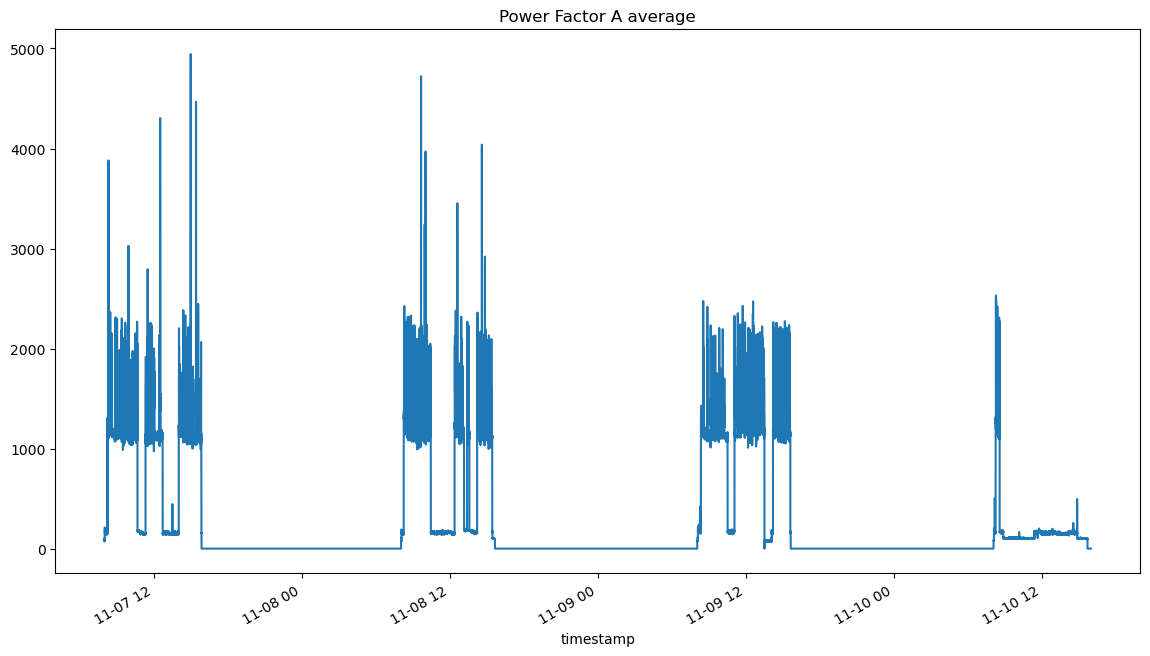

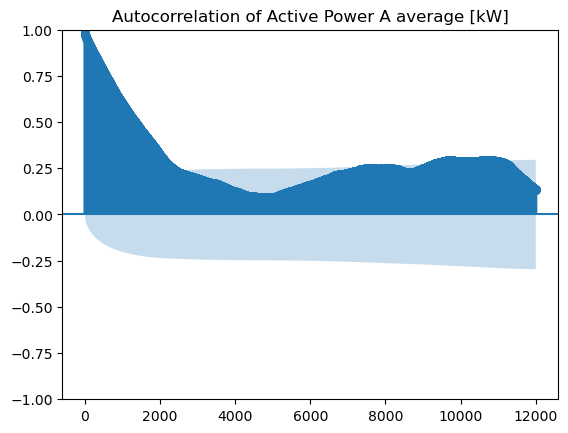

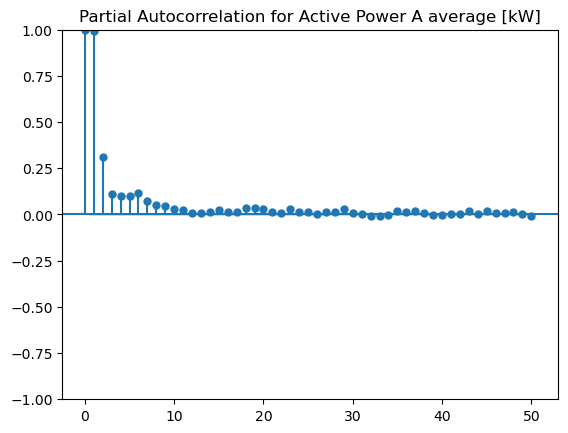

In [153]:
combined_dataset['Active Power A average [kW]'].plot(figsize = (14, 8), title = column)
plt.show()
calculate_autocorrelation(combined_dataset['Active Power A average [kW]'], 'Active Power A average [kW]', 12000)
calculate_partial_autocorrelation(combined_dataset['Active Power A average [kW]'],'Active Power A average [kW]',50)

<p>ACF graf opada veoma sporo sto je pokazatelj nestacionarnosti u podacima, takodje na vecem broju lagova se vidi sinusoidal shape sto je drugi pokazatelj nestacionarnosti. Pored toga i testovi daju slicne rezutate, pa je potrebno differencirati ovu kolonu.</p>
<p>Na PACF grafu se pokazuje da je significant threshold dosta nisko sto moze da bude pokazatelj nestacionarnosti.</p>

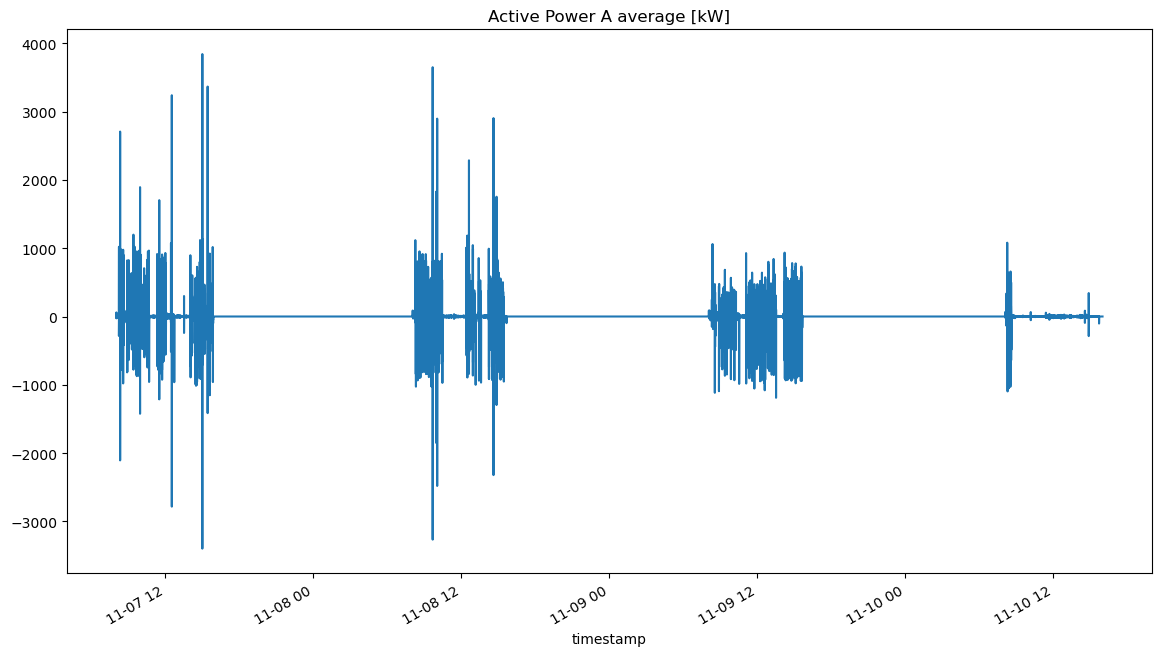

In [190]:
diff_active_power_A = combined_dataset['Active Power A average [kW]'].diff().dropna()
diff_active_power_A.plot(figsize=(14, 8), title = 'Active Power A average [kW]')
plt.show()

<p>Posto smo diferencirali ovaj feature, parametar d za arima model je 1.</p> 

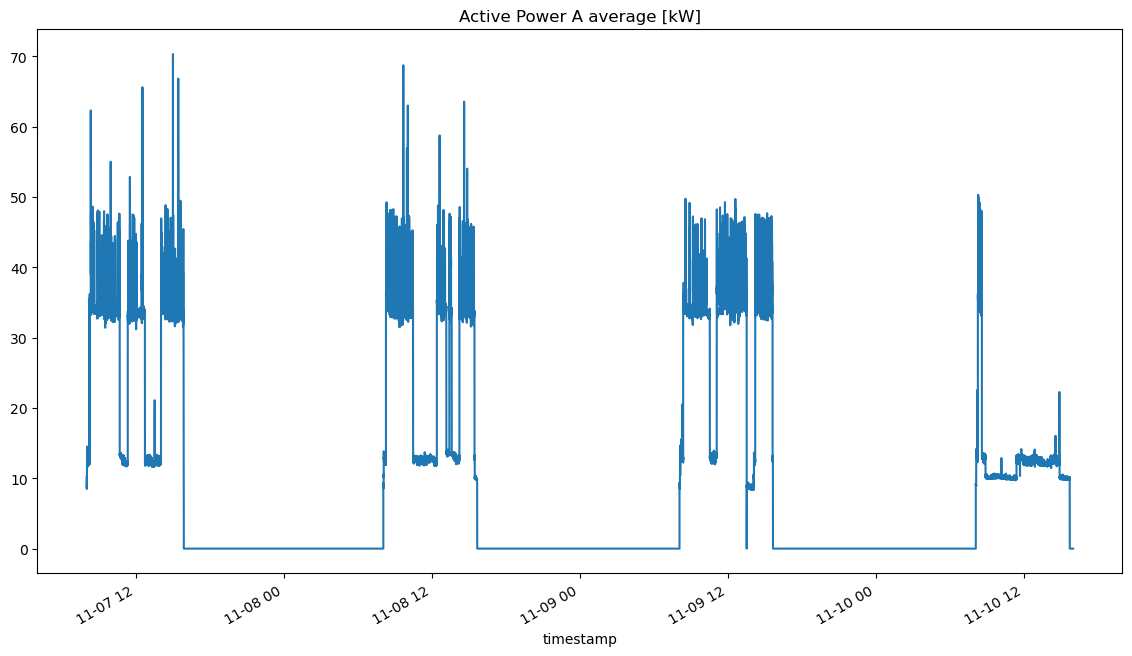

In [319]:
root_active_power_A = np.sqrt(combined_dataset['Active Power A average [kW]']).dropna()
root_active_power_A.plot(figsize=(14, 8), title = 'Active Power A average [kW]')
plt.show()

Nakon korenovanja vremenske serije i plotovanja zakljucuje se da korenovanje nije znacajno uticalo na povecanje stacionarnosti vremenske serije.

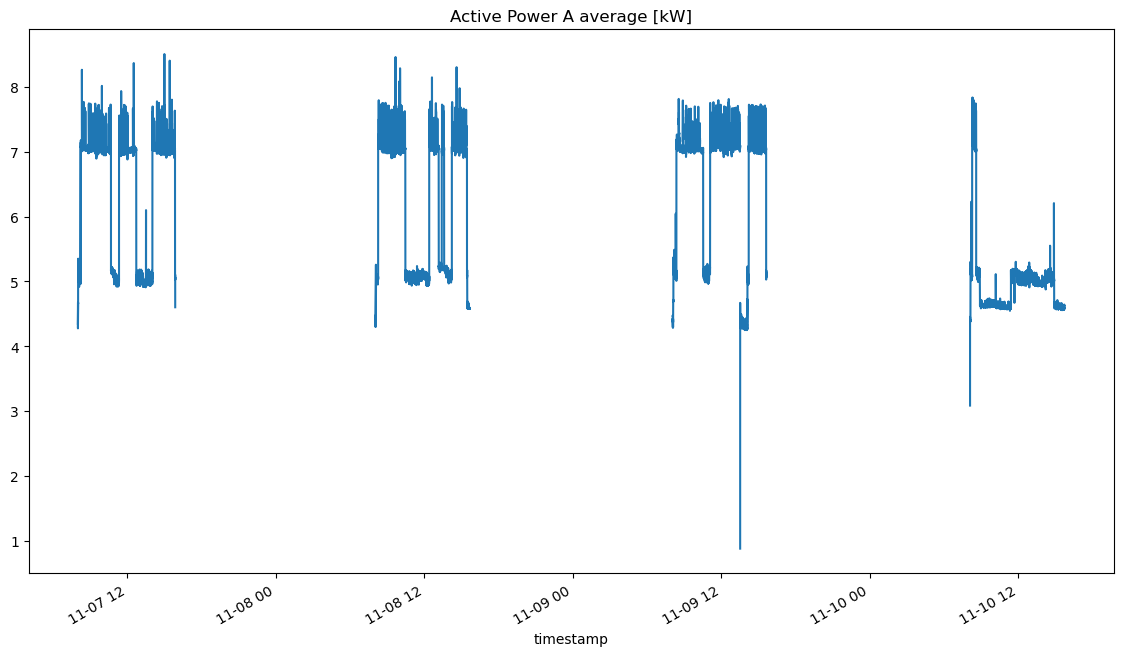

In [321]:
log_active_power_A = np.log(combined_dataset['Active Power A average [kW]']).dropna()
log_active_power_A.plot(figsize=(14, 8), title = 'Active Power A average [kW]')
plt.show()

Nakon logaritmovanja, izgleda da su izgubljene neke vrednosti. Grafici ne izgledaju stacionarnije.

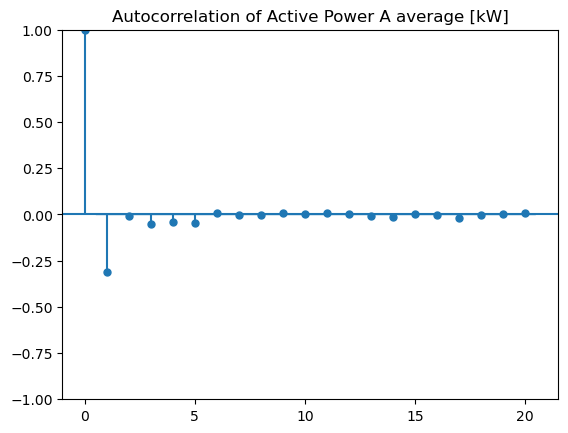

In [191]:
calculate_autocorrelation(diff_active_power_A, 'Active Power A average [kW]', 20)

<p>Moving average order (q) se odredjuje na osnovu broja vaznih lagova na ACF grafu. Na osnovu ovog grafa q = 1.</p>

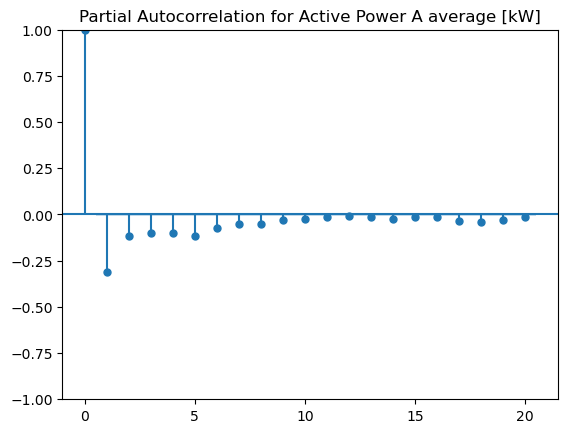

In [192]:
calculate_partial_autocorrelation(diff_acctive_power_A, 'Active Power A average [kW]', 20)

<p>Na osnovu PACF grafa odredjuje se p parametar u ARIMA modelu koji predstavlja red AR modela. Broj znacajnih lagova na PACF grafu odredjuje red AR modela. Na osnovu ovog grafa p=1.</p>

<h3>3.3.2 'Demand Total [kW]'</h3>

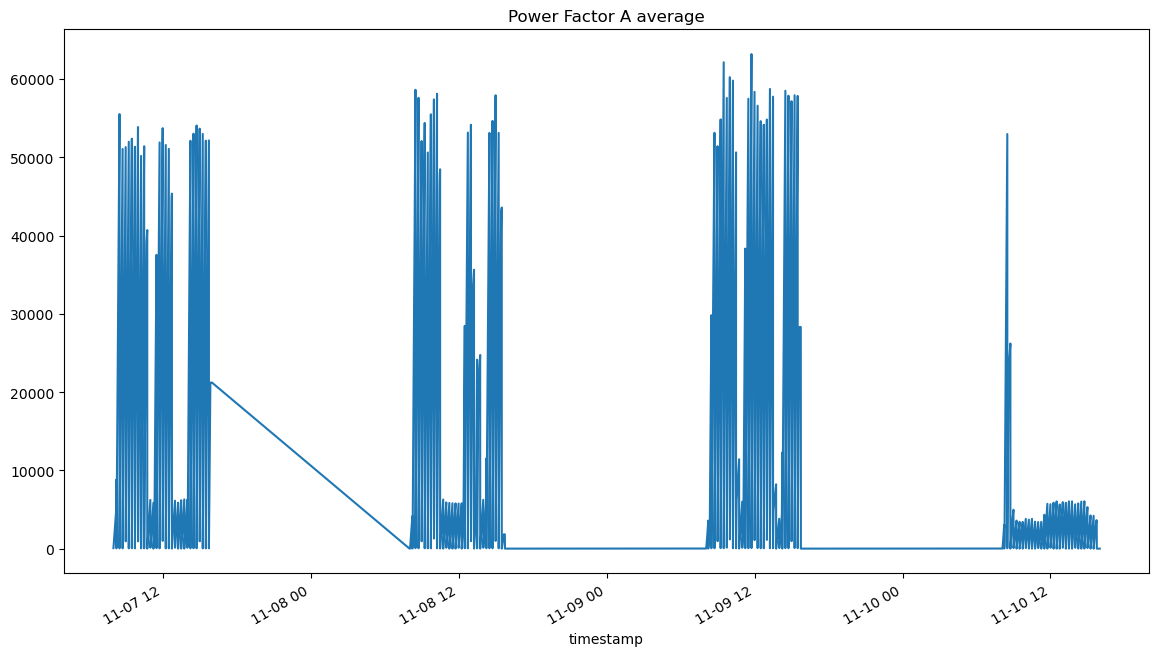

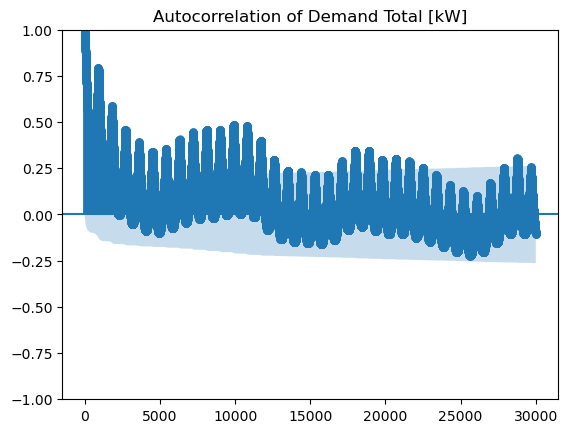

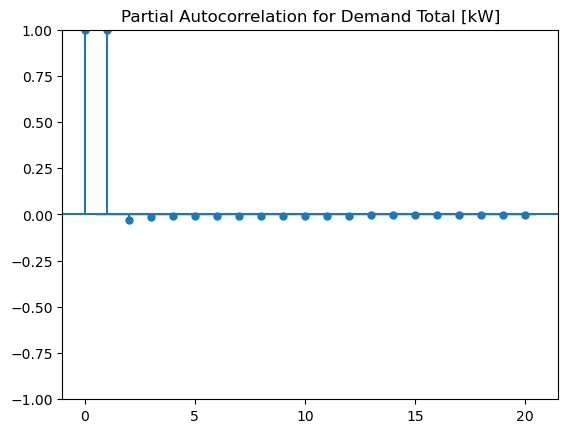

In [179]:
combined_dataset['Demand Total [kW]'].plot(figsize = (14, 8), title = column)
plt.show()
calculate_autocorrelation(combined_dataset['Demand Total [kW]'],'Demand Total [kW]', 30000)
calculate_partial_autocorrelation(combined_dataset['Demand Total [kW]'],'Demand Total [kW]', 20)

<p>Vizuelno se moze zakljuciti da ova vremenska serije nije stacionarna, javlja se sezonalnost, fluktuacija(std) nije konstantna kao ni srednja vrednost u podacima.
ACF graf podseca na sinusoidalan oblik i prikazuje preveliki broj lagova kao significant. Zbog toga ce se na ovu vremensku seriju primeniti diferenciranje.</p>

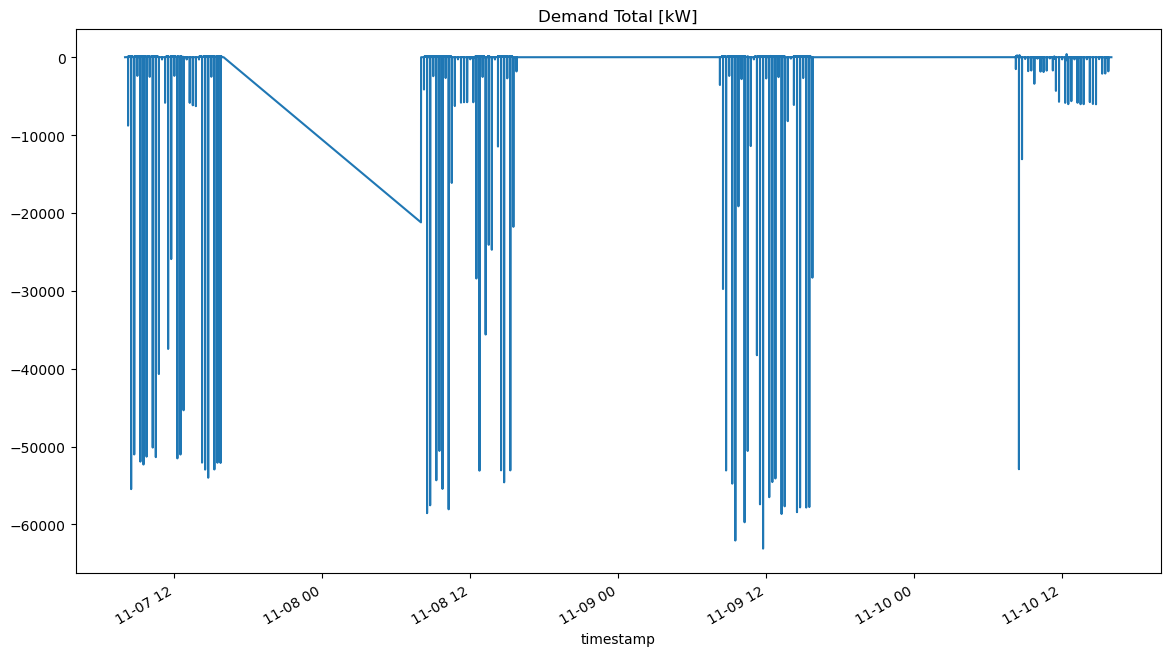

In [195]:
diff_demand_total = combined_dataset['Demand Total [kW]'].diff().dropna()
diff_demand_total.plot(figsize=(14, 8), title = 'Demand Total [kW]')
plt.show()

Kako ova vremenska serija nakon diferenciranja i dalje ne izgleda stacionarno, diferenciranje ce opet biti izvrseno.

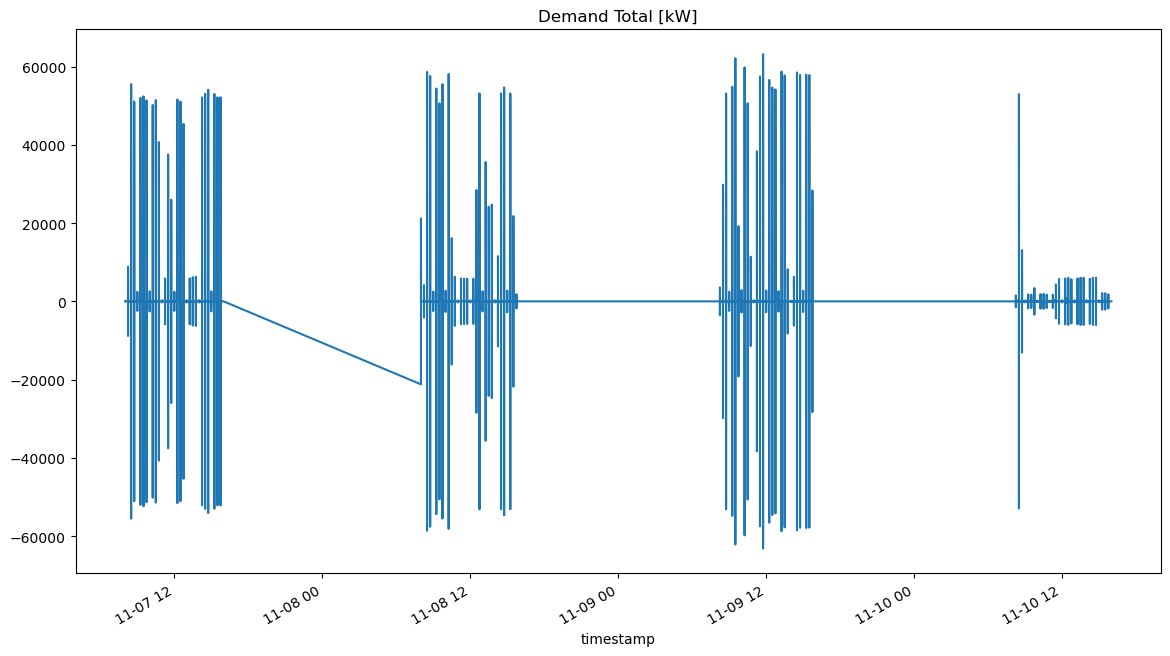

In [200]:
# Second order differencing
diff2_demand_total = diff_demand_total.diff().dropna()

# Plot the twice differentiated series
diff2_demand_total.plot(figsize=(14, 8), title='Demand Total [kW]')
plt.show()

Kako je dva puta izvrseno diferenciranje parametar d za ARIMA model za ovu vremensku seriju je 2.

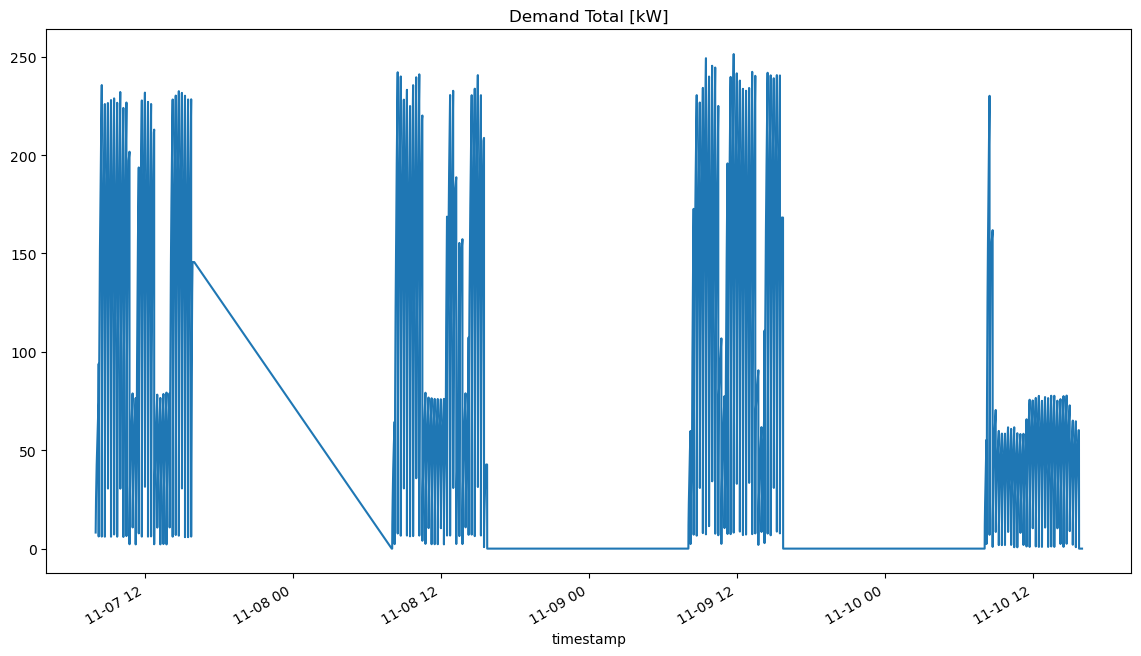

In [322]:
root_demand_total = np.sqrt(combined_dataset['Demand Total [kW]']).dropna()
root_demand_total.plot(figsize=(14, 8), title = 'Demand Total [kW]')
plt.show()

Nakon korenovanja grafik se nije mnogo promenio i ne izgleda kao da je vremenska serija stacionarnija.

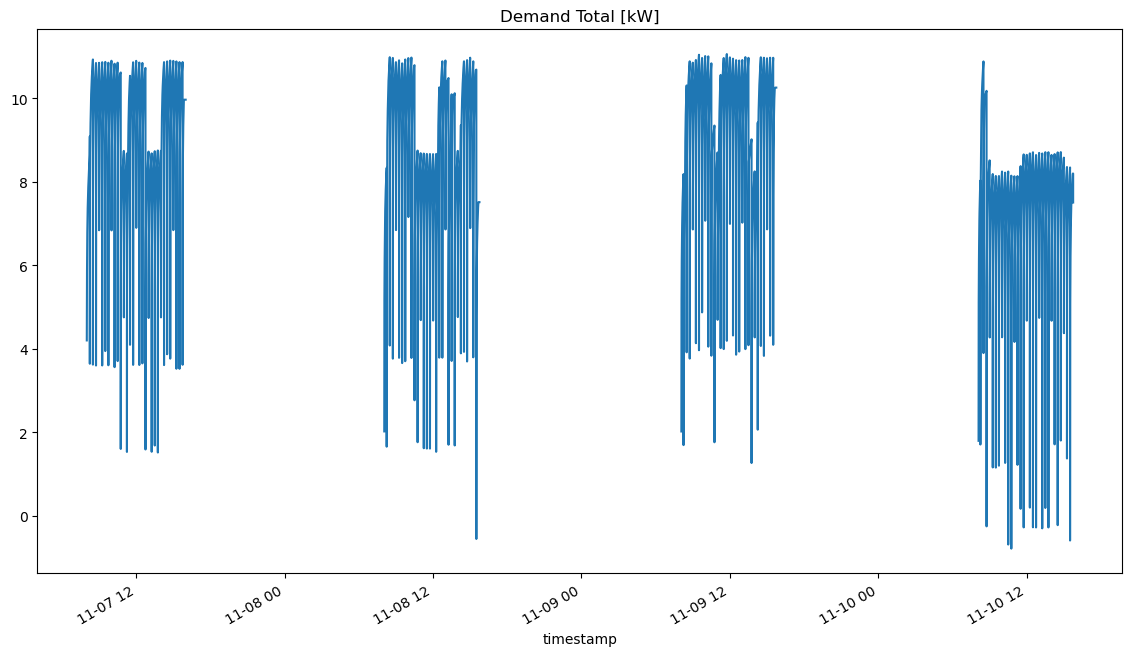

In [323]:
log_demand_total = np.log(combined_dataset['Demand Total [kW]']).dropna()
log_demand_total.plot(figsize=(14, 8), title = 'Demand Total [kW]')
plt.show()

In [325]:
series = log_demand_total.values
adf = ADF(series)
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                    nan
P-value                           nan
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


I nakon korenovanja ADF test i dalje daje rezultate da je vremenska serija slabo stacionarna.

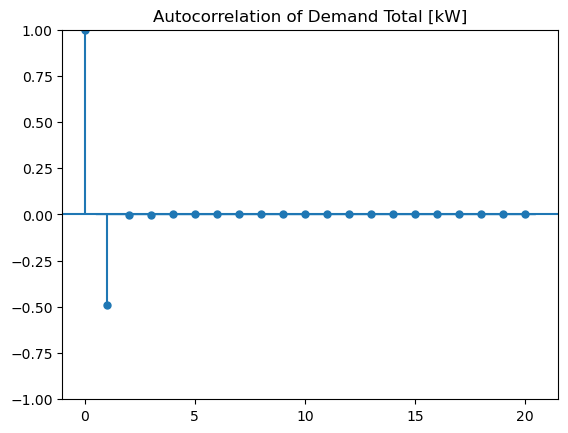

In [201]:
calculate_autocorrelation(diff2_demand_total, 'Demand Total [kW]', 20)

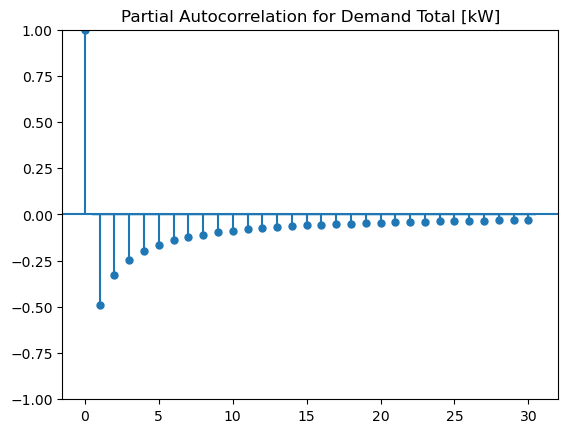

In [205]:
calculate_partial_autocorrelation(diff2_demand_total, 'Demand Total [kW]', 30)

<p>Kako PACF ima vise znacajnih lagova, ali brzo padaju a ACF ima 1 znacajan lag, onda mogu biti isprobana 2 modela. 
<br>Jedan model koji ima samo MA deo, a red tog modela je broj znacajnih lagova na ACF grafu. Dakle q = 1. Ovo resenje je predlozeno na osnovu <a href="https://www.youtube.com/watch?v=CAT0Y66nPhs&t=5s&ab_channel=DataScienceShow">ovog videa.</a> 
<br>Drugi u kome je red AR modela odredjen na osnovu znacajnih lagova na PACF grafu. Uzece se u obzir samo lagovi sa korelacijom vecom od 0.5 tako da je p = 1.</p>

<h3>3.3.3 'THDI A average [%]'</h3>

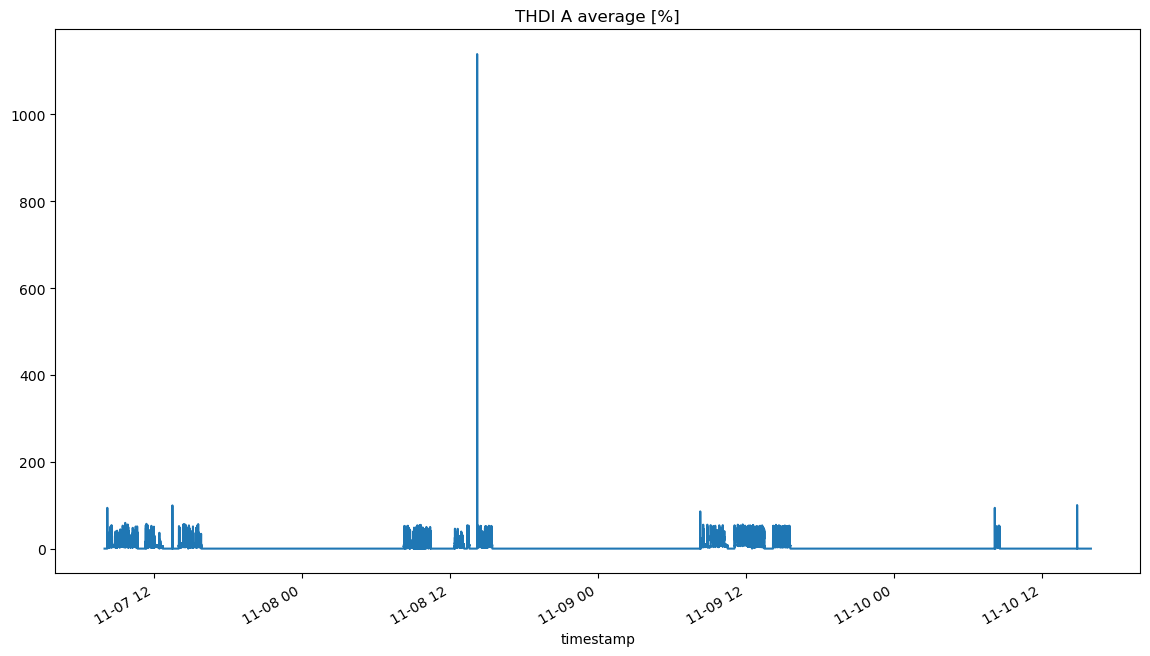

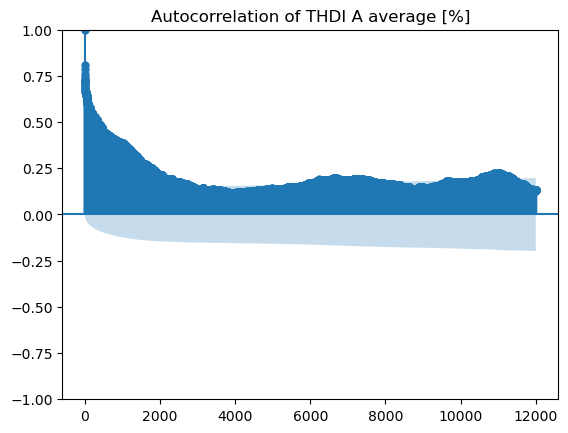

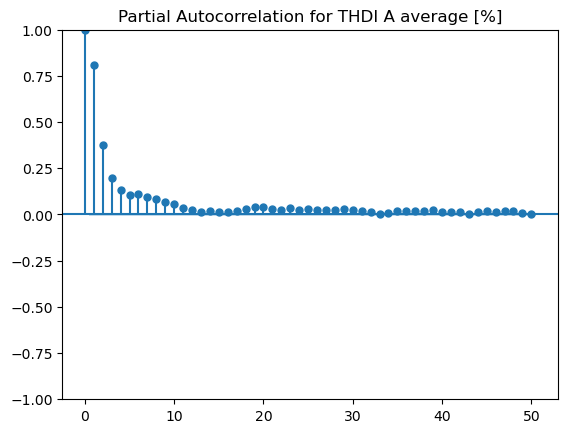

In [375]:
combined_dataset['THDI A average [%]'].plot(figsize = (14, 8), title = column)
plt.title('THDI A average [%]')
plt.show()
calculate_autocorrelation(combined_dataset['THDI A average [%]'], 'THDI A average [%]', 12000)
calculate_partial_autocorrelation(combined_dataset['THDI A average [%]'], 'THDI A average [%]', 50)

ACF prikazuje preveliki broj lagova kao znacajne. Zbog toga ce se na ovu vremensku seriju primeniti diferenciranje.

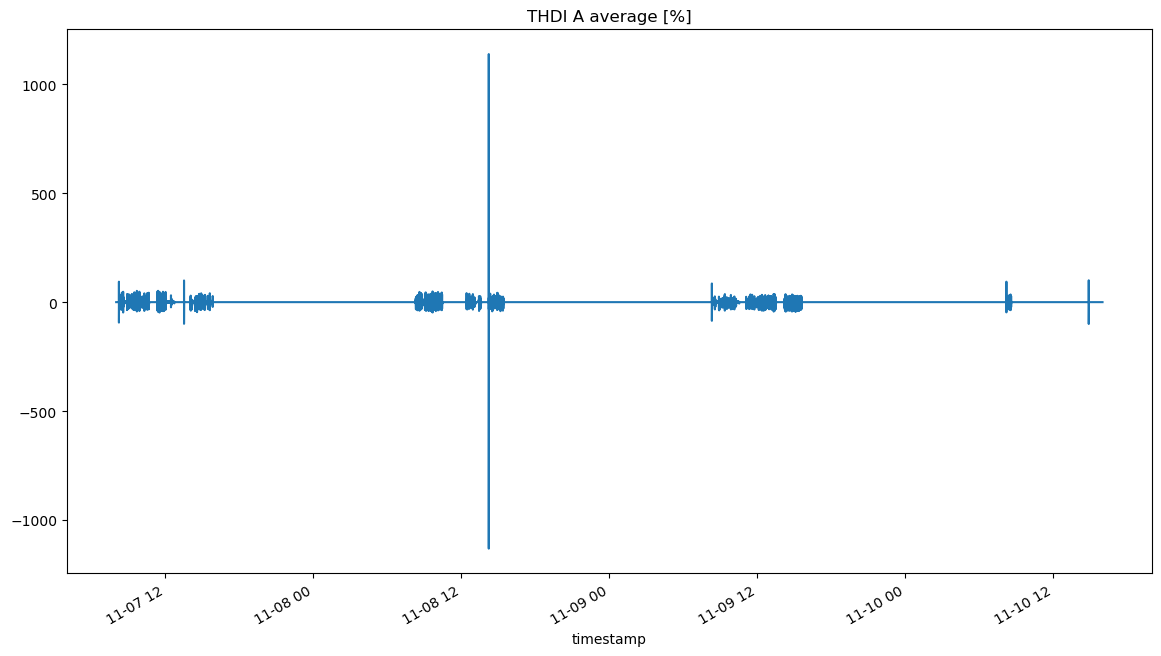

In [217]:
diff_thdi_a = combined_dataset['THDI A average [%]'].diff().dropna()
diff_thdi_a.plot(figsize=(14, 8), title = 'THDI A average [%]')
plt.show()

Posto smo diferencirali ovaj feature, parametar d za arima model je 1.

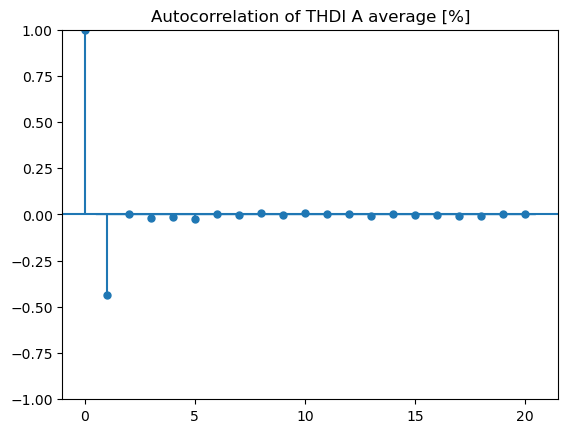

In [220]:
calculate_autocorrelation(diff_thdi_a, 'THDI A average [%]', 20)

S obzirom da grafik pokazuje 1 znacajan lag, onda ce parametar q biti 1.

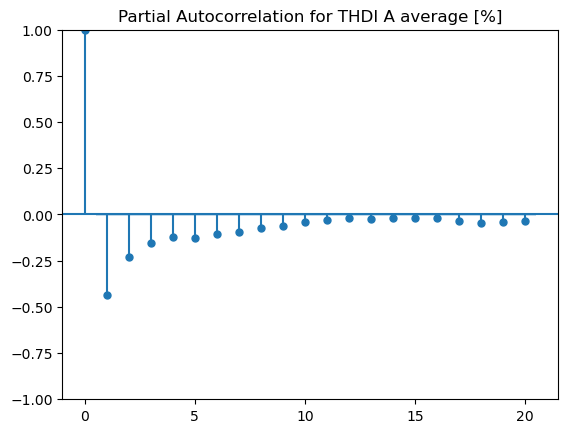

In [221]:
calculate_partial_autocorrelation(diff_thdi_a, 'THDI A average [%]', 20)

<p>Kako PACF ima vise znacajnih lagova, ali brzo padaju a ACF ima 1 znacajan lag, onda mogu biti isprobana 2 modela. 
<br>Jedan model koji ima samo MA deo, a red tog modela je broj znacajnih lagova na ACF grafu. Ovo resenje je predlozeno na osnovu <a href="https://www.youtube.com/watch?v=CAT0Y66nPhs&t=5s&ab_channel=DataScienceShow">ovog videa.</a> 
<br>Drugi u kome je red AR modela odredjen na osnovu znacajnih lagova na PACF grafu. Uzece se u obzir samo lagovi sa korelacijom vecom od 0.25 tako da je p = 1</p>

<h3>3.3.4 'THDU A average [%]'</h3>

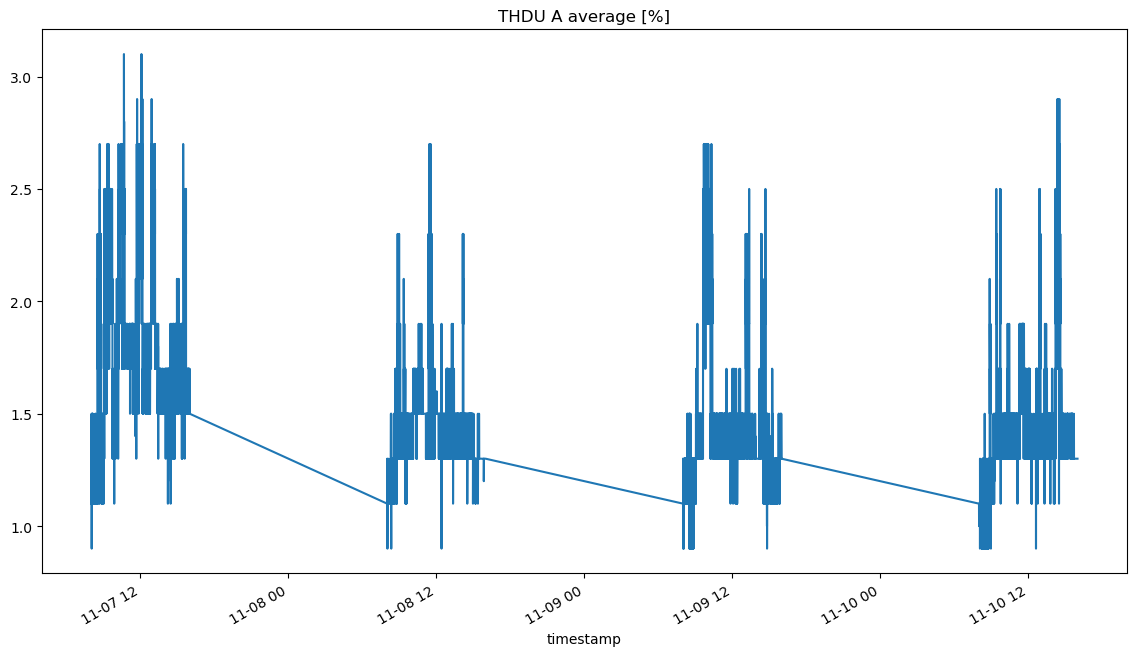

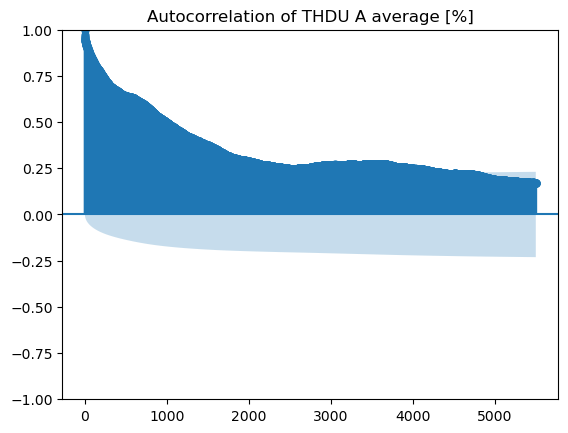

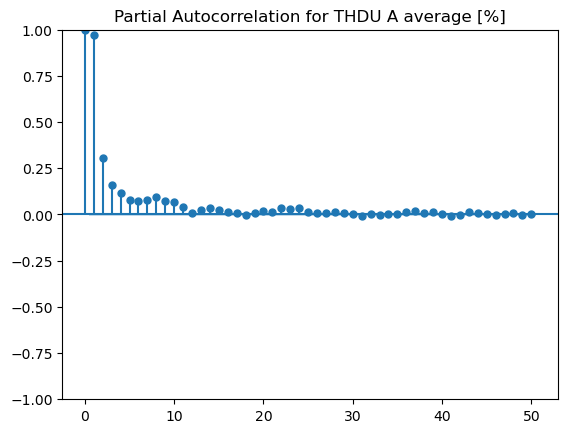

In [376]:
combined_dataset['THDU A average [%]'].plot(figsize = (14, 8), title = column)
plt.title('THDU A average [%]')
plt.show()
calculate_autocorrelation(combined_dataset['THDU A average [%]'], 'THDU A average [%]', 5500)
calculate_partial_autocorrelation(combined_dataset['THDU A average [%]'], 'THDU A average [%]', 50)

ACF prikazuje preveliki broj lagova kao znacajne. Zbog toga ce se na ovu vremensku seriju primeniti diferenciranje.

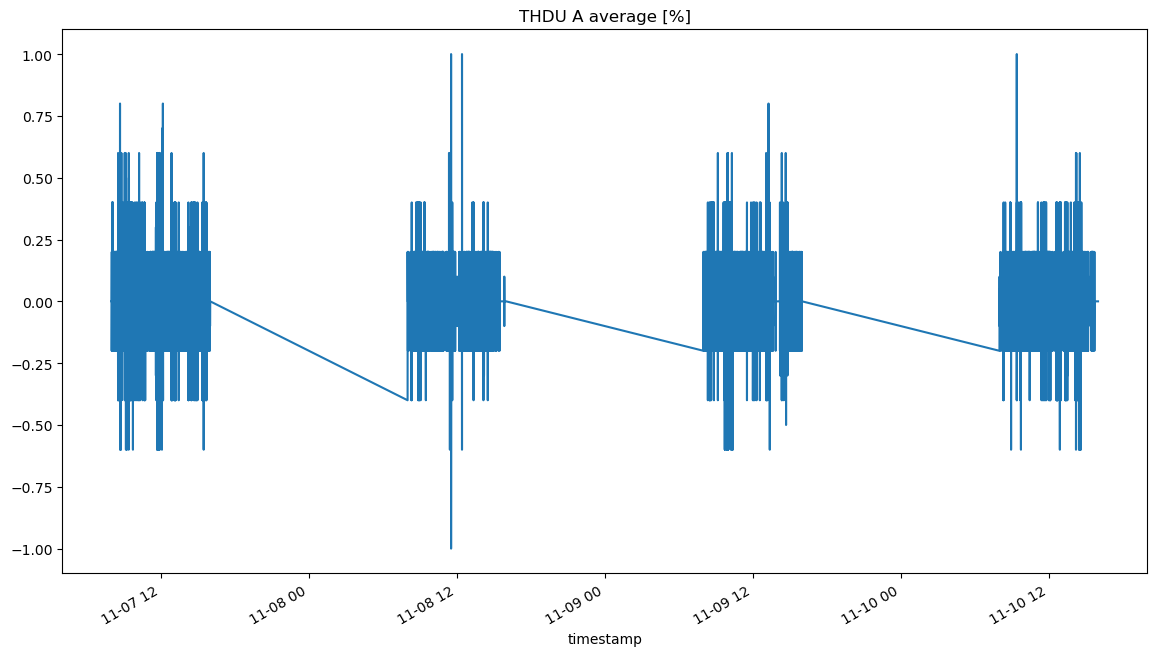

In [223]:
diff_thdi_u = combined_dataset['THDU A average [%]'].diff().dropna()
diff_thdi_u.plot(figsize=(14, 8), title = 'THDU A average [%]')
plt.show()

Posto smo diferencirali ovaj feature, parametar d za arima model je 1.

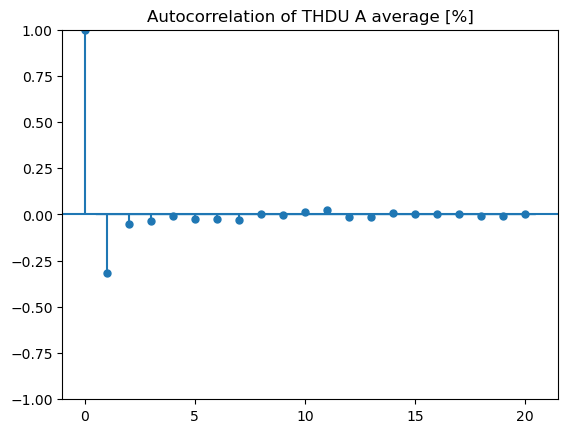

In [228]:
calculate_autocorrelation(diff_thdi_u, 'THDU A average [%]', 20)

ACF prikazuje jedan znacajan lag sto znaci q=1.

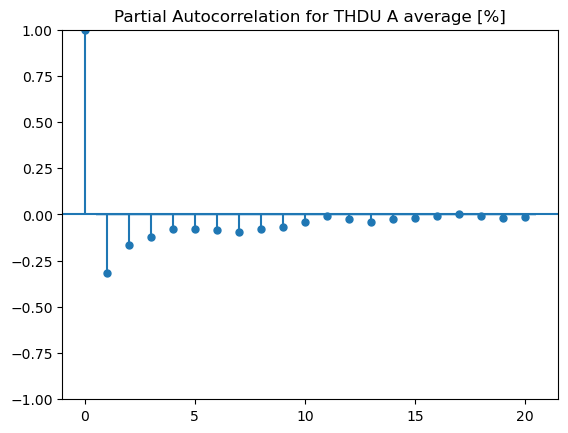

In [229]:
calculate_partial_autocorrelation(diff_thdi_u, 'THDU A average [%]', 20)

Na osnovu ovog grafika p=1.

<h3>3.3.5 'Voltage C average [V]'</h3>

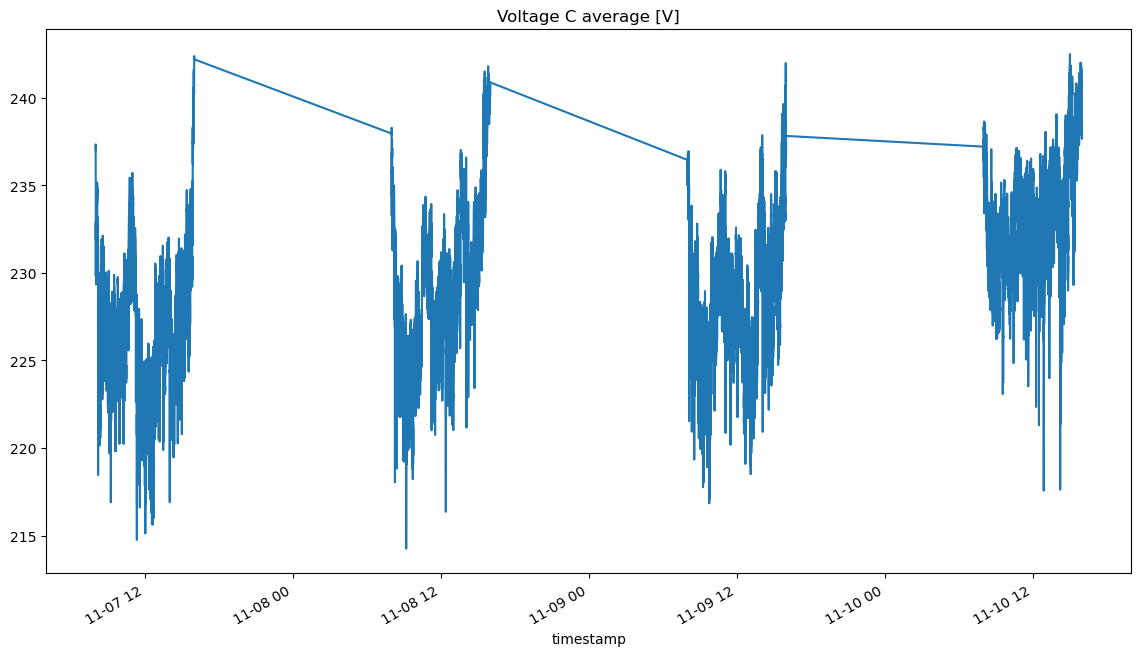

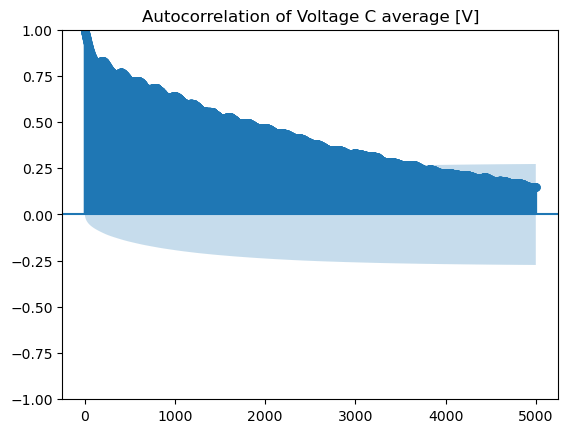

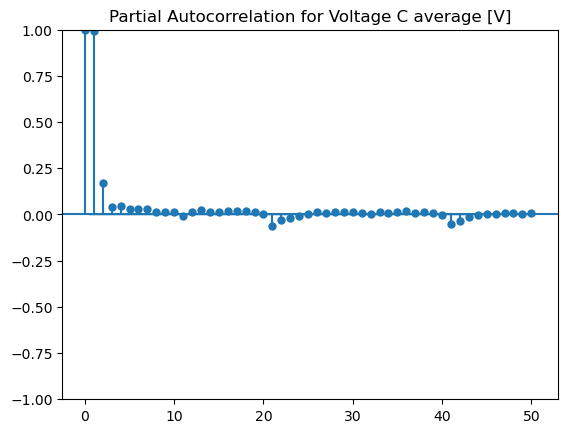

In [378]:
combined_dataset['Voltage C average [V]'].plot(figsize = (14, 8), title = column)
plt.title('Voltage C average [V]')
plt.show()
calculate_autocorrelation(combined_dataset['Voltage C average [V]'], 'Voltage C average [V]', 5000)
calculate_partial_autocorrelation(combined_dataset['Voltage C average [V]'], 'Voltage C average [V]', 50)

ACF prikazuje preveliki broj lagova kao znacajne. Zbog toga ce se na ovu vremensku seriju primeniti diferenciranje.

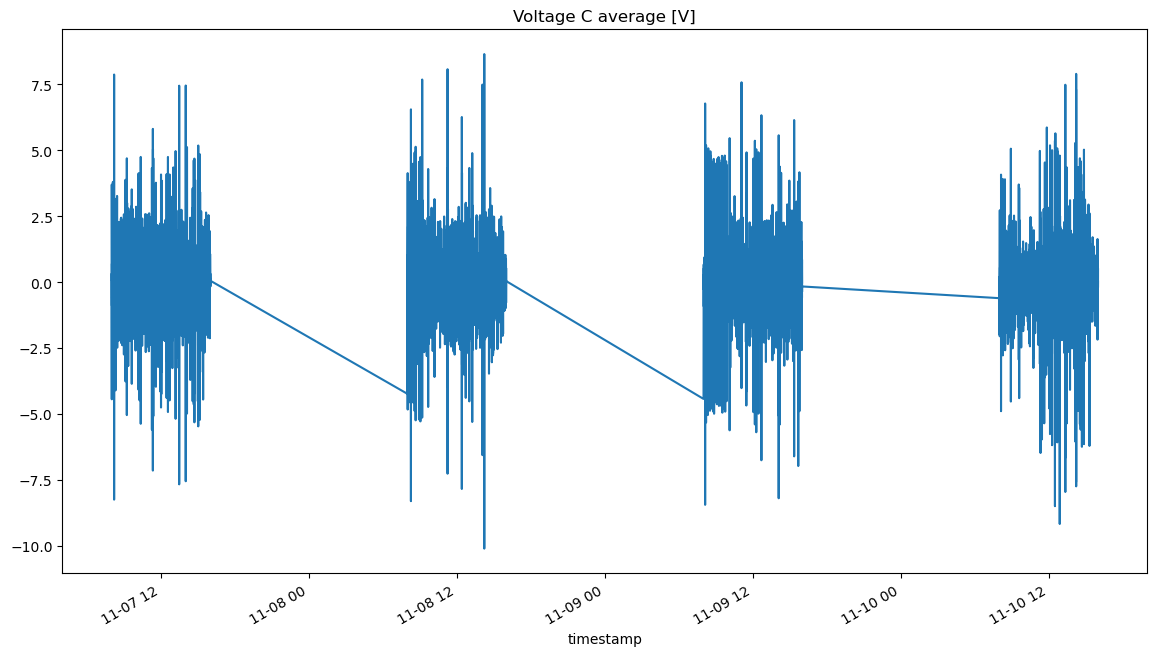

In [233]:
diff_voltage_c = combined_dataset['Voltage C average [V]'].diff().dropna()
diff_voltage_c.plot(figsize=(14, 8), title = 'Voltage C average [V]')
plt.show()

Zbog diferenciranja d = 1.

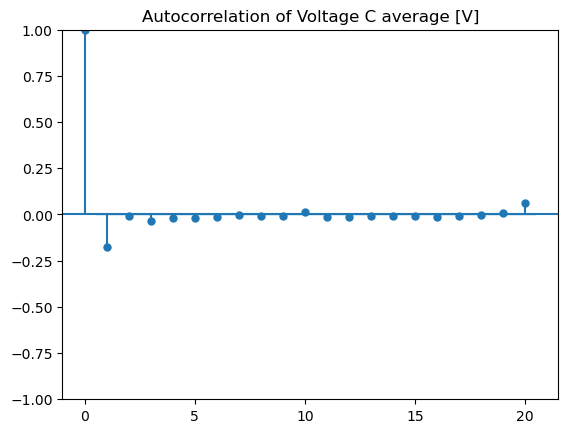

In [236]:
calculate_autocorrelation(diff_voltage_c, 'Voltage C average [V]', 20)

Na osnovu ACF grafika q = 1.

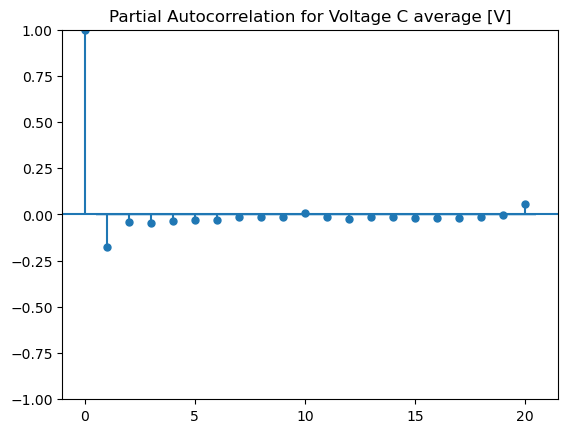

In [237]:
calculate_partial_autocorrelation(diff_voltage_c, 'Voltage C average [V]', 20)

Na osnovu PACF grafika p = 1.

<h3>3.3.6 'Voltage A average [V]'</h3>

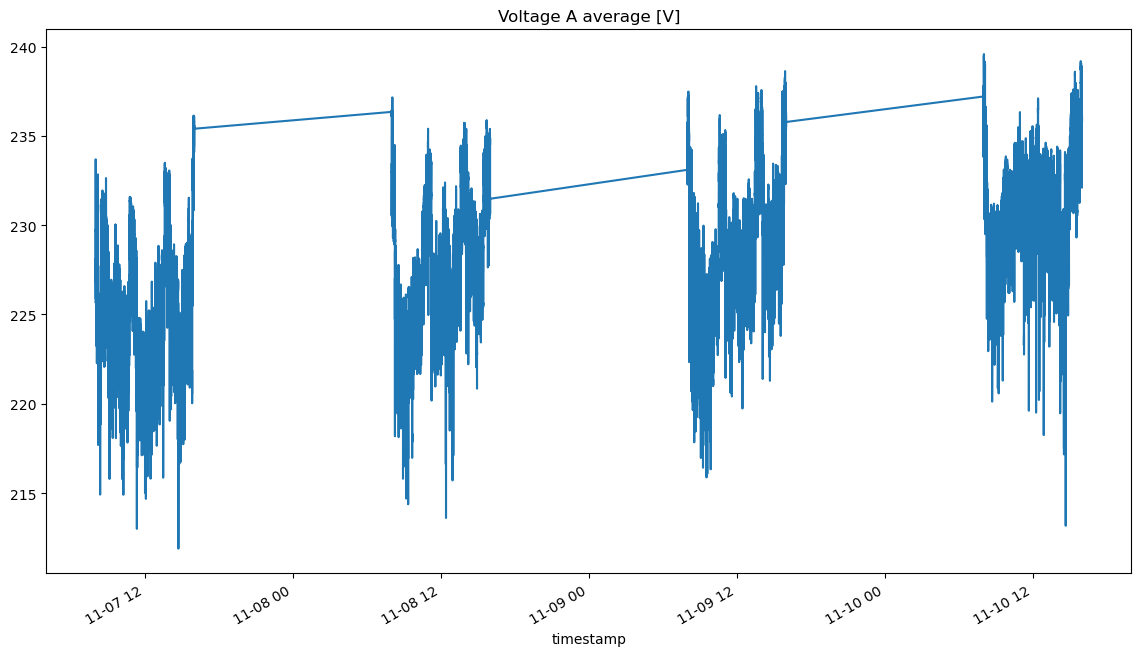

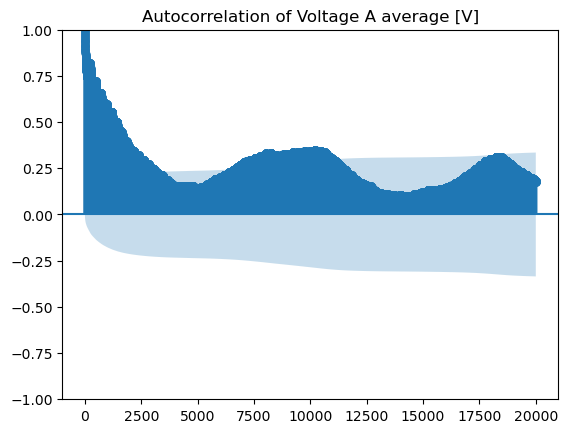

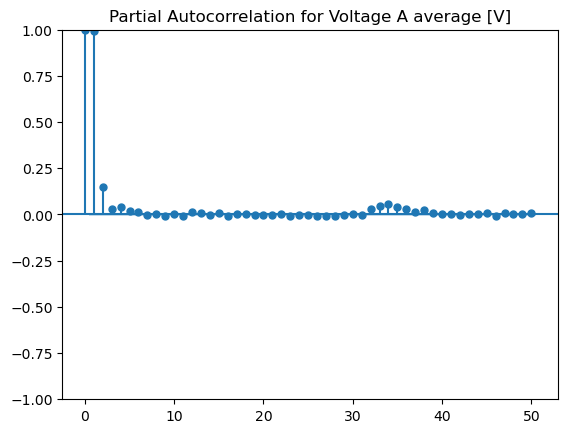

In [380]:
combined_dataset['Voltage A average [V]'].plot(figsize = (14, 8), title = column)
plt.title('Voltage A average [V]')
plt.show()
calculate_autocorrelation(combined_dataset['Voltage A average [V]'], 'Voltage A average [V]', 20000)
calculate_partial_autocorrelation(combined_dataset['Voltage A average [V]'], 'Voltage A average [V]', 50)

ACF prikazuje preveliki broj lagova kao znacajne. Zbog toga ce se na ovu vremensku seriju primeniti diferenciranje.

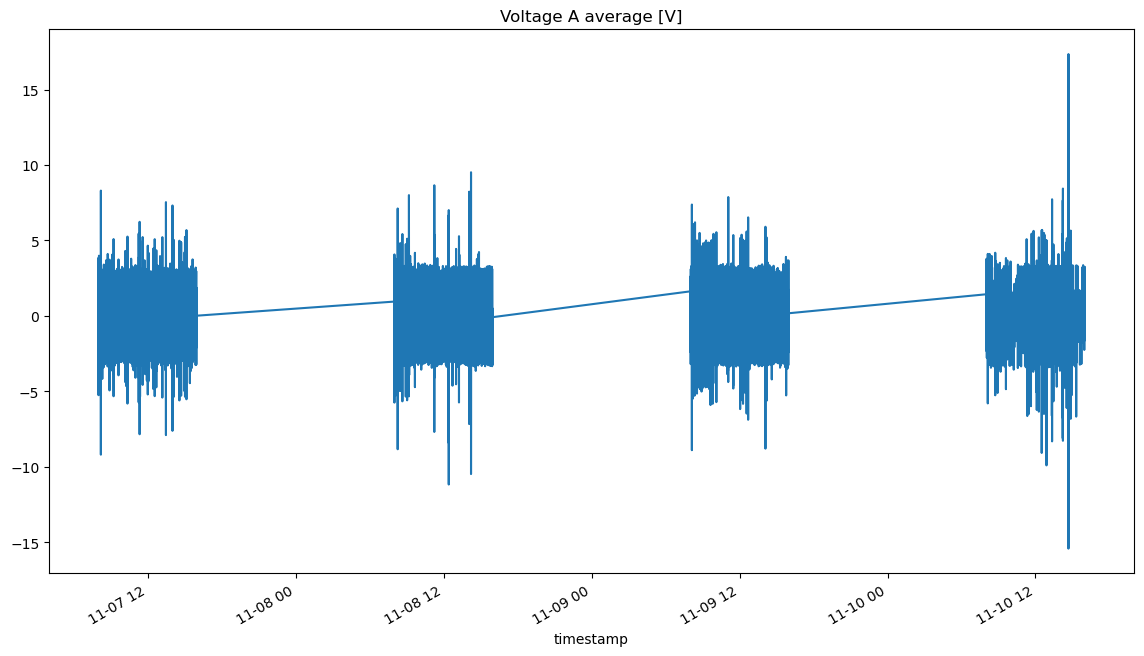

In [239]:
diff_voltage_a = combined_dataset['Voltage A average [V]'].diff().dropna()
diff_voltage_a.plot(figsize=(14, 8), title = 'Voltage A average [V]')
plt.show()

Zbog diferenciranja d = 1.

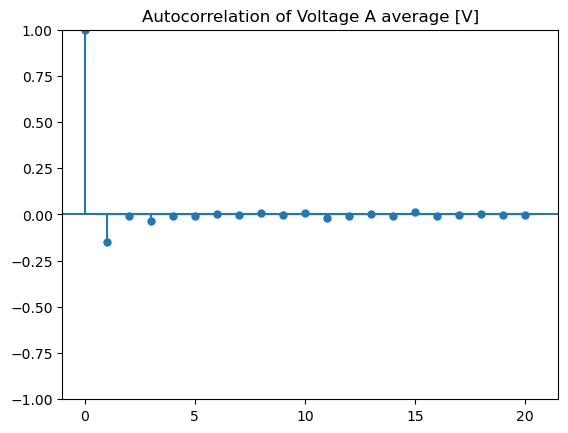

In [240]:
calculate_autocorrelation(diff_voltage_a, 'Voltage A average [V]', 20)

Na osnovu ACF grafika q = 1.

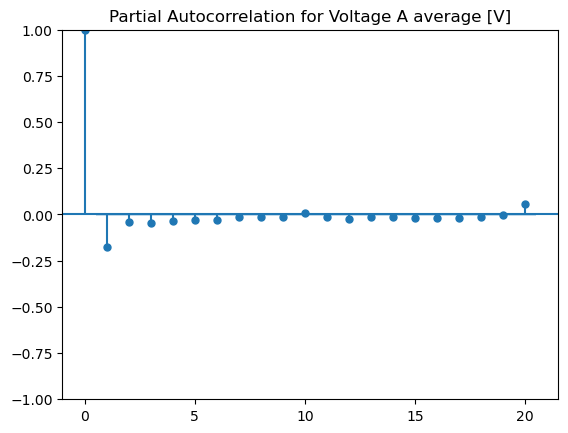

In [241]:
calculate_partial_autocorrelation(diff_voltage_c, 'Voltage A average [V]', 20)

Na osnovu PACF grafika p = 1.

<h3>3.3.7 'Voltage B average [V]'</h3>

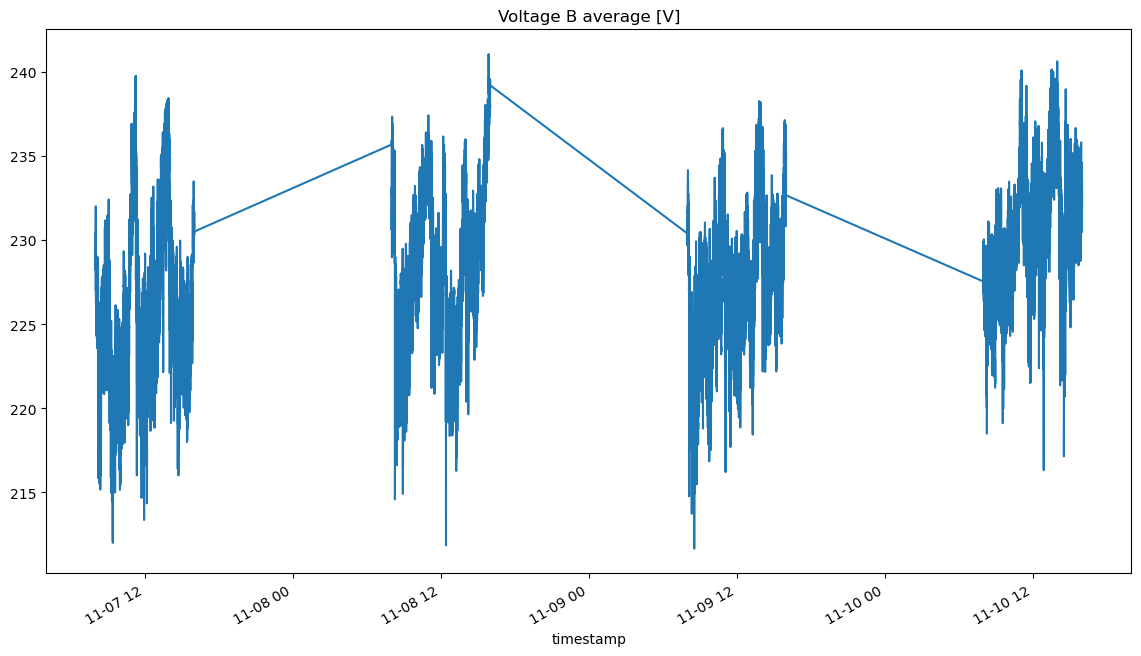

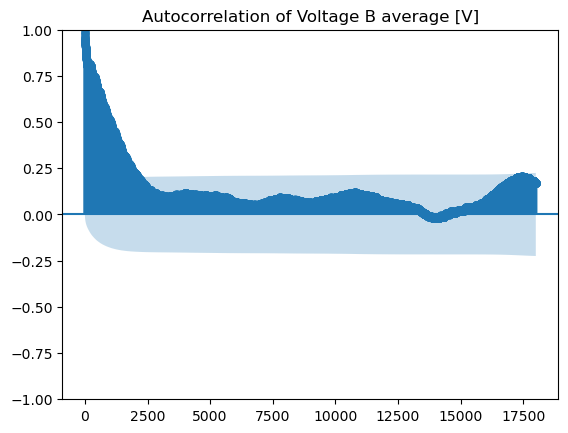

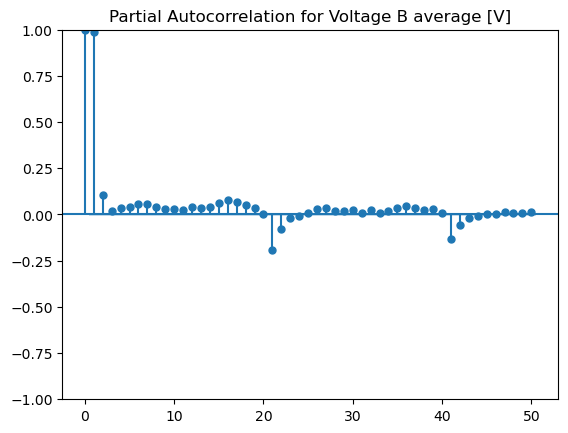

In [381]:
combined_dataset['Voltage B average [V]'].plot(figsize = (14, 8), title = column)
plt.title('Voltage B average [V]')
plt.show()
calculate_autocorrelation(combined_dataset['Voltage B average [V]'], 'Voltage B average [V]', 18000)
calculate_partial_autocorrelation(combined_dataset['Voltage B average [V]'], 'Voltage B average [V]', 50)

ACF prikazuje preveliki broj lagova kao znacajne. Zbog toga ce se na ovu vremensku seriju primeniti diferenciranje.

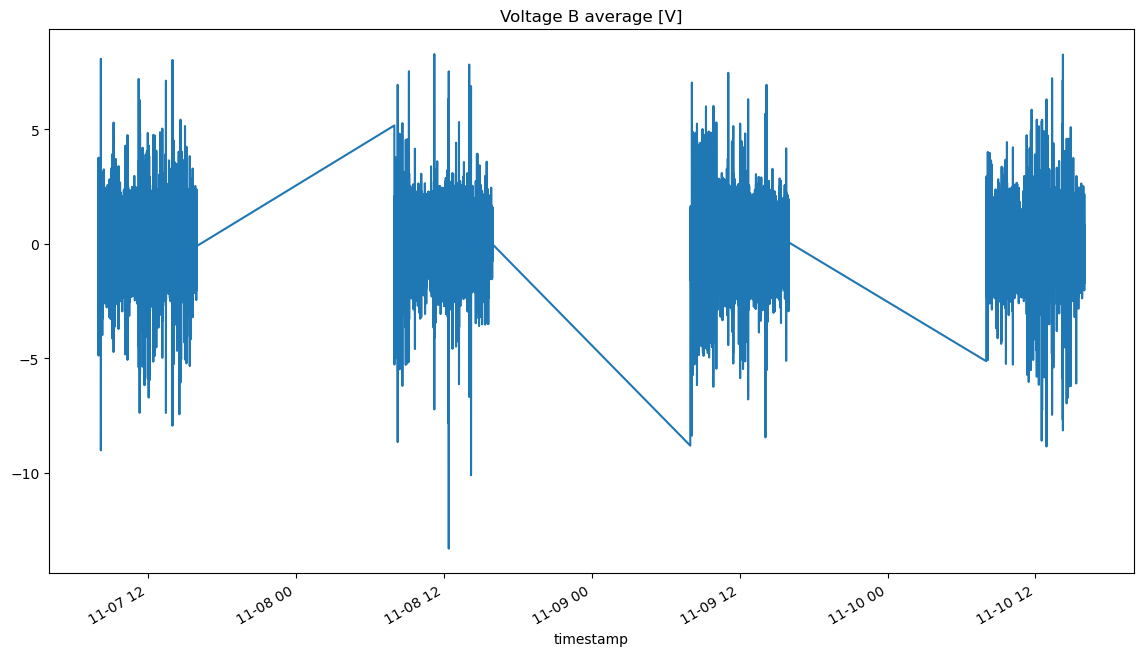

In [243]:
diff_voltage_b = combined_dataset['Voltage B average [V]'].diff().dropna()
diff_voltage_b.plot(figsize=(14, 8), title = 'Voltage B average [V]')
plt.show()

Zbog diferenciranja d = 1.

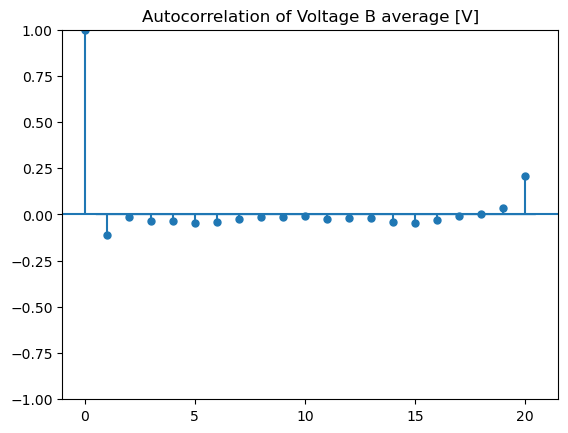

In [244]:
calculate_autocorrelation(diff_voltage_b, 'Voltage B average [V]', 20)

Na osnovu ACF grafika q = 1.

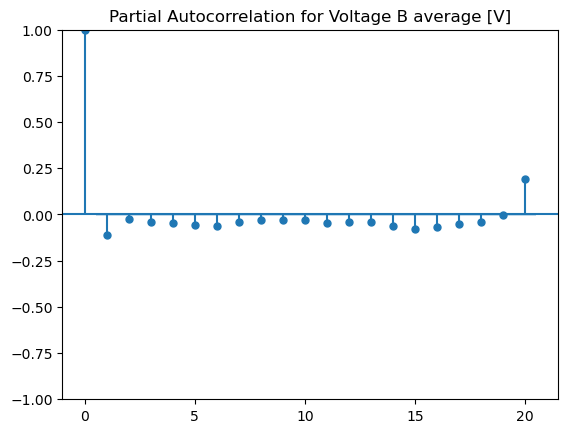

In [245]:
calculate_partial_autocorrelation(diff_voltage_b, 'Voltage B average [V]', 20)

Na osnovu PACF grafika p = 1.

<h3>3.3.8 'Frequency average [Hz]'</h3>

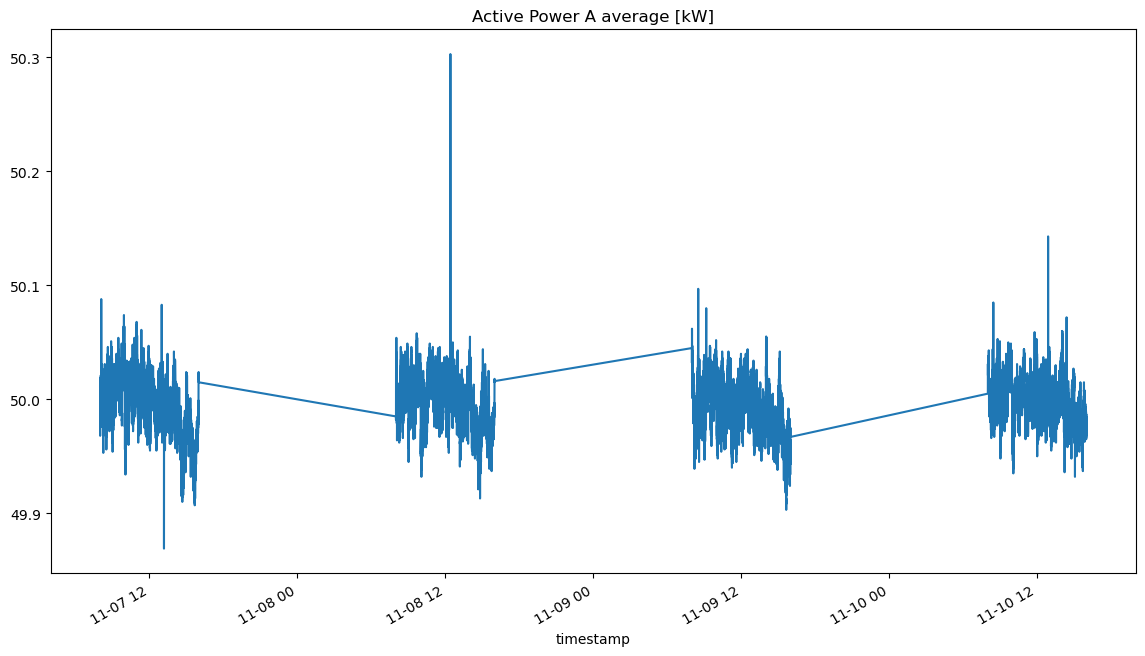

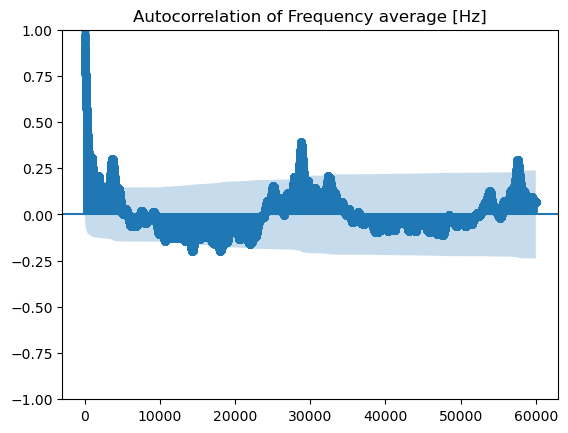

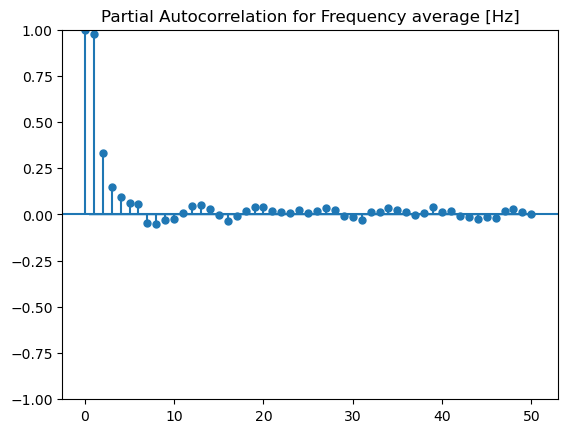

In [247]:
combined_dataset['Frequency average [Hz]'].plot(figsize = (14, 8), title = column)
plt.show()
calculate_autocorrelation(combined_dataset['Frequency average [Hz]'], 'Frequency average [Hz]', 60000)
calculate_partial_autocorrelation(combined_dataset['Frequency average [Hz]'], 'Frequency average [Hz]', 50)

ACF prikazuje preveliki broj lagova kao znacajne, sto ukazuje na nestacionarnu vremensku celiju. Zbog toga ce se na ovu vremensku seriju primeniti diferenciranje.

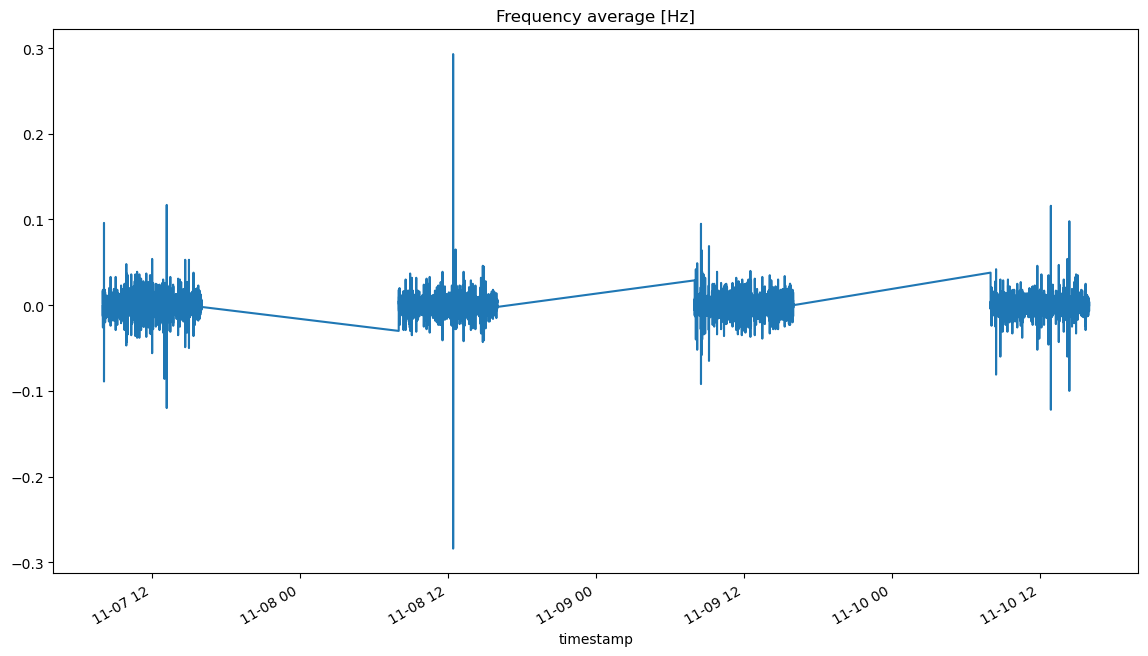

In [249]:
frequency_avg_diff = combined_dataset['Frequency average [Hz]'].diff().dropna()
frequency_avg_diff.plot(figsize=(14, 8), title = 'Frequency average [Hz]')
plt.show()

Zbog diferenciranja d = 1.

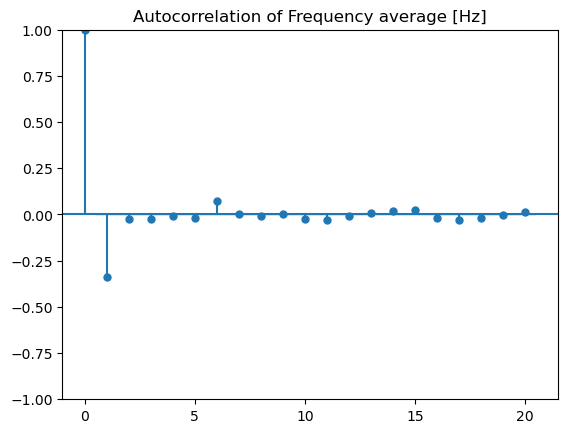

In [250]:
calculate_autocorrelation(frequency_avg_diff, 'Frequency average [Hz]', 20)

Na osnovu ACF grafika q = 1.

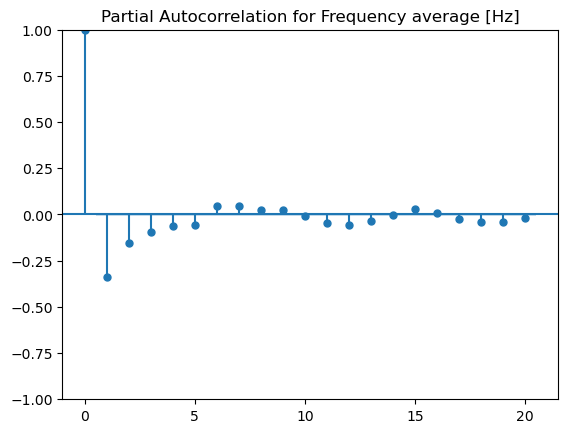

In [251]:
calculate_partial_autocorrelation(frequency_avg_diff, 'Frequency average [Hz]', 20)

Na osnovu PACF grafika p = 1.

<h3>3.3.9 'Power Factor A average'</h3>

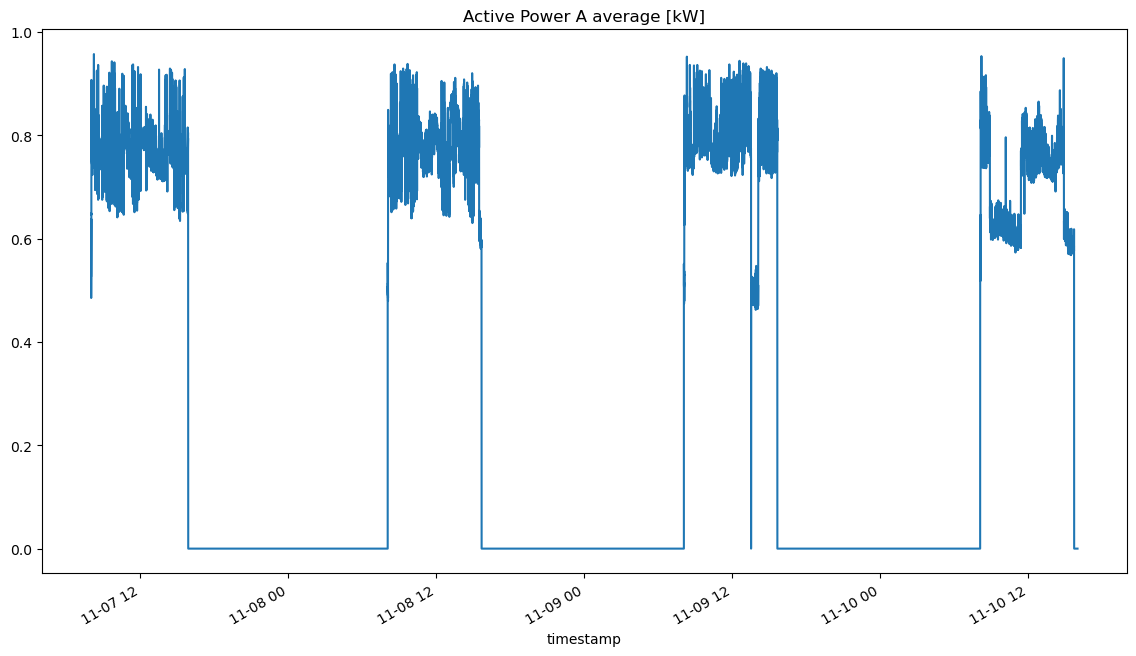

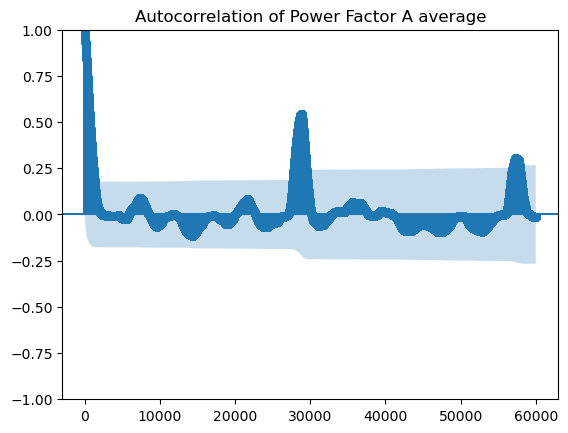

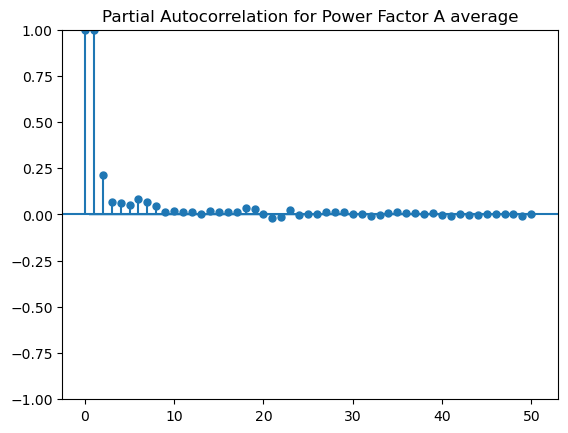

In [252]:
combined_dataset['Power Factor A average'].plot(figsize = (14, 8), title = column)
plt.show()
calculate_autocorrelation(combined_dataset['Power Factor A average'], 'Power Factor A average', 60000)
calculate_partial_autocorrelation(combined_dataset['Power Factor A average'], 'Power Factor A average', 50)

ACF prikazuje preveliki broj lagova kao znacajne, sto ukazuje na nestacionarnu vremensku celiju. Zbog toga ce se na ovu vremensku seriju primeniti diferenciranje.

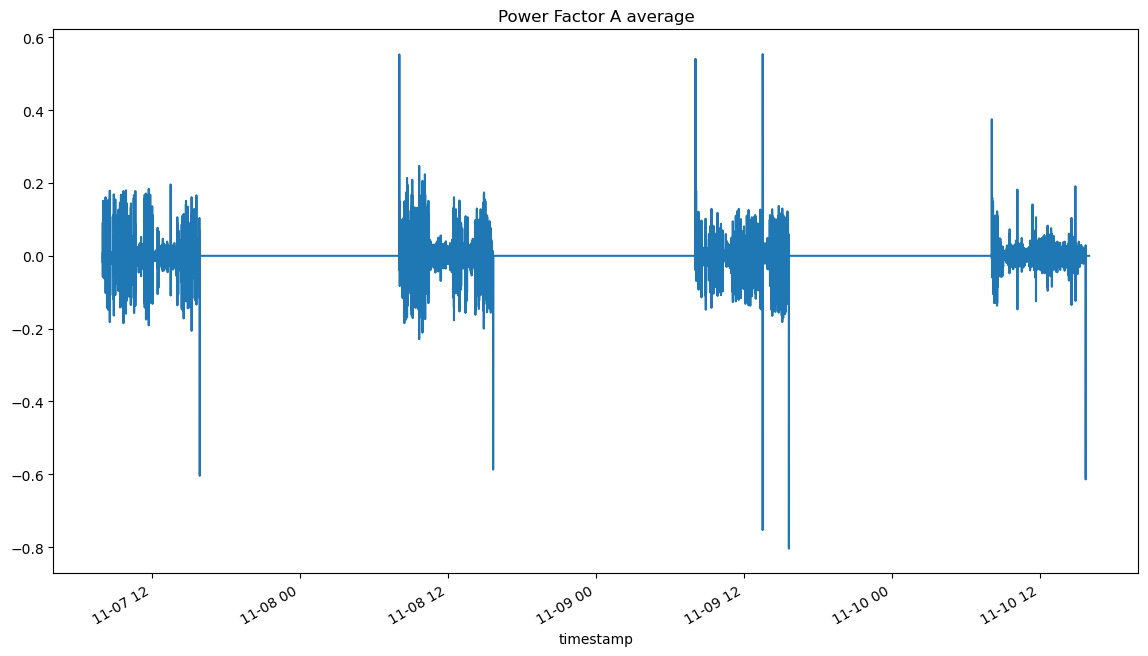

In [253]:
power_factor_a_diff = combined_dataset['Power Factor A average'].diff().dropna()
power_factor_a_diff.plot(figsize=(14, 8), title = 'Power Factor A average')
plt.show()

Zbog diferenciranja d = 1.

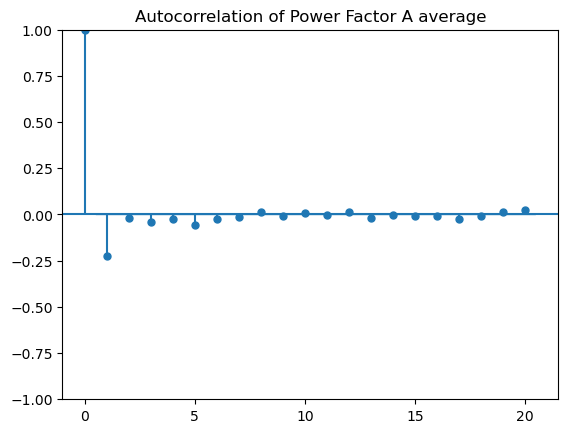

In [255]:
calculate_autocorrelation(power_factor_a_diff, 'Power Factor A average', 20)

Na osnovu ACF grafika q = 1.

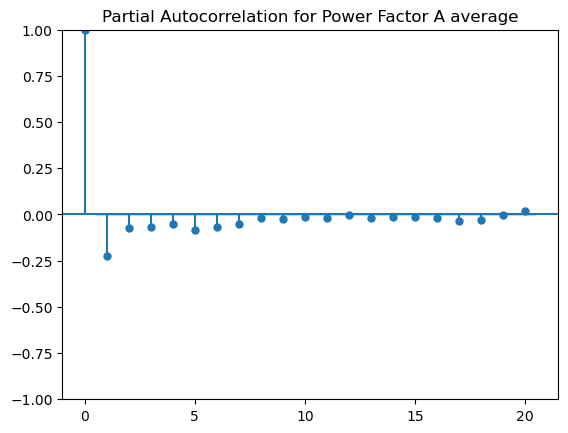

In [256]:
calculate_partial_autocorrelation(power_factor_a_diff, 'Power Factor A average', 20)

Na osnovu PACF grafika p = 1.

<h2>3.4 ARIMA model</h2>

In [264]:
def get_residuals(test_data, y_pred):
    residuals = test_data - y_pred
    return residuals

In [300]:
def arima_model(name, order):
    
    # Print the name of the column
#     name = combined_dataset.columns[idx]
    print("\033[31;1m" + name + "\033[0m")
    
    y = combined_dataset[name]
    
    # Building ARIMA model
    arima_model = ARIMA(y, order=order)
    arima_fit = arima_model.fit()
    
    y_pred = arima_fit.predict(start=y.index[0], end=y.index[-1])
    residuals = get_residuals(y, y_pred)
    
    # display of original time series and predicted values
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(y.index, y, label='Training data', linestyle='-')
    ax.plot(y_pred.index, y_pred, label='Predicted values', linestyle='--')
    
    ax.set_title(name)
    ax.legend()
    plt.show()
    
    return residuals

In [301]:
combined_dataset.columns

Index(['Active Power A average [kW]', 'Demand Total [kW]',
       'THDI A average [%]', 'THDU A average [%]', 'Voltage C average [V]',
       'Voltage A average [V]', 'Voltage B average [V]',
       'Frequency average [Hz]', 'Power Factor A average'],
      dtype='object')

Active Power A average [kW]


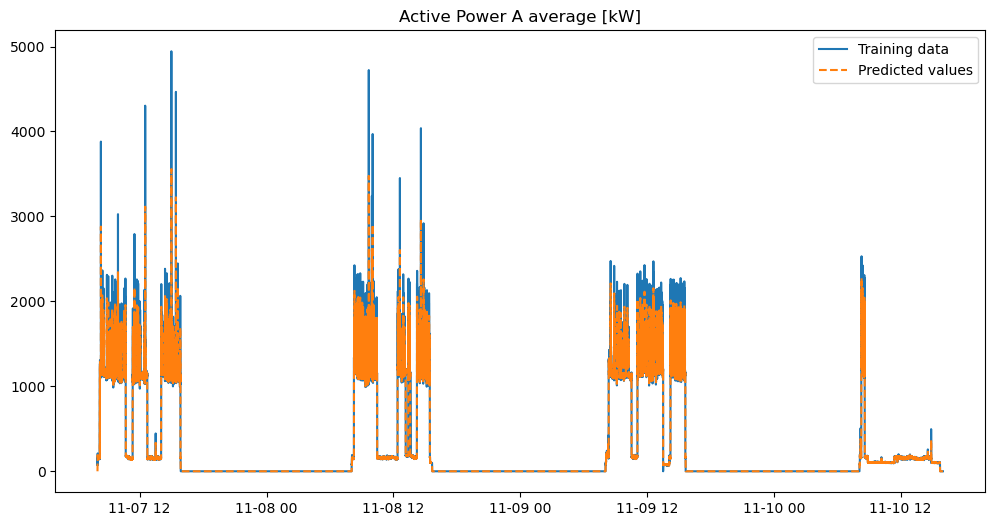

In [302]:
residuals_active_power_a = arima_model('Active Power A average [kW]', (1, 1, 1))

Demand Total [kW]


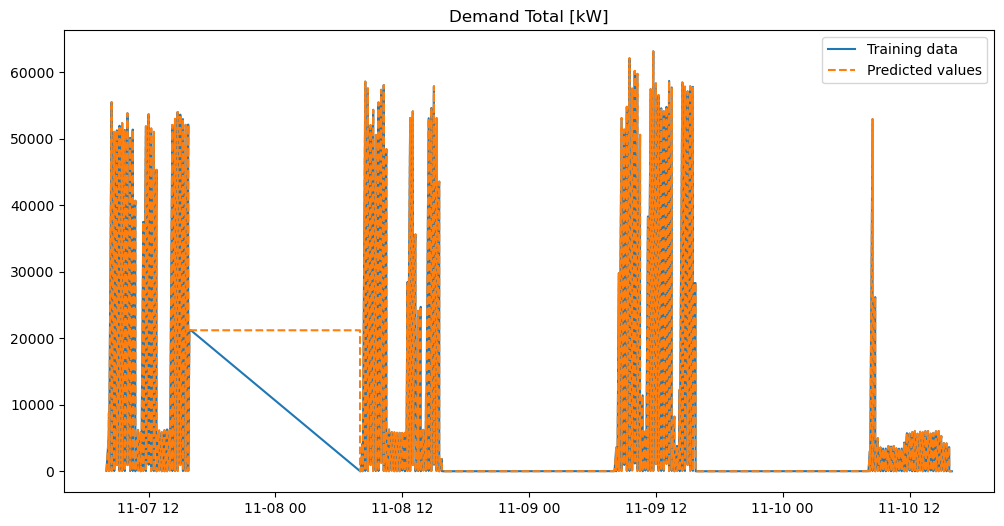

In [303]:
residuals_demand_total_0 = arima_model('Demand Total [kW]', (0, 2, 1))

Demand Total [kW]


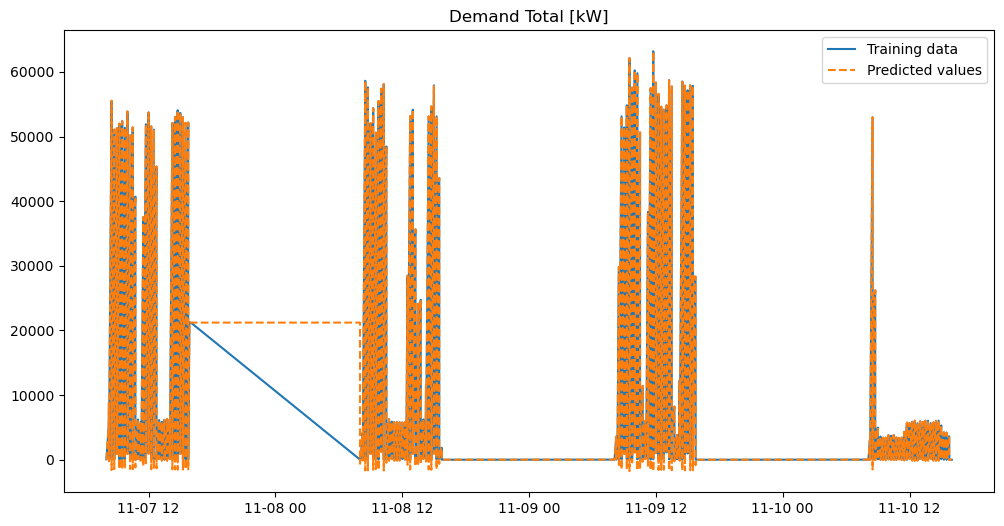

In [304]:
residuals_demand_total_1 = arima_model('Demand Total [kW]', (1, 2, 1))

In [316]:
mae_0 = mean_absolute_error(combined_dataset['Demand Total [kW]'], residuals_demand_total_0)
rmse_0 = np.sqrt(mean_squared_error(combined_dataset['Demand Total [kW]'], residuals_demand_total_0))

mae_1 = mean_absolute_error(combined_dataset['Demand Total [kW]'], residuals_demand_total_1)
rmse_1 = np.sqrt(mean_squared_error(combined_dataset['Demand Total [kW]'], residuals_demand_total_1))

print(f"Model 0: MAE = {mae_0}, RMSE = {rmse_0}")
print(f"Model 1: MAE = {mae_1}, RMSE = {rmse_1}")

Model 0: MAE = 15350.668210631364, RMSE = 22526.755107707428
Model 1: MAE = 15352.44624429843, RMSE = 22526.661963615392


Prednost ima model 0.

THDI A average [%]


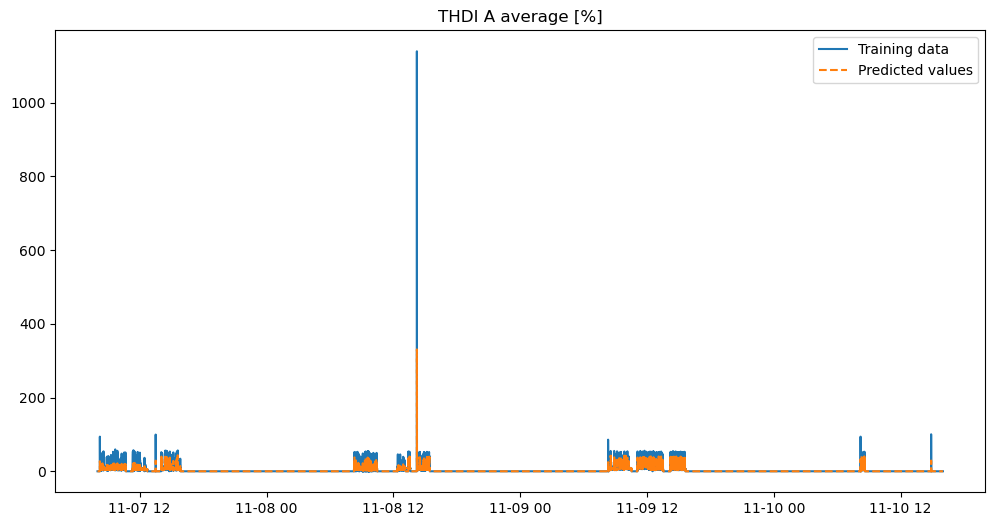

In [305]:
residuals_thdi_a_0 = arima_model('THDI A average [%]', (0, 1, 1))

THDI A average [%]


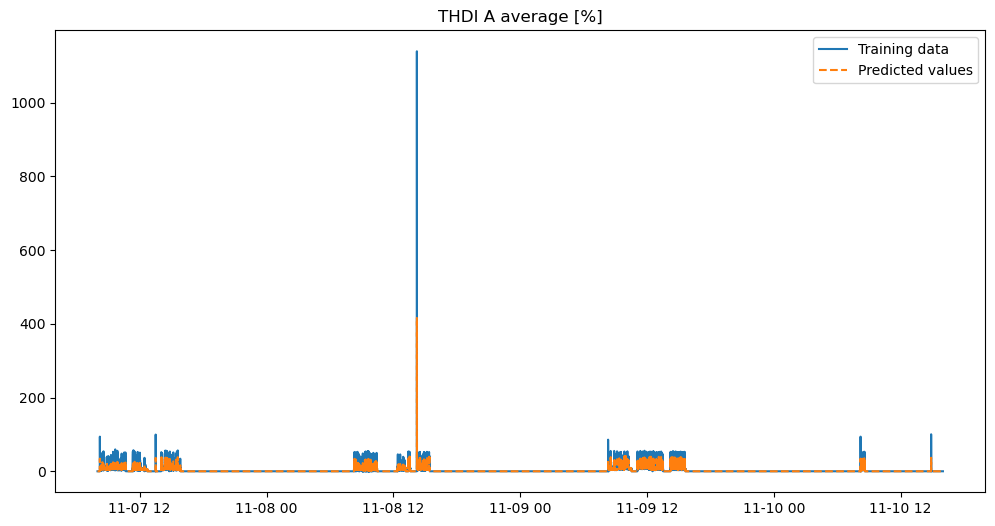

In [306]:
residuals_thdi_a_1 = arima_model('THDI A average [%]', (1, 1, 1))

In [317]:
mae_0 = mean_absolute_error(combined_dataset['THDI A average [%]'], residuals_thdi_a_0)
rmse_0 = np.sqrt(mean_squared_error(combined_dataset['THDI A average [%]'], residuals_thdi_a_0))

mae_1 = mean_absolute_error(combined_dataset['THDI A average [%]'], residuals_thdi_a_1)
rmse_1 = np.sqrt(mean_squared_error(combined_dataset['THDI A average [%]'], residuals_thdi_a_1))

print(f"Model 0: MAE = {mae_0}, RMSE = {rmse_0}")
print(f"Model 1: MAE = {mae_1}, RMSE = {rmse_1}")

Model 0: MAE = 5.808652254169563, RMSE = 10.201634393087259
Model 1: MAE = 5.808652254169563, RMSE = 10.11511008075087


Prednost ima model 1, jer je manja RMSE tog modela.

THDU A average [%]


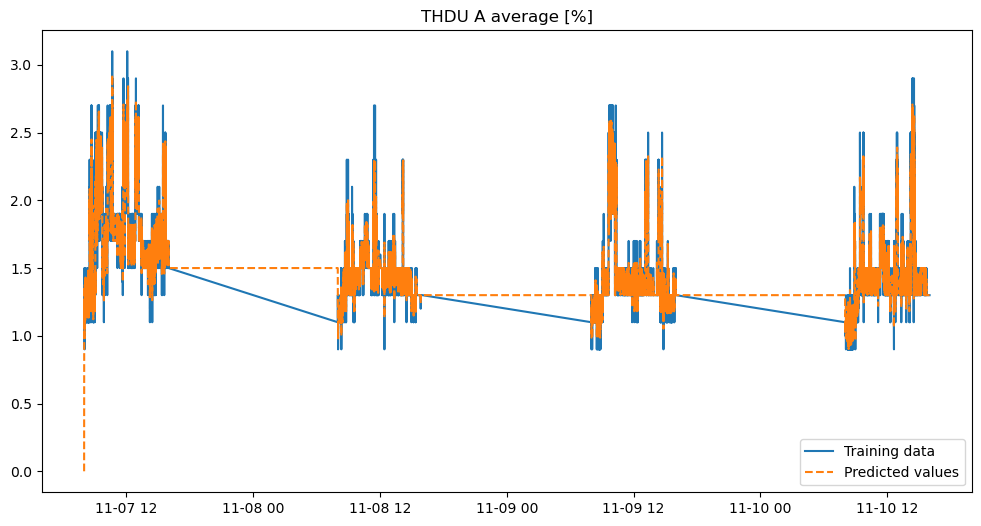

In [307]:
residuals_thdu_a = arima_model('THDU A average [%]', (1, 1, 1))

Voltage C average [V]


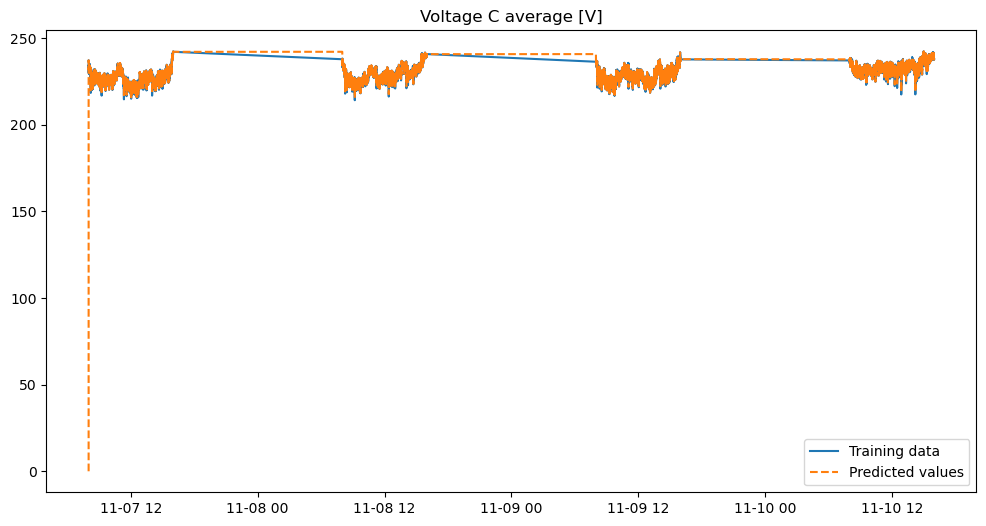

In [308]:
residuals_voltage_c = arima_model('Voltage C average [V]', (1, 1, 1))

Voltage A average [V]


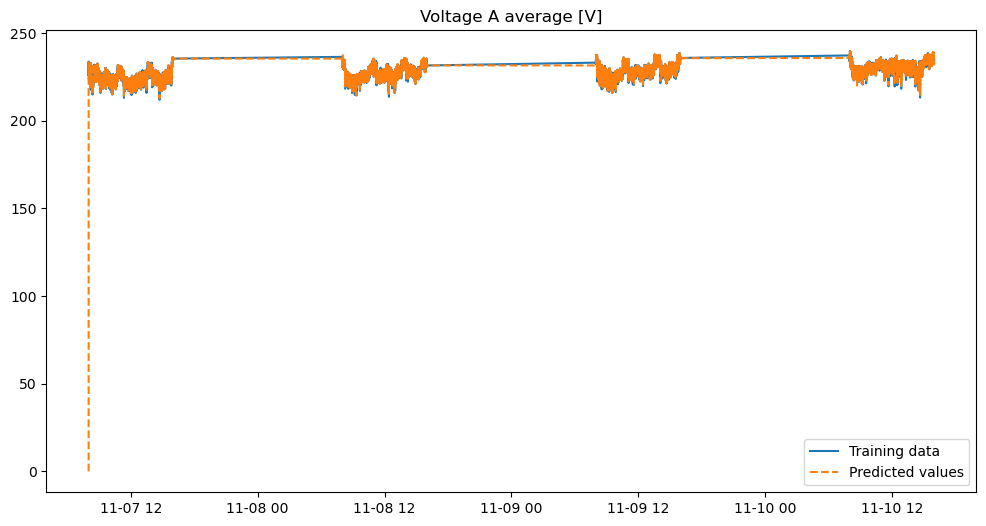

In [309]:
residulas_voltage_a = arima_model('Voltage A average [V]', (1, 1, 1))

Voltage B average [V]


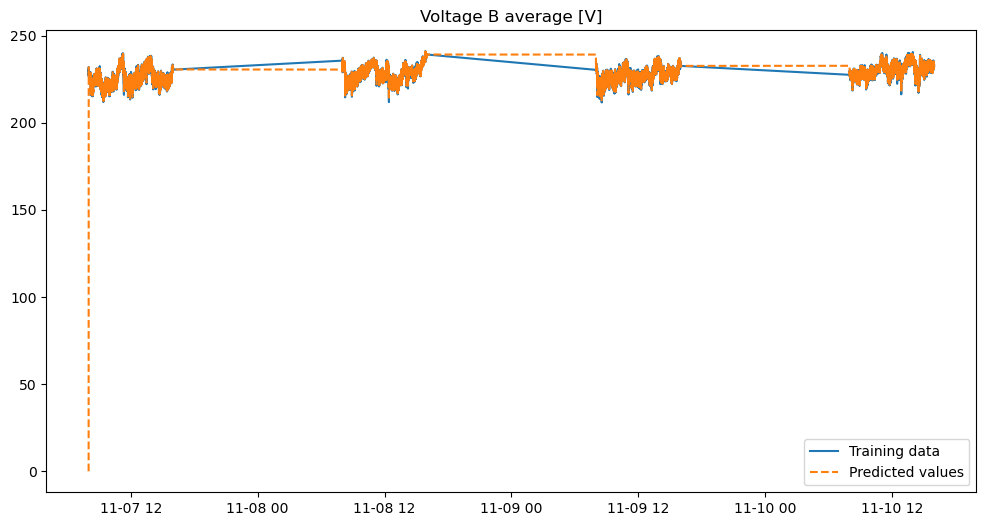

In [310]:
residulas_voltage_b = arima_model('Voltage B average [V]', (1, 1, 1))

Frequency average [Hz]


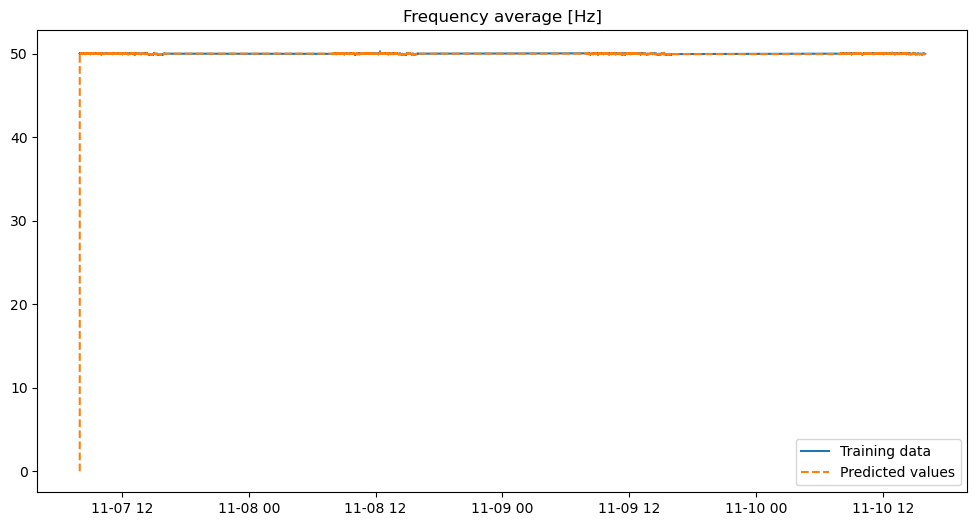

In [311]:
residuals_frequency_average = arima_model('Frequency average [Hz]', (1, 1, 1))

Power Factor A average


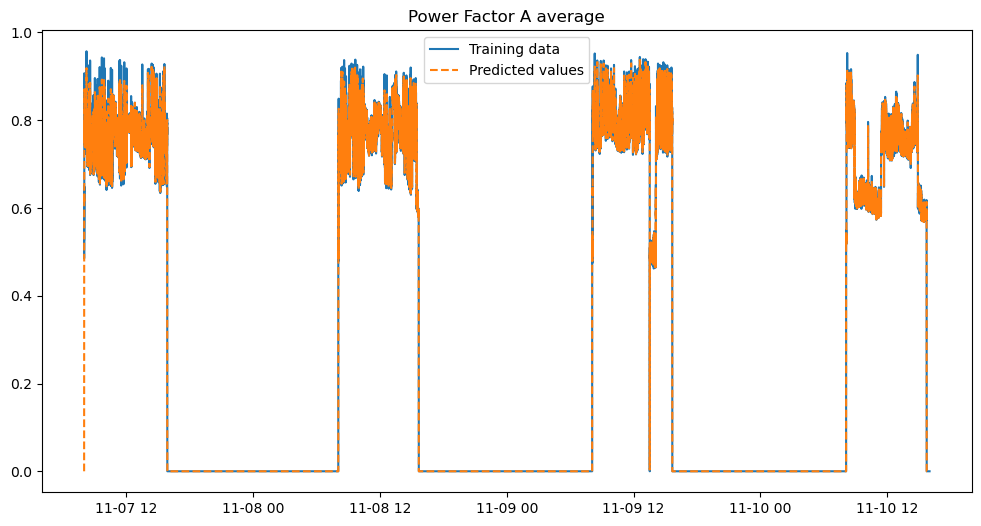

In [313]:
residuals_power_factor_a = arima_model('Power Factor A average', (1, 1, 1))

Sacuvati sve reziduale u fajl.

In [318]:
import pandas as pd

# Combine all residuals into one DataFrame
residuals_df = pd.DataFrame({
    'residuals_active_power_a': residuals_active_power_a,
    'residuals_demand_total_0': residuals_demand_total_0,
    'residuals_thdi_a_1': residuals_thdi_a_1,
    'residuals_thdu_a': residuals_thdu_a,
    'residuals_voltage_c': residuals_voltage_c,
    'residulas_voltage_a': residulas_voltage_a,
    'residulas_voltage_b': residulas_voltage_b,
    'residuals_frequency_average': residuals_frequency_average,
    'residuals_power_factor_a': residuals_power_factor_a
})

residuals_df.to_csv('residuals.csv')

<h1>4 Evaluation</h1>

<h2>4.1 Residual Correlation (Autocorrelation)</h2>

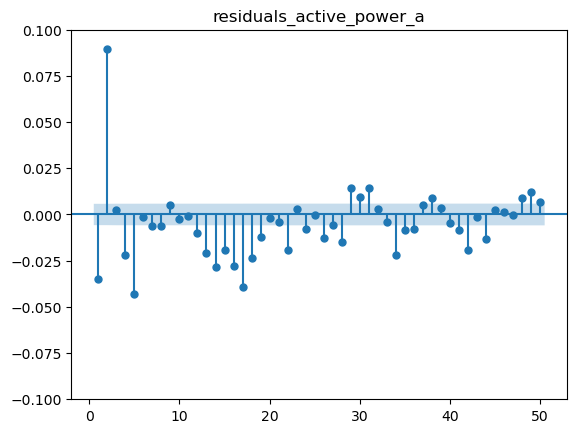

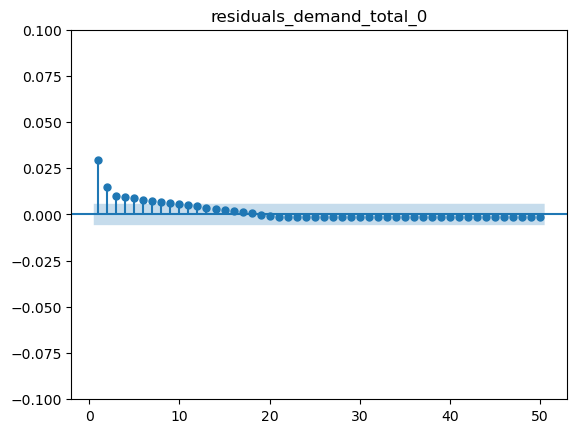

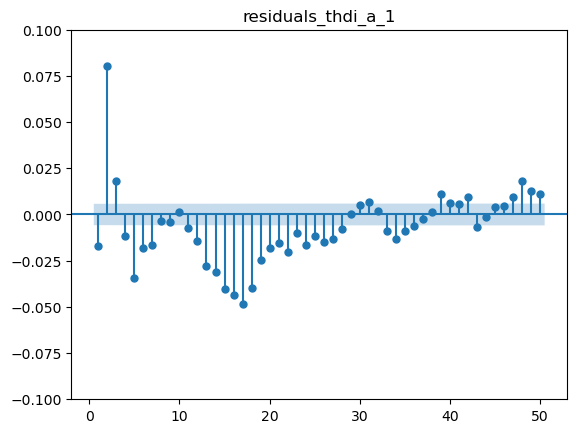

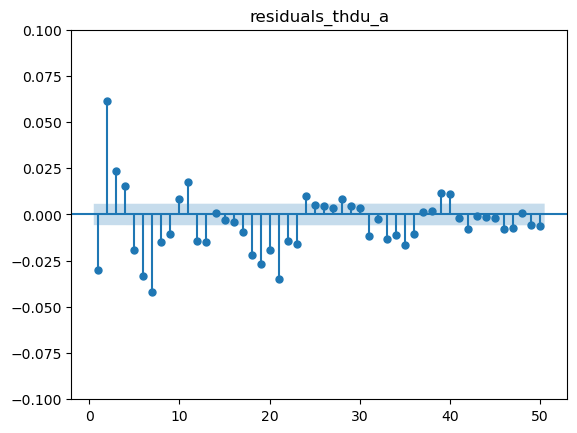

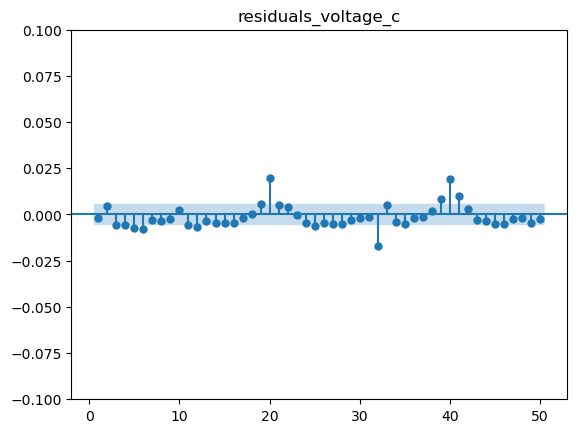

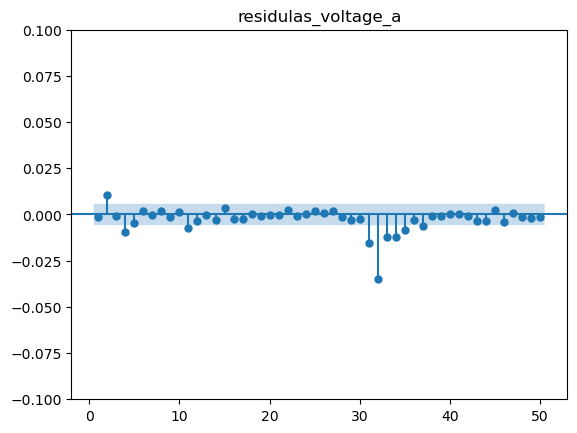

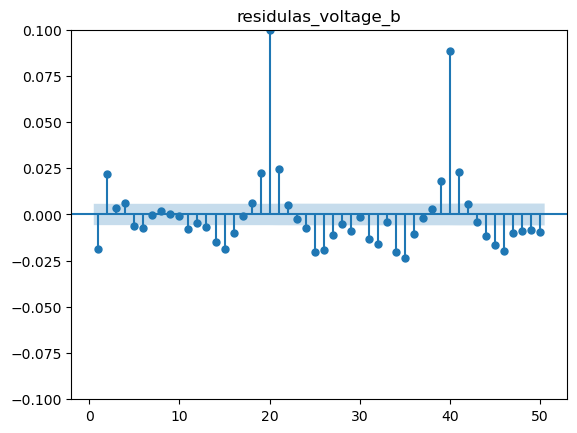

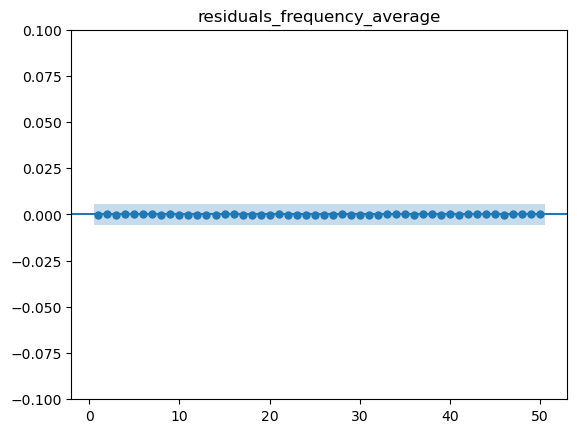

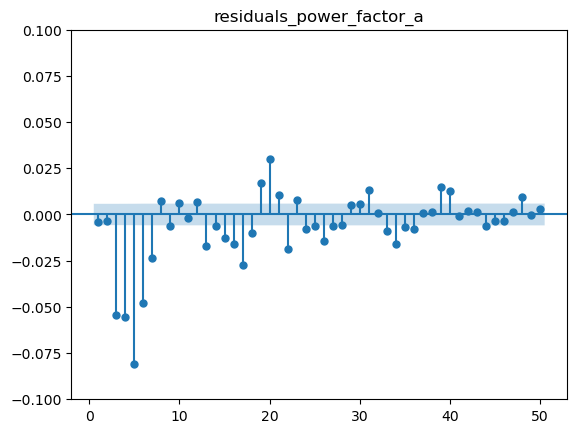

In [382]:
for column in residuals_df.columns:
    plot_acf(residuals_df[column], lags=50, zero=False)
    plt.ylim(-0.1, 0.1)
    plt.title(column)
    plt.show()

Kao sto se moze videti na ACF grafu korelisanost izmedju lagova je vrlo niska. Ovaj graf je prilagodjen da pokazuje korelisanost za granice od -0.1 do 1 da bi grafici bolje izgledali. Sa druge strane granica za significant threshold je pomerena previse nisko nakon diferenciranja svake vremenske serije.

<h2>4.2 Residual Distribution</h2>

<h3>4.2.1 Histogram of the residuals</h3>

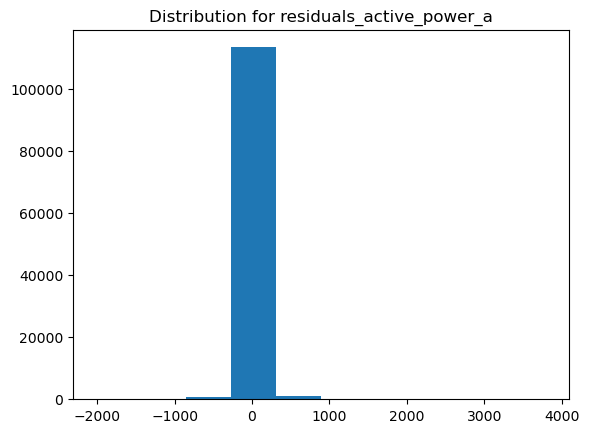

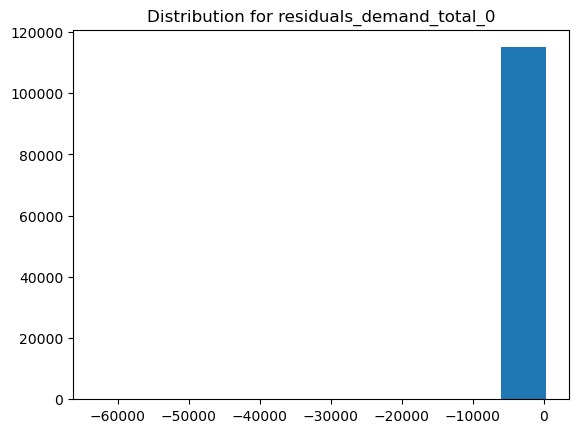

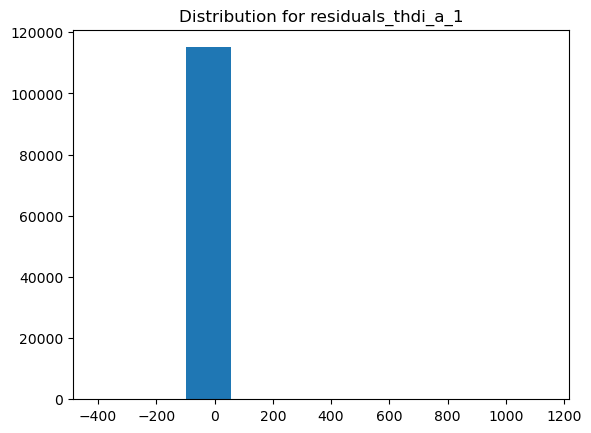

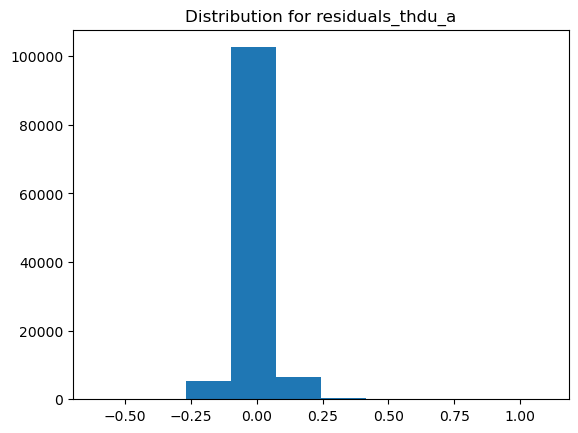

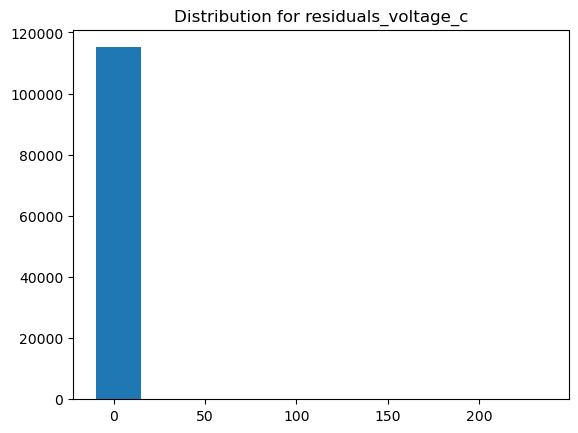

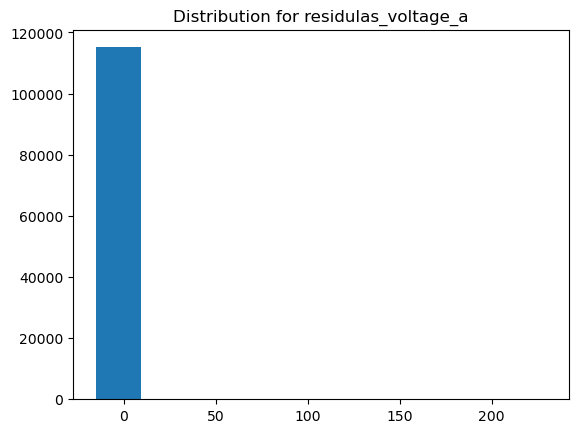

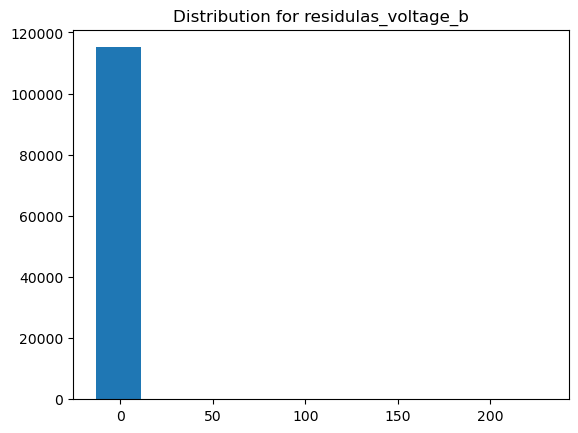

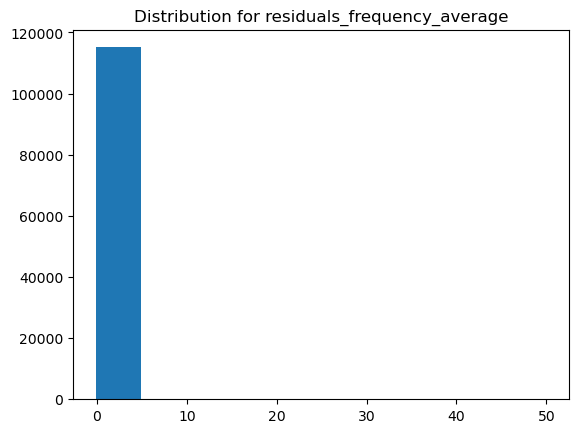

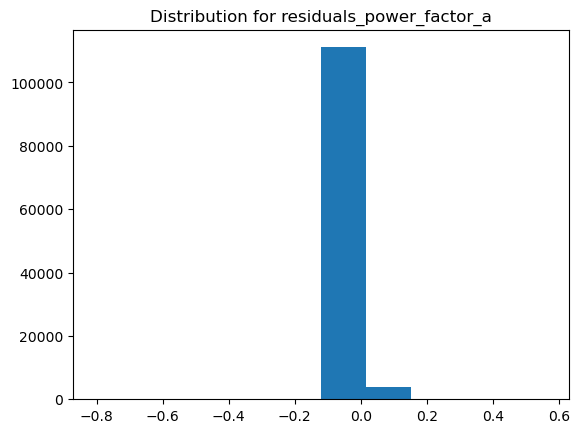

In [392]:
for column in residuals_df.columns:
    plt.hist(residuals_df[column])
    plt.title(f"Distribution for {column}")
    plt.show()

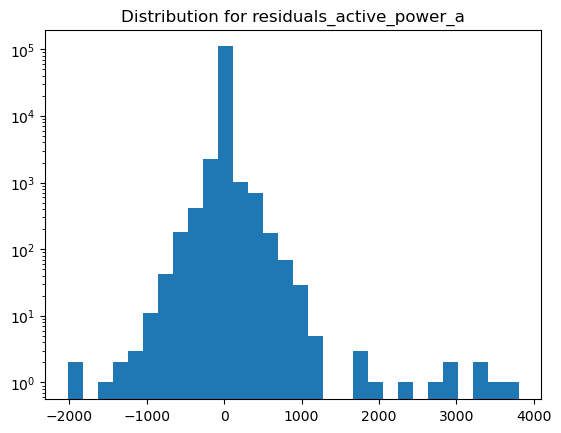

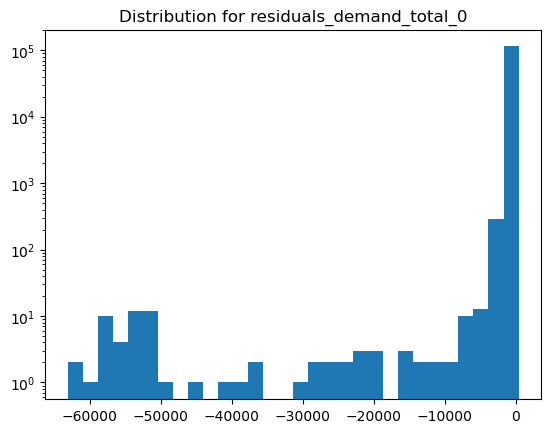

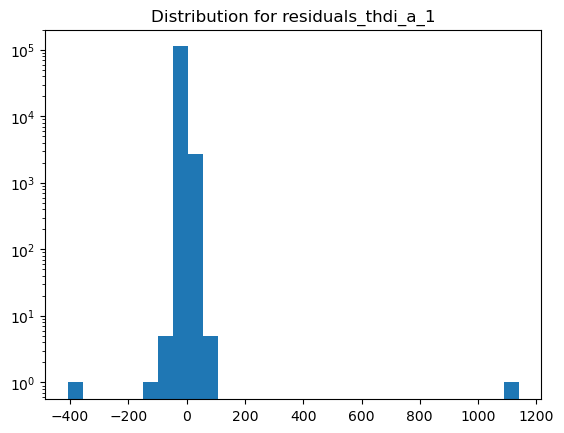

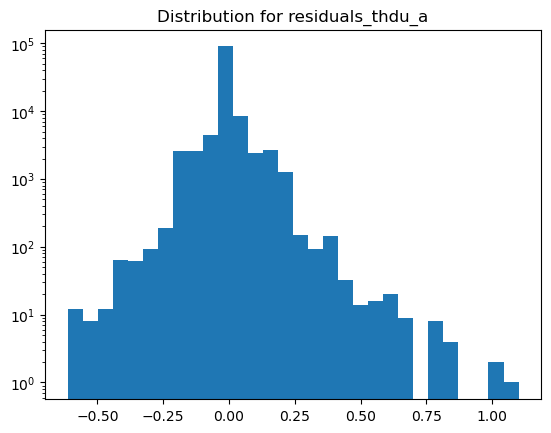

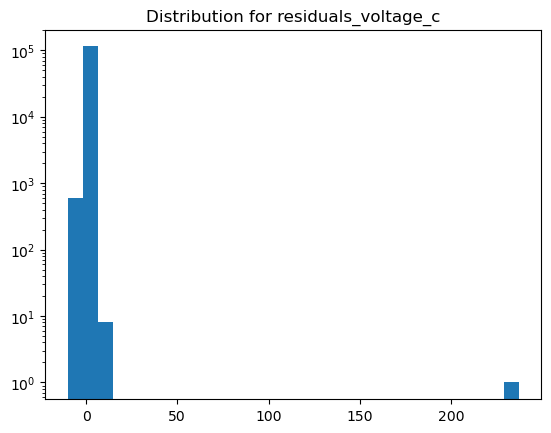

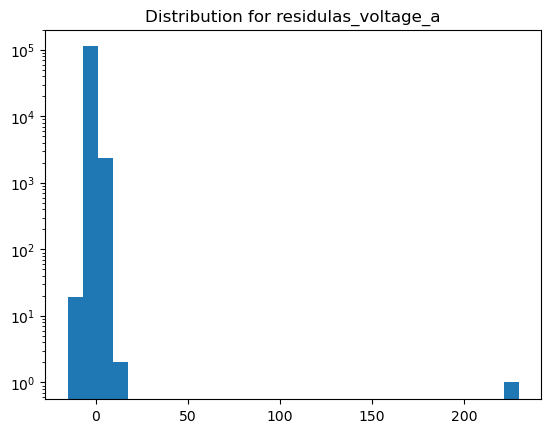

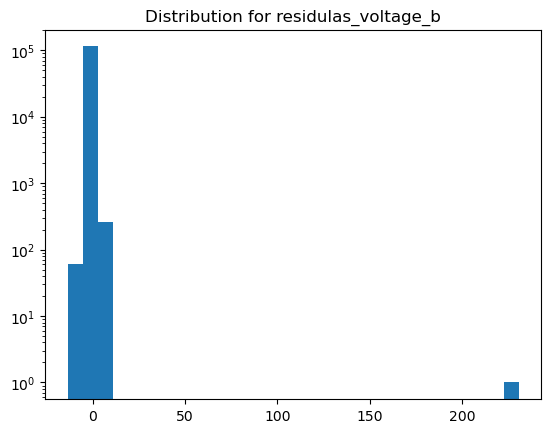

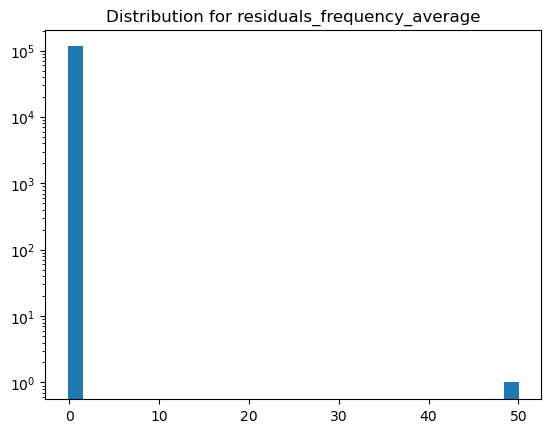

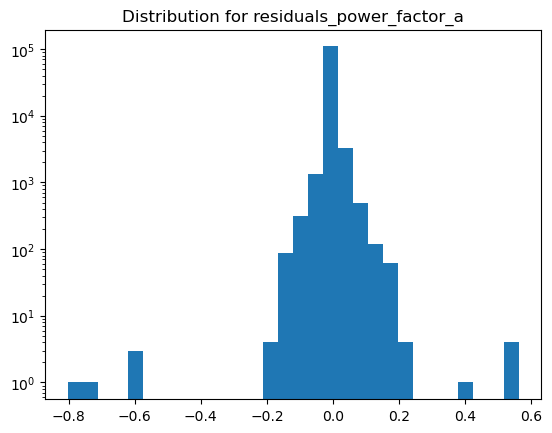

In [393]:
for column in residuals_df.columns:
    plt.hist(residuals_df[column], bins=30)
    plt.yscale('log')
    plt.title(f"Distribution for {column}")
    plt.show()

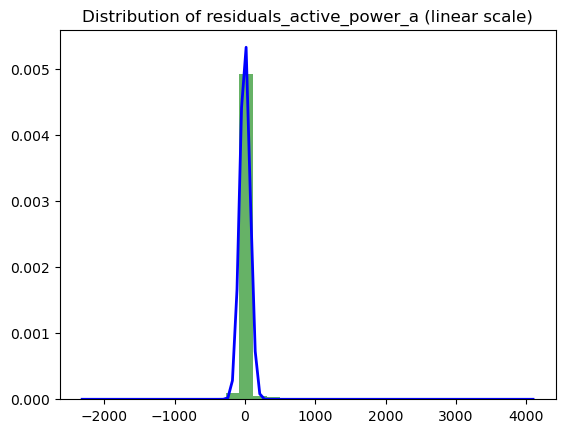

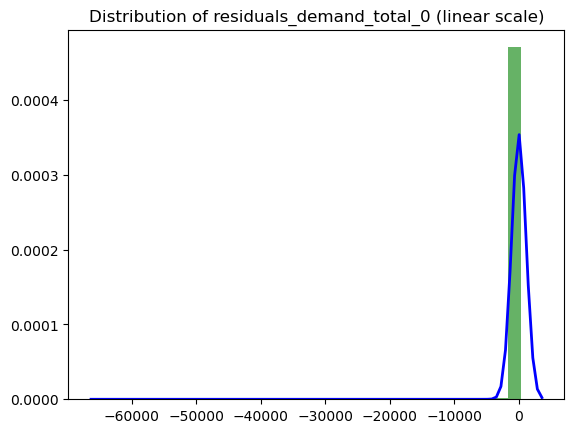

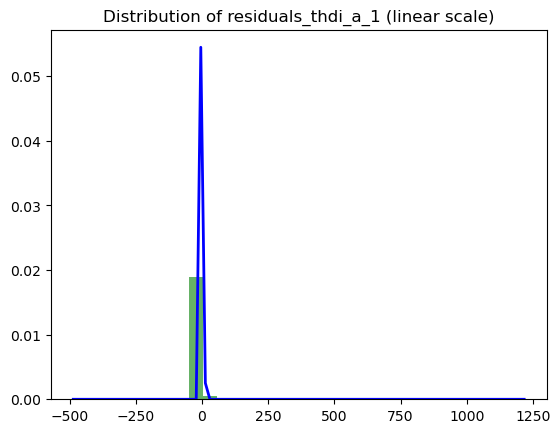

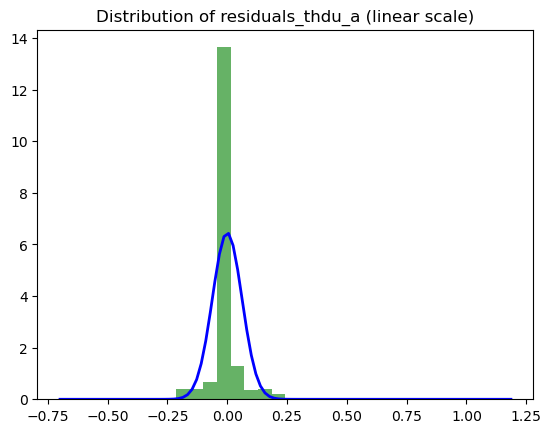

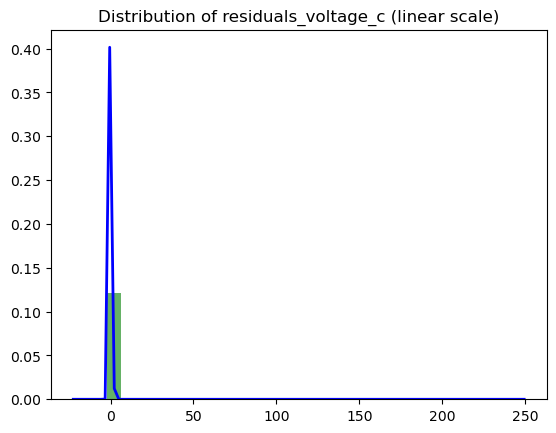

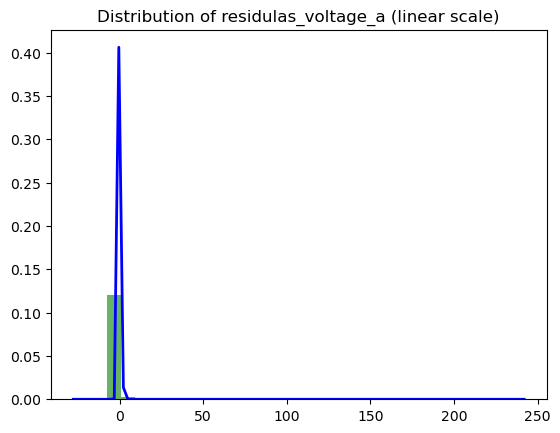

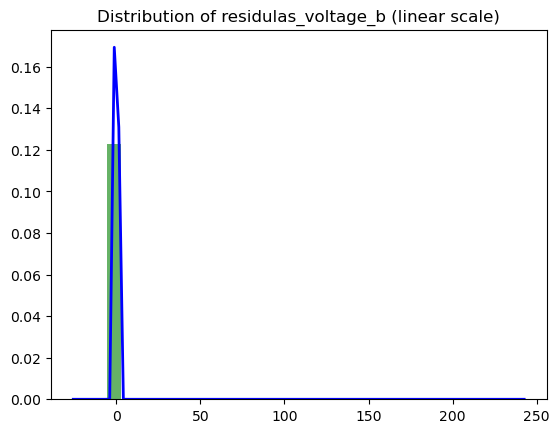

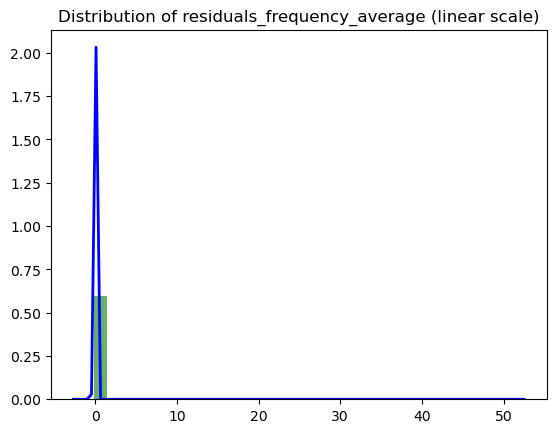

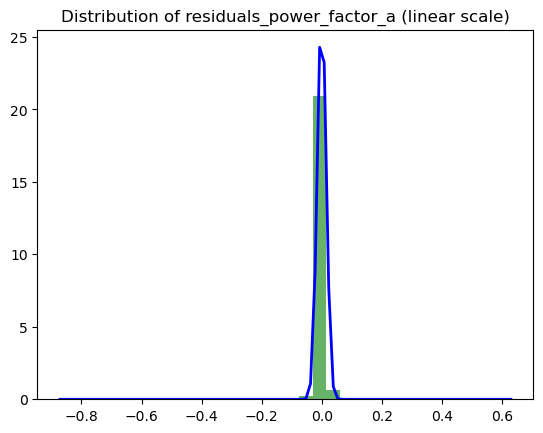

In [394]:
from scipy.stats import norm

for column in residuals_df.columns:
    residuals = residuals_df[column].dropna()

    # Plot histogram
    counts, bins, patches = plt.hist(residuals, bins=30, density=True, alpha=0.6, color='g')

    # Plot normal distribution
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, residuals.mean(), residuals.std())
    plt.plot(x, p, 'k', linewidth=2, color='blue')

    plt.title(f'Distribution of {column} (linear scale)')
    plt.show()

<h3>4.2.2 Q-Q plot</h3>

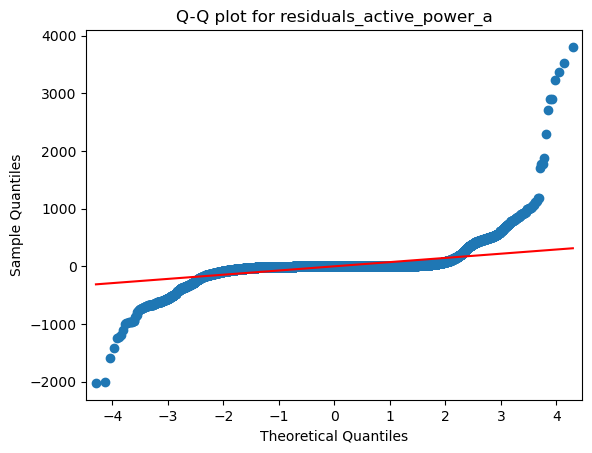

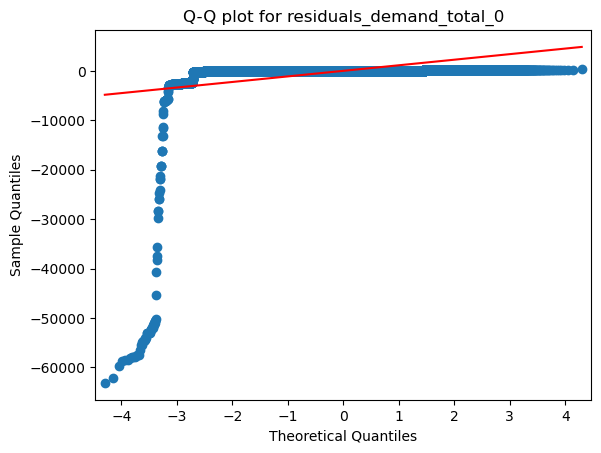

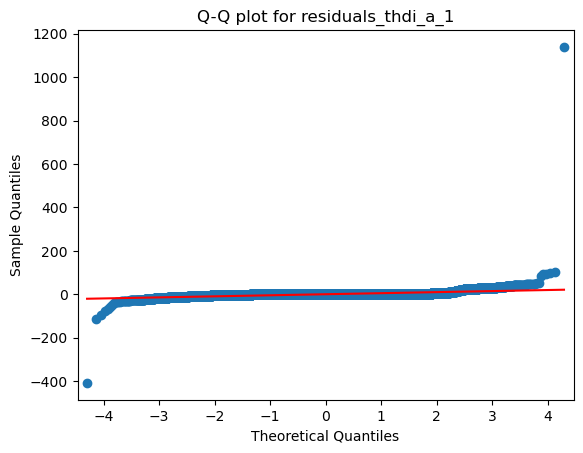

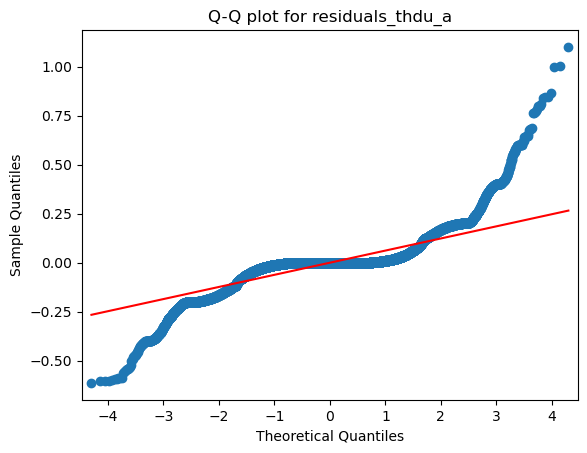

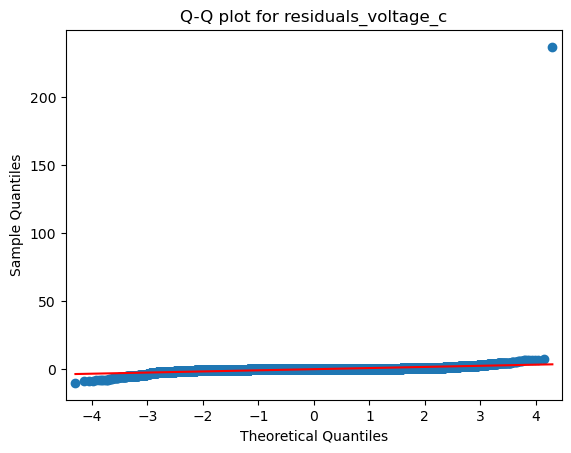

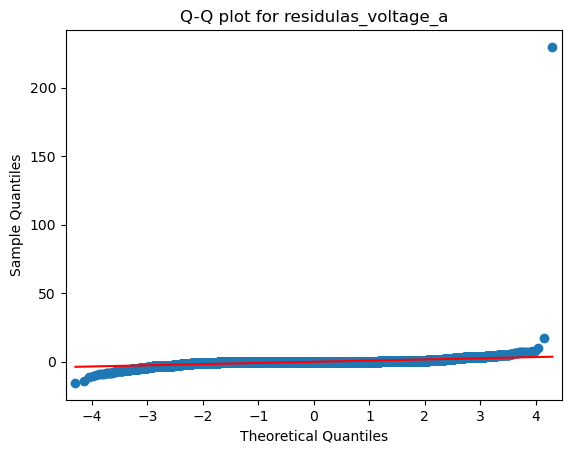

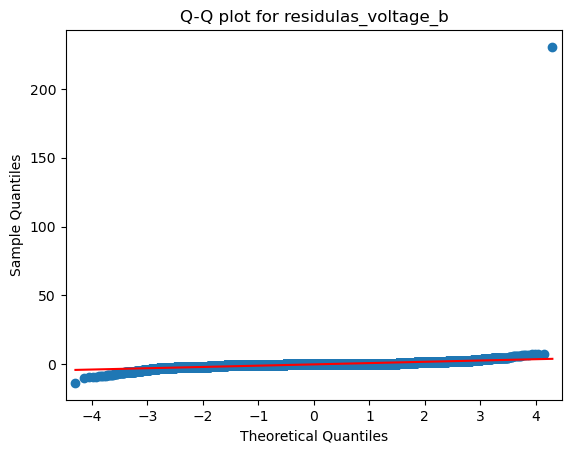

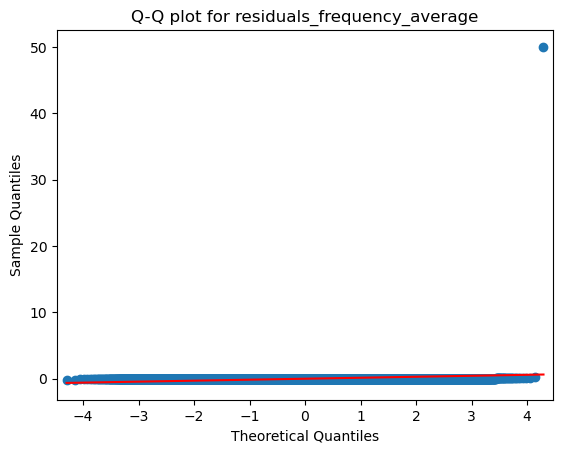

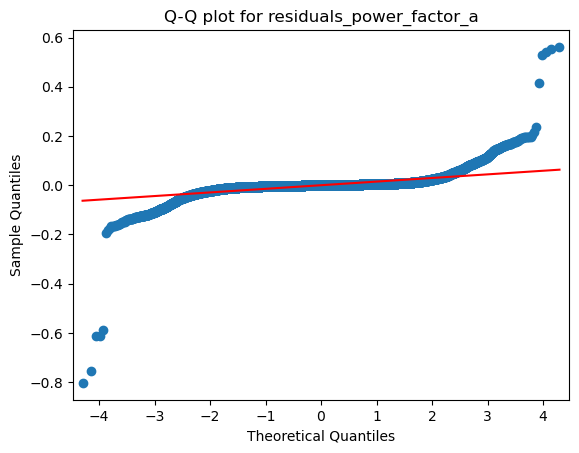

In [395]:
for column in residuals_df.columns:
    qqplot(residuals_df[column], line='s')
    plt.title(f"Q-Q plot for {column}")
    plt.show()